In [2]:
# 2022-10-17 10:30 Понед Фр
# Анализ и прогнозирование временного ряда стоимости уля.
# На Основе Project_01_Commodity/TS_commodity_14.ipynb. Пересчет в золото и нефть, Корреляция. Шкалирование. 
# Логарифм.изм. дневных стоймостей угля в разн ед.изм.
# ARIMA. Прогноз на основе ARIMA. Прогоноз получился, но очень примитивный. TS_Coal_01.ipynb

# 2022-10-18 10:25 Фр TS_Coal_02.ipynb. Изменил деление при расчете в золоте и нефти
# Добавляю сглажив и эспоненц сглаж.
# Начал sktime

# 2022-10-19 10:20 Фр TS_Coal_03.ipynb. Добавил скользящ средн., закоммент лишнее, по чистил прогноз ARIMA, VAR

# 2022-10-20 10:45 Фр TS_Coal_04.ipynb. Добавить корректн временн индексы в прогнозн знач. Продолжить прогоз в золоте и нефти

# 2022-10-21 15:50 пятн Нвг TS_Coal_05.ipynb. Убираю лишее. 
# Также делаю проверку прогоноза на фактических данных. 

# 2022-10-22 11:20 пятн Нвг TS_Coal_07.ipynb. (В варианте 06 намудрил с автозаменой). 
# Добавить полосы Боллинджера. См. библиотеку TA-Lib (не смог установить на Linux). 
# Пересечен скольз средних. VAR прогноз по оценке всех активов в золоте и нефти
# 2022-10-22 15:15 пятн Нвг TS_Coal_08.ipynb.


###### Start


## Оглавление / Краткое содержание

### 00. Краткое содержвние. Введение.

## <b>Часть первая</b>

### 01. [Загрузка библиотек](######Library)

### 02. [Загрузка данных](######DataFrame)

### 03. [Соединение все представленных временных рядов в один dateframe](######df)


#### 03.1 [Корреляция временных рядов](######corr)
#### 03.2 [Ежедневная волотильность временных рядов](######df_corr)

### 04. [Шкалирование временных рядов](######df1_scaler) 


### 05. [Перход к измерению в унциях золота](######df_gold)
#### 05.1 [Корреляция временных рядов выраженная в унциях золота](######corr_silver)


### 06. [Перход к измерению в баррелях нефти](######df_brent)
#### 06.1 [Корреляция временных рядов выраженная в баррелях нефти](######corr_brent)

### 07. [Представление шкалированной стоимости угля в разных ед.измерения](######df2)
#### 07.1 [Корреляция стоимости угля выраженная в разных единицах измеренния](######corr2)


## <b>Часть вторая</b>

### 08. [Прогноз стоимости угля на основе statsmodels ARIMA](######df3)
#### 08.1 [Графики автокорреляции и частичной автокорреляции шкалированной стоимости угля](######acf)
#### 08.2 [Графики компоненты: тренд, сезонность и шум](######sm.tsa.seasonal_decompose)
#### 08.3 [Подбор параметров для модели временных рядов ARIMA для прогнозирования стоимости угля в $](######sm.tsa.statespace.SARIMAX)
#### 08.4 [Обучение модели временных рядов ARIMA для стоимости угля в $](######mod.fit)


### [09 Построение прогнозов стоимости угля на основании использования библиотеки SKTIME](######sktime)
#### 09.1 [Метод прогнозирования ARIMA](######sktime.arima)
#### 09.2 [Метод прогнозирования VAR в долл.](######sktime.var)




[Ссылка на окончание](####Finish)



## 00. Краткое содержание

Цель работы: провести анализ стоимости угля, проанализировать коррелирующие показатели, возможные предикторы и построить прогноз стоимости угля. 

<b>В первой части </b> данной работы представлен анализ временых рядов стоимости основных биржевых товаров, в том числе с преминением показателей из технического анализа. 
Произведен переход к единицам измерения такие как: унции золота, и  тонны нефти. В этим же единицах приведен анализ представленных временных рядов.

<b>Во второй части </b> произведено прогнозирование стоимости угля с использованием статистического анализа, глубокого обучения в нескольких единицах измерения. В последующем будет произведено прогнозирование с прменением нейроных сетей.

### Введение

Динамика биржевых котировок товаров группы commoditys подвержены значительной волательности. Сомо изменения графиков, а также совокупность влиящих факторов (предикторов) на такие изменения стоимостей изучаются и анализируются как биржевыми спекулянтами так и учеными. 
Есть обоснованные предположения, что «Случайное блуждание — хорошая стартовая модель для описания финансовых временных рядов». Поэтому попробуем для оценки тенденций применить методы технического анализа, корторый применяют биржевые спекулянты.

Следующий возникающий вопрос заключается, а вчем мы производим измерения и почему именно в долл. или фунтах. Однако, согласитесь, что трудно что-либо «измерять» если твоя «линейка» постоянно увеличивается и причем в некоторых случаях в геометрической прогрессии путем денежной эмиссии в доллорах США (см. показатель M2 с сайта  (https://fred.stlouisfed.org/categories/29). 

В таких условиях следует рассмотреть возможность вернуться к так называемому «золотому сттандарту», добавить к нему «нефтяной стандарт» и оценивать биржевые товары в унциях золота и баррелях нефти. Исходя из этого в данных расчетах  использование «измеритель» в долл.США буду условно - только для пересчета одних биржевых товаров (commoditys) в другие.

Многофакторность влияющих предпосылок на волатильность и динамику цен приводит к признанию случайного блуждания, как основной гипотезы. Однако наличие причинно-следственых связей заметны даже не всегда осведомленным обывателям.

Во второй части
Рассматривая временные ряды как многомерные воспользуемся моделью VAR - векторная авторегрессия. (https://ru.wikipedia.org/wiki/Векторная_авторегрессия) и построим прогноз стоимости активов на ближайшее будущее в разных единицах измерения.  


## <b>Часть первая</b>

### 01. Загрузка библиотек
###### Library

[Ссылка в начало](######Start)

In [3]:
#  Загрузка необходимых библиотек Python

import numpy as np
import pandas as pd
import pandas_datareader as pdr

import matplotlib.pyplot as plt
from matplotlib import pyplot

from pandas.plotting import scatter_matrix

import seaborn as sns

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize


#for ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import statsmodels.api as sm

from pylab import rcParams

import itertools

import warnings

from scipy.stats import pearsonr, spearmanr

# sktime
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

from sktime.forecasting.varmax import VARMAX

from sktime.registry import all_estimators

from sktime.datasets import load_longley
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.arima import AutoARIMA

from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter


from sktime.forecasting.theta import ThetaForecaster

from sktime.utils import plotting

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

from sktime.forecasting.ets import AutoETS
from sktime.utils.plotting import plot_series


In [4]:
# Задание параметров вывода 
# Формат чисел
# pd.option_context('display.float_format', '{:0.20f}'.format)
pd.set_option("display.precision", 5)

pd.set_option('display.max_columns', 25)
# pd.set_option('display.max_rows', 15)


### 02. Загрузка данных
###### DateFrame

[Ссылка на оглавление](######Start)


Загружаем данные с https://finance.yahoo.com/, сразу получаем представление в графике и строим datagrame по цене закрытия. 

Дату начала анализа временных рядов принял за 1 января 2015 года.

In [5]:
# Задание дата начала выборки данных. 

start='2008-01-01'

start

'2008-01-01'

### Уголь $ за тонну
###### MTF=F
Coal (API2) CIF ARA (ARGUS-McCl (MTF=F)

<a href="https://finance.yahoo.com/quote/MTF=F?p=MTF=F" target="_blank">https://finance.yahoo.com/quote/MTF=F?p=MTF=F</a>

[Ссылка на оглавление](######Start)

                 High        Low       Open      Close  Volume  Adj Close
Date                                                                     
2022-10-17  269.50000  269.50000  269.50000  269.50000     0.0  269.50000
2022-10-18  266.64999  266.64999  266.64999  266.64999     0.0  266.64999
2022-10-19  267.00000  267.00000  267.00000  267.00000     0.0  267.00000
2022-10-20  270.00000  270.00000  270.00000  270.00000     0.0  270.00000
2022-10-21  269.75000  269.75000  269.75000  269.75000     0.0  269.75000
-----
2871


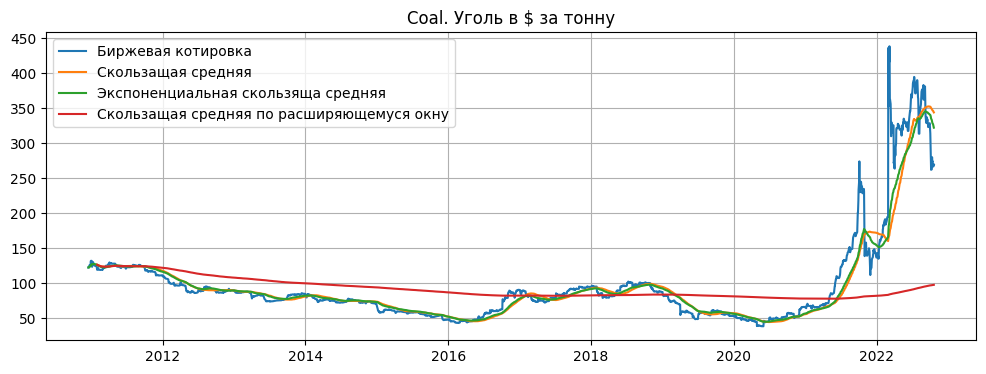

In [6]:
# уголь
mtff = pdr.get_data_yahoo('MTF=F', start=start)

print(mtff.tail())
print('-----')
print(len(mtff['Close']))

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(mtff['Close'], label='Биржевая котировка')
plt.plot(mtff['Close'].rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(mtff['Close'].ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(mtff['Close'].expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Coal. Уголь в $ за тонну')
plt.legend()
plt.show()


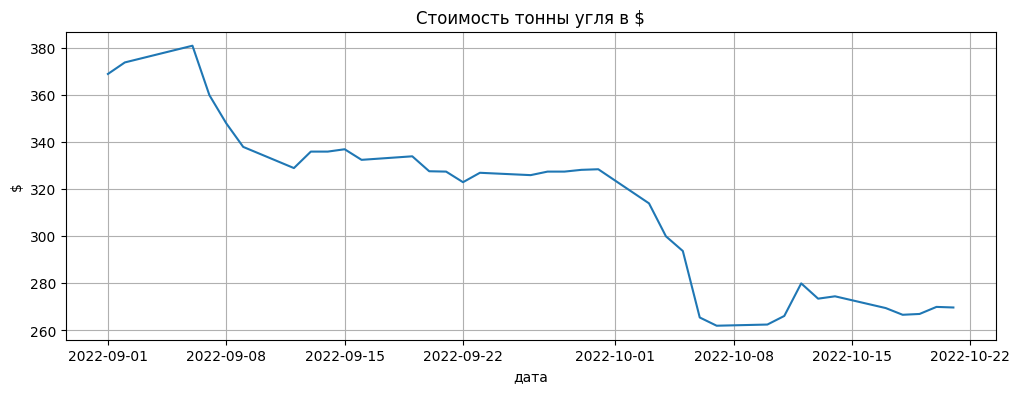

In [7]:
# график за ближайшие дни
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
ax.set_xlabel('дата')
ax.set_ylabel('$')
plt.grid(2)
plt.title('Стоимость тонны угля в $')
plt.plot(mtff['2022-09-01':'2022-12-31']['Close'])


plt.show()

# mtff['2022-09-01':'2022-12-31']['Close'].plot(figsize=(12, 3))

In [8]:
# беру только цену закрытия
coal = mtff['Close'].to_frame(name='Coal')

coal

Coal
Date                 
2010-12-17  122.50000
2010-12-20  122.50000
2010-12-21  123.25000
2010-12-22  125.50000
2010-12-23  125.25000
...               ...
2022-10-17  269.50000
2022-10-18  266.64999
2022-10-19  267.00000
2022-10-20  270.00000
2022-10-21  269.75000

[2871 rows x 1 columns]

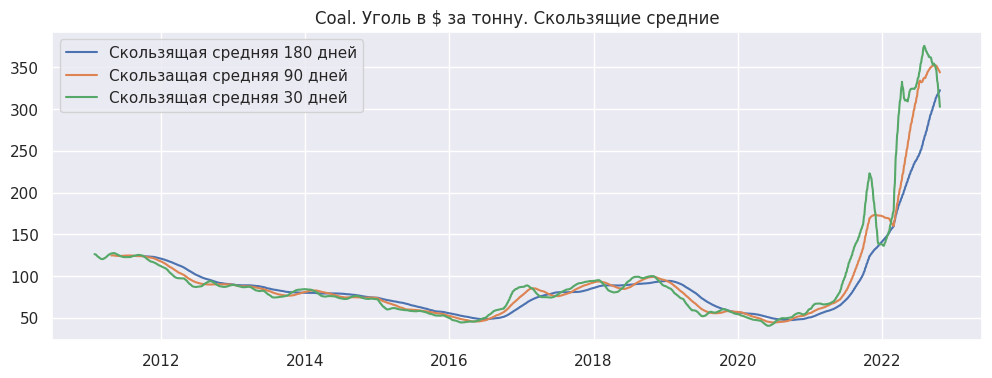

In [221]:
# скользящие средние разных периодов 

coal_rol180 = coal.rolling(180).mean()
coal_rol90 = coal.rolling(90).mean()
coal_rol30 = coal.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(coal_rol180, label='Скользящая средняя 180 дней')
plt.plot(coal_rol90, label='Скользащая средняя 90 дней')
plt.plot(coal_rol30, label='Скользящая средняя 30 дней')
plt.title('Coal. Уголь в $ за тонну. Скользящие средние')
plt.legend()
plt.show()

На вышепредставленном графике на основании рекомендаций из технического анализа следует обратить внимание на пересечение короткой и длинной скользящих средних. Особенность пересчечения короткой скользящей средней с верху или с низу показывает изменение тренда.

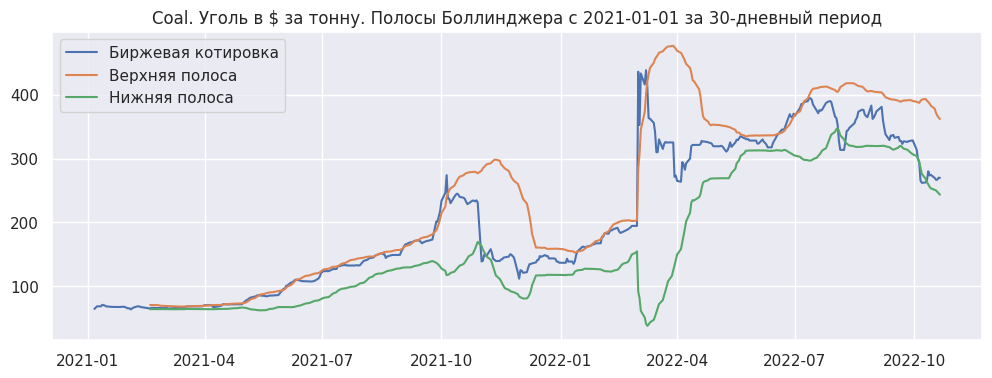

In [216]:
# Уголь в $. Полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

coal_d = coal[date:]
coal_ma = coal_d.rolling(window=n).mean()
coal_sd = coal_d.rolling(window=n).std()

coal_line1 = coal_ma + (2 * coal_sd)
coal_line2 = coal_ma - (2 * coal_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(coal_d, label='Биржевая котировка')
plt.plot(coal_line1, label='Верхняя полоса')
plt.plot(coal_line2, label='Нижняя полоса')
plt.title(f'Coal. Уголь в $ за тонну. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

На графике полос Боллинджера смотрим на ... дописать

### Нефть $ за баррель
###### BZ=F

<a href="https://finance.yahoo.com/quote/BZ=F?p=BZ=F" target="_blank">https://finance.yahoo.com/quote/BZ=F?p=BZ=F</a>

[Ссылка на оглавление](######Start)

             High    Low   Open  Close   Volume  Adj Close
Date                                                      
2022-10-17  93.23  90.84  91.71  91.62  23783.0      91.62
2022-10-18  92.65  88.77  92.02  90.03  40941.0      90.03
2022-10-19  92.84  89.38  90.79  92.41  43364.0      92.41
2022-10-20  94.77  91.92  92.51  92.38  40748.0      92.38
2022-10-21  93.80  91.02  92.79  93.50  40748.0      93.50
-----
3671


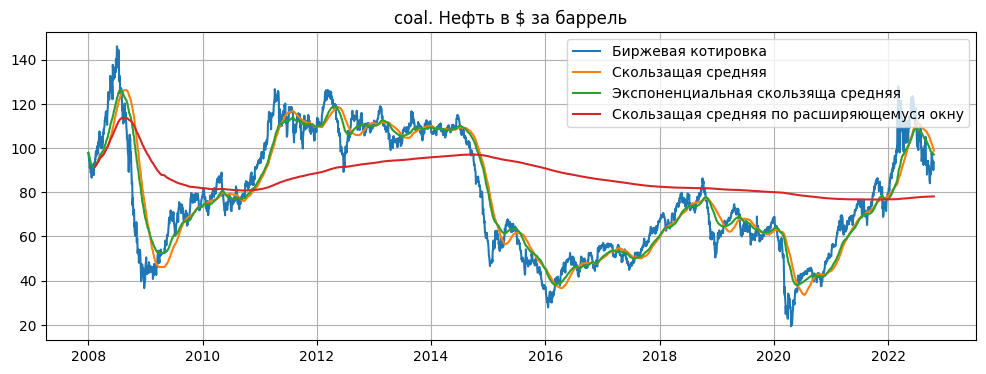

In [11]:
# нефть
bzf = pdr.get_data_yahoo('BZ=F', start=start)

print(bzf.tail())
print('-----')
print(len(bzf['Close']))

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(bzf['Close'], label='Биржевая котировка')
plt.plot(bzf['Close'].rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(bzf['Close'].ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(bzf['Close'].expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('coal. Нефть в $ за баррель')
plt.legend()
plt.show()

In [12]:
# беру только цену закрытия
brent = bzf['Close'].to_frame(name='Brent')

brent

Brent
Date             
2008-01-02  97.84
2008-01-03  97.60
2008-01-04  96.79
2008-01-07  94.39
2008-01-08  95.54
...           ...
2022-10-17  91.62
2022-10-18  90.03
2022-10-19  92.41
2022-10-20  92.38
2022-10-21  93.50

[3671 rows x 1 columns]

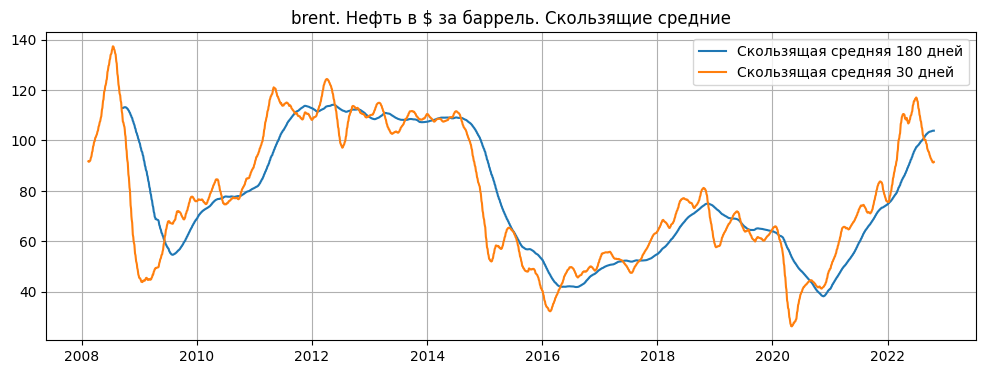

In [13]:
# скользящие средние разных периодов 

brent_rol180 = brent.rolling(180).mean()
brent_rol90 = brent.rolling(90).mean()
brent_rol30 = brent.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(brent_rol180, label='Скользящая средняя 180 дней')
# plt.plot(brent_rol90, label='Скользащая средняя 90 дней')
plt.plot(brent_rol30, label='Скользящая средняя 30 дней')
plt.title('brent. Нефть в $ за баррель. Скользящие средние')
plt.legend()
plt.show()

In [34]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

brent_d = brent[date:]
brent_ma = brent_d.rolling(window=n).mean()
brent_sd = brent_d.rolling(window=n).std()

brent_line1 = brent_ma + (2 * brent_sd)
brent_line2 = brent_ma - (2 * brent_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(brent_d, label='Биржевая котировка')
plt.plot(brent_line1, label='Верхняя граница')
plt.plot(brent_line2, label='Нижняя граница')
plt.title(f'brent. Нефть в $ за баррель. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

### Золото $ за тройскую унцию
###### GC=F

<a href="https://finance.yahoo.com/quote/GC=F?p=GC=F" target="_blank">https://finance.yahoo.com/quote/GC=F?p=GC=F</a>

[Ссылка на оглавление](######Start)

In [15]:
# золото
gcf = pdr.get_data_yahoo('GC=F', start=start)

print(gcf.tail())
print('-----')
print(len(gcf['Close']))

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(gcf['Close'], label='Биржевая котировка')
plt.plot(gcf['Close'].rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(gcf['Close'].ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(gcf['Close'].expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('silver. Золото в $ за тройскую унцию')
plt.legend()
plt.show()

                  High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2022-10-17  1657.00000  1646.80005  1650.19995  1657.00000   238.0  1657.00000
2022-10-18  1655.19995  1649.00000  1651.40002  1649.00000   597.0  1649.00000
2022-10-19  1637.50000  1627.50000  1637.50000  1627.50000    84.0  1627.50000
2022-10-20  1641.40002  1622.80005  1622.80005  1630.80005   477.0  1630.80005
2022-10-21  1653.90002  1634.09998  1634.09998  1651.00000   477.0  1651.00000
-----
3727


In [16]:
# беру только цену закрытия
silver = gcf['Close'].to_frame(name='Gold')


gold

Gold
Date                  
2008-01-02   857.00000
2008-01-03   866.40002
2008-01-04   863.09998
2008-01-07   859.59998
2008-01-08   878.00000
...                ...
2022-10-17  1657.00000
2022-10-18  1649.00000
2022-10-19  1627.50000
2022-10-20  1630.80005
2022-10-21  1651.00000

[3727 rows x 1 columns]

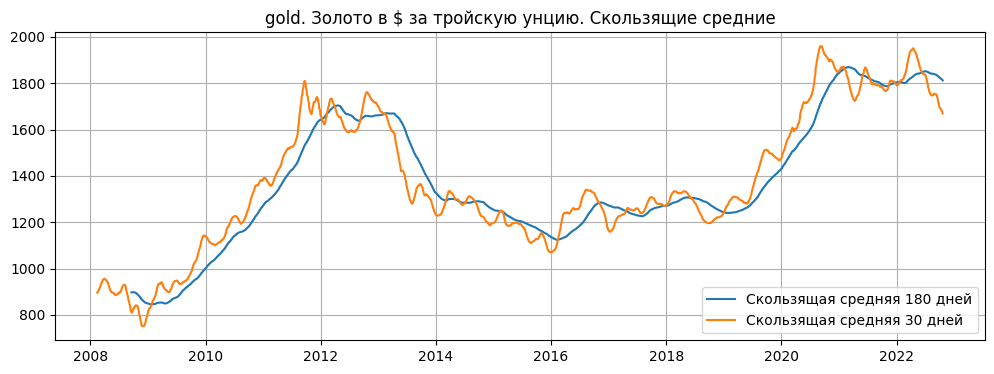

In [19]:
# скользящие средние разных периодов 

gold_rol180 = gold.rolling(180).mean()
gold_rol90 = gold.rolling(90).mean()
gold_rol30 = gold.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(gold_rol180, label='Скользящая средняя 180 дней')
# plt.plot(gold_rol90, label='Скользащая средняя 90 дней')
plt.plot(gold_rol30, label='Скользящая средняя 30 дней')
plt.title('gold. Золото в $ за тройскую унцию. Скользящие средние')
plt.legend()
plt.show()

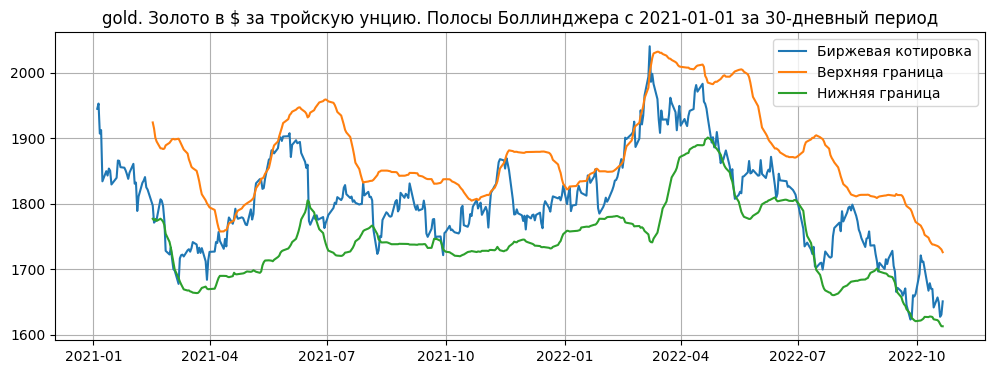

In [33]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

gold_d = gold[date:]
gold_ma = gold_d.rolling(window=n).mean()
gold_sd = gold_d.rolling(window=n).std()

gold_line1 = gold_ma + (2 * gold_sd)
gold_line2 = gold_ma - (2 * gold_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(gold_d, label='Биржевая котировка')
plt.plot(gold_line1, label='Верхняя граница')
plt.plot(gold_line2, label='Нижняя граница')
plt.title(f'gold. Золото в $ за тройскую унцию. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

In [21]:
#

gcf['Close']['2020-01-01': '2020-05-31'].max()

1756.699951171875

### Серебро $ за тройскую унцию
###### SI=F
<a href="https://finance.yahoo.com/quote/SI=F?p=SI=F" target="_blank">https://finance.yahoo.com/quote/SI=F?p=SI=F</a>

[Ссылка на оглавление](######Start)

In [22]:
# серебро
sif = pdr.get_data_yahoo('SI=F', start=start)

print(sif.tail())
print('-----')
print(len(sif['Close']))

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(sif['Close'], label='Биржевая котировка')
plt.plot(sif['Close'].rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(sif['Close'].ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(sif['Close'].expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Silver. Серебро в $ за тройскую унцию')
plt.legend()
plt.show()

              High     Low    Open   Close  Volume  Adj Close
Date                                                         
2022-10-17  18.674  18.625  18.625  18.674   119.0     18.674
2022-10-18  18.825  18.525  18.590  18.571    38.0     18.571
2022-10-19  18.685  18.295  18.685  18.336    45.0     18.336
2022-10-20  18.845  18.375  18.390  18.666    79.0     18.666
2022-10-21  19.315  18.290  18.570  19.043    79.0     19.043
-----
3726


In [23]:
# беру только цену закрытия
silver = sif['Close'].to_frame(name='Silver')

silver

Silver
Date              
2008-01-02  15.167
2008-01-03  15.382
2008-01-04  15.346
2008-01-07  15.180
2008-01-08  15.707
...            ...
2022-10-17  18.674
2022-10-18  18.571
2022-10-19  18.336
2022-10-20  18.666
2022-10-21  19.043

[3726 rows x 1 columns]

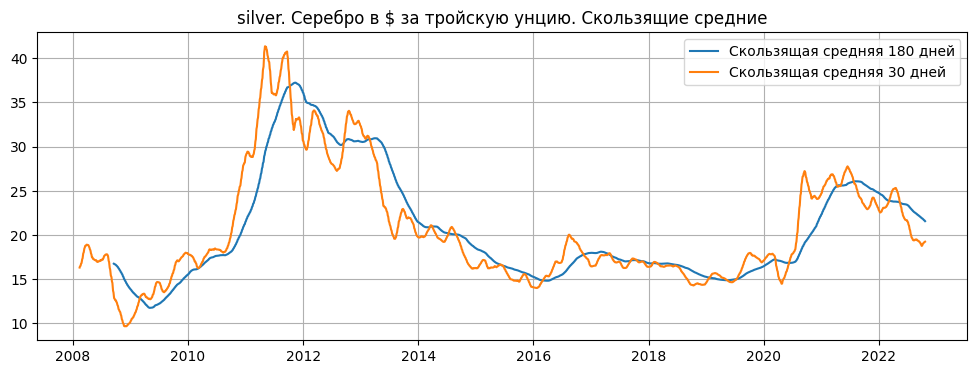

In [24]:
# скользящие средние разных периодов 

silver_rol180 = silver.rolling(180).mean()
silver_rol90 = silver.rolling(90).mean()
silver_rol30 = silver.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(silver_rol180, label='Скользящая средняя 180 дней')
# plt.plot(silver_rol90, label='Скользащая средняя 90 дней')
plt.plot(silver_rol30, label='Скользящая средняя 30 дней')
plt.title('silver. Серебро в $ за тройскую унцию. Скользящие средние')
plt.legend()
plt.show()

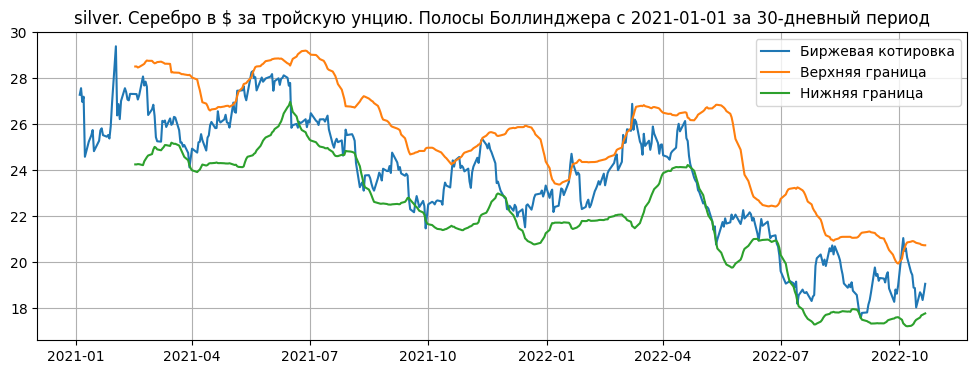

In [32]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

silver_d = silver[date:]
silver_ma = silver_d.rolling(window=n).mean()
silver_sd = silver_d.rolling(window=n).std()

silver_line1 = silver_ma + (2 * silver_sd)
silver_line2 = silver_ma - (2 * silver_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(silver_d, label='Биржевая котировка')
plt.plot(silver_line1, label='Верхняя граница')
plt.plot(silver_line2, label='Нижняя граница')
plt.title(f'silver. Серебро в $ за тройскую унцию. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

### Платина $ за тройскую унцию
###### PL=F

<a href="https://finance.yahoo.com/quote/PL=F?p=PL=F" target="_blank">https://finance.yahoo.com/quote/PL=F?p=PL=F</a>

[Ссылка на оглавление](######Start)

                 High        Low       Open      Close  Volume  Adj Close
Date                                                                     
2022-10-17  924.00000  924.00000  924.00000  924.00000     1.0  924.00000
2022-10-18  924.59998  917.70001  924.59998  917.70001     2.0  917.70001
2022-10-19  891.50000  891.50000  891.50000  891.50000     7.0  891.50000
2022-10-20  939.90002  930.09998  939.90002  930.09998    16.0  930.09998
2022-10-21  960.00000  949.29999  954.59998  954.59998    16.0  954.59998
-----
3427


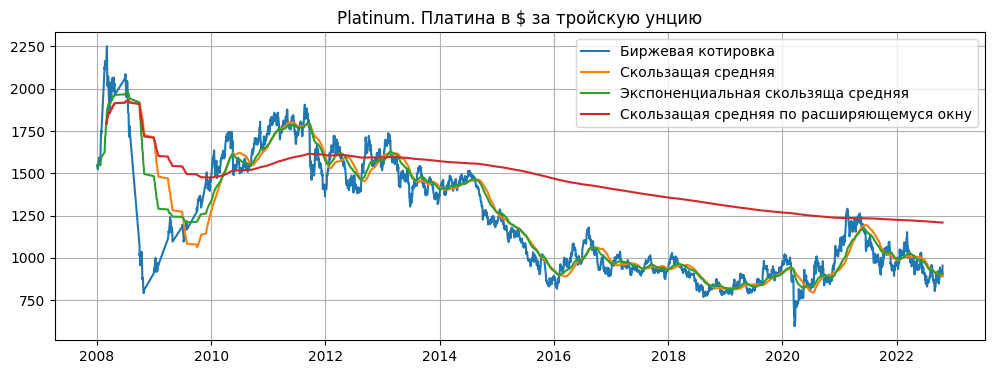

In [26]:
# Platinum
plf = pdr.get_data_yahoo('PL=F', start=start)

print(plf.tail())
print('-----')
print(len(plf['Close']))


plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(plf['Close'], label='Биржевая котировка')
plt.plot(plf['Close'].rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(plf['Close'].ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(plf['Close'].expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Platinum. Платина в $ за тройскую унцию')
plt.legend()
plt.show()

In [27]:
# беру только цену закрытия
platinum = plf['Close'].to_frame(name='Platinum')

platinum

Platinum
Date                  
2008-01-02  1547.00000
2008-01-03  1541.80005
2008-01-04  1539.09998
2008-01-07  1524.19995
2008-01-08  1553.59998
...                ...
2022-10-17   924.00000
2022-10-18   917.70001
2022-10-19   891.50000
2022-10-20   930.09998
2022-10-21   954.59998

[3427 rows x 1 columns]

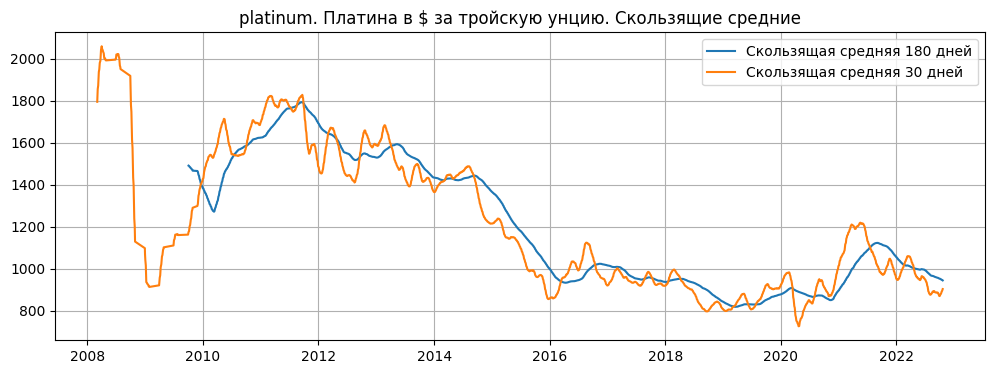

In [28]:
# скользящие средние разных периодов 

platinum_rol180 = platinum.rolling(180).mean()
platinum_rol90 = platinum.rolling(90).mean()
platinum_rol30 = platinum.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(platinum_rol180, label='Скользящая средняя 180 дней')
# plt.plot(platinum_rol90, label='Скользащая средняя 90 дней')
plt.plot(platinum_rol30, label='Скользящая средняя 30 дней')
plt.title('platinum. Платина в $ за тройскую унцию. Скользящие средние')
plt.legend()
plt.show()

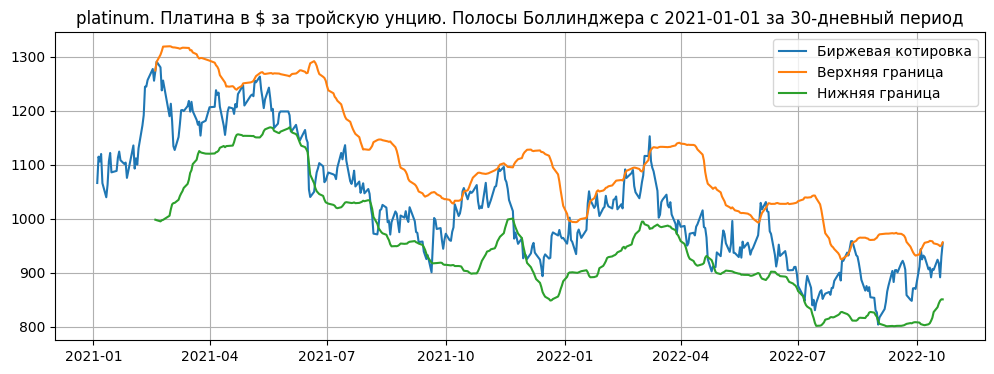

In [31]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

platinum_d = platinum[date:]
platinum_ma = platinum_d.rolling(window=n).mean()
platinum_sd = platinum_d.rolling(window=n).std()

platinum_line1 = platinum_ma + (2 * platinum_sd)
platinum_line2 = platinum_ma - (2 * platinum_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(platinum_d, label='Биржевая котировка')
plt.plot(platinum_line1, label='Верхняя граница')
plt.plot(platinum_line2, label='Нижняя граница')
plt.title(f'platinum. Платина в $ за тройскую унцию. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

### Натуральный газ (в долларах ($) на единицу MMBtu(1 млн БТЕ) (1 Btu ≈ 1054,615 Дж)
###### NG=F
<a href="https://finance.yahoo.com/quote/NG=F?p=NG=F" target="_blank">https://finance.yahoo.com/quote/NG=F?p=NG=F</a>

[Ссылка на оглавление](######Start)

             High    Low   Open  Close    Volume  Adj Close
Date                                                       
2022-10-17  6.314  5.912  6.263  5.999  132424.0      5.999
2022-10-18  6.095  5.673  5.978  5.745  102085.0      5.745
2022-10-19  5.784  5.427  5.686  5.462  107157.0      5.462
2022-10-20  5.565  5.253  5.456  5.358  104216.0      5.358
2022-10-21  5.375  4.903  5.322  4.959  104216.0      4.959
-----
3729


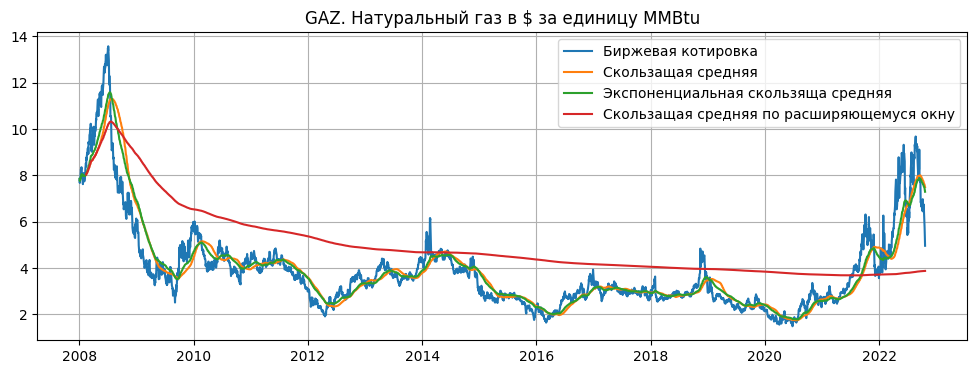

In [35]:
# газ
ngf = pdr.get_data_yahoo('NG=F', start=start)

print(ngf.tail())
print('-----')
print(len(ngf['Close']))

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(ngf['Close'], label='Биржевая котировка')
plt.plot(ngf['Close'].rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(ngf['Close'].ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(ngf['Close'].expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('GAZ. Натуральный газ в $ за единицу MMBtu')
plt.legend()
plt.show()

In [36]:
# беру только цену закрытия
gaz = ngf['Close'].to_frame(name='Gaz')

gaz

Gaz
Date             
2008-01-02  7.850
2008-01-03  7.674
2008-01-04  7.841
2008-01-07  7.879
2008-01-08  7.967
...           ...
2022-10-17  5.999
2022-10-18  5.745
2022-10-19  5.462
2022-10-20  5.358
2022-10-21  4.959

[3729 rows x 1 columns]

In [37]:
# скользящие средние разных периодов 

gaz_rol180 = gaz.rolling(180).mean()
gaz_rol90 = gaz.rolling(90).mean()
gaz_rol30 = gaz.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(gaz_rol180, label='Скользящая средняя 180 дней')
# plt.plot(gaz_rol90, label='Скользащая средняя 90 дней')
plt.plot(gaz_rol30, label='Скользящая средняя 30 дней')
plt.title('GAZ. Натуральный газ в $ за единицу MMBtu. Скользящие средние')
plt.legend()
plt.show()

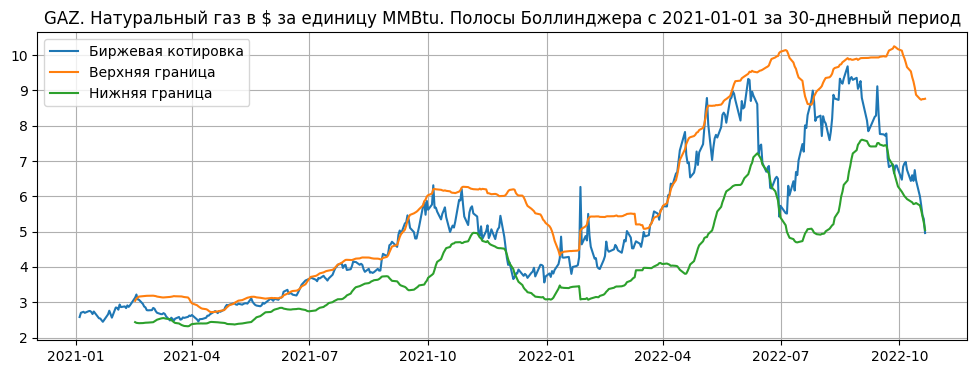

In [39]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

gaz_d = gaz[date:]
gaz_ma = gaz_d.rolling(window=n).mean()
gaz_sd = gaz_d.rolling(window=n).std()

gaz_line1 = gaz_ma + (2 * gaz_sd)
gaz_line2 = gaz_ma - (2 * gaz_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(gaz_d, label='Биржевая котировка')
plt.plot(gaz_line1, label='Верхняя граница')
plt.plot(gaz_line2, label='Нижняя граница')
plt.title(f'GAZ. Натуральный газ в $ за единицу MMBtu. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

### Алюминий $ за тонну
###### ALI=F
<a href="https://finance.yahoo.com/quote/ALI=F?p=ALI=F" target="_blank">https://finance.yahoo.com/quote/ALI=F?p=ALI=F</a>

[Ссылка на оглавление](######Start)

               High      Low     Open    Close  Volume  Adj Close
Date                                                             
2022-10-17  2259.75  2259.75  2259.75  2259.75     0.0    2259.75
2022-10-18  2204.50  2204.50  2204.50  2204.50     0.0    2204.50
2022-10-19  2187.00  2187.00  2187.00  2187.00     0.0    2187.00
2022-10-20  2228.25  2228.25  2228.25  2228.25     0.0    2228.25
2022-10-21  2223.50  2223.50  2223.50  2223.50     0.0    2223.50
-----
2095


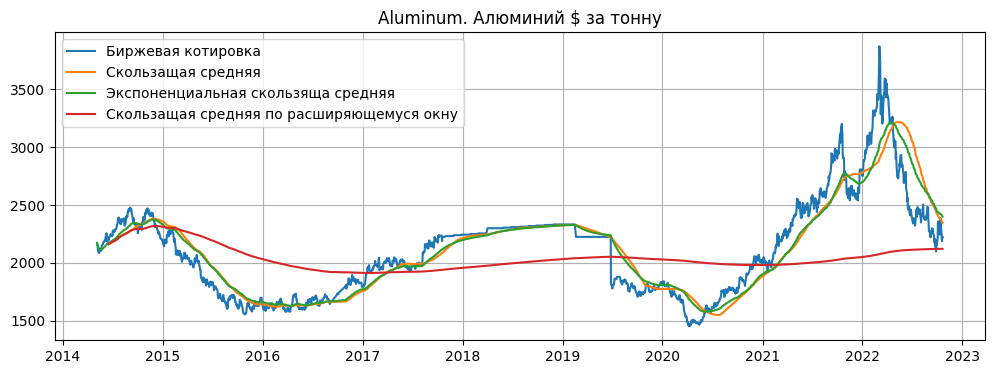

In [40]:
# Aluminum 
ali = pdr.get_data_yahoo('ALI=F', start=start)

print(ali.tail())
print('-----')
print(len(ali['Close']))

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(ali['Close'], label='Биржевая котировка')
plt.plot(ali['Close'].rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(ali['Close'].ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(ali['Close'].expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Aluminum. Алюминий $ за тонну')
plt.legend()
plt.show()

In [41]:
# беру только цену закрытия
aluminum = ali['Close'].to_frame(name='Aluminum')

aluminum

Aluminum
Date                
2014-05-06   2172.75
2014-05-07   2149.00
2014-05-08   2141.75
2014-05-09   2107.25
2014-05-12   2088.25
...              ...
2022-10-17   2259.75
2022-10-18   2204.50
2022-10-19   2187.00
2022-10-20   2228.25
2022-10-21   2223.50

[2095 rows x 1 columns]

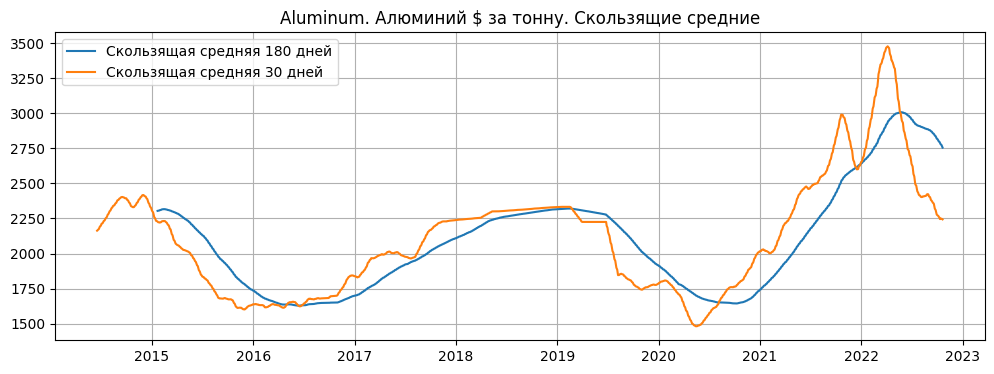

In [42]:
# скользящие средние разных периодов 

aluminum_rol180 = aluminum.rolling(180).mean()
aluminum_rol90 = aluminum.rolling(90).mean()
aluminum_rol30 = aluminum.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(aluminum_rol180, label='Скользящая средняя 180 дней')
# plt.plot(aluminum_rol90, label='Скользащая средняя 90 дней')
plt.plot(aluminum_rol30, label='Скользящая средняя 30 дней')
plt.title('Aluminum. Алюминий $ за тонну. Скользящие средние')
plt.legend()
plt.show()

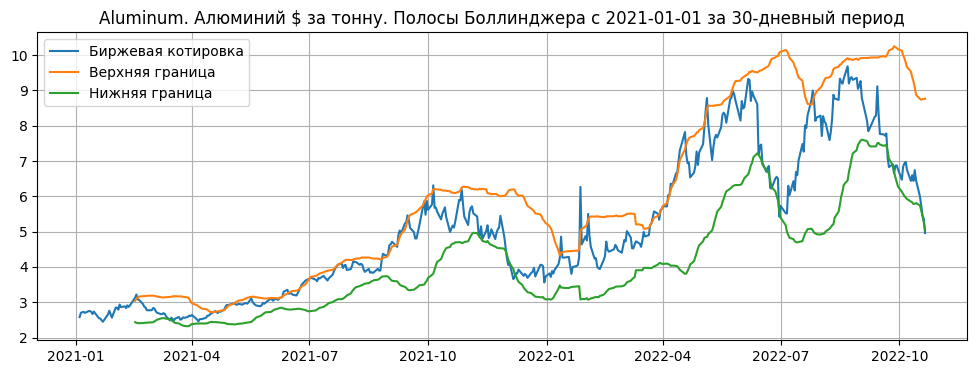

In [43]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

aluminum_d = gaz[date:]
aluminum_ma = aluminum_d.rolling(window=n).mean()
aluminum_sd = aluminum_d.rolling(window=n).std()

aluminum_line1 = aluminum_ma + (2 * aluminum_sd)
aluminum_line2 = aluminum_ma - (2 * aluminum_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(aluminum_d, label='Биржевая котировка')
plt.plot(aluminum_line1, label='Верхняя граница')
plt.plot(aluminum_line2, label='Нижняя граница')
plt.title(f'Aluminum. Алюминий $ за тонну. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

### Медь $ за фунт
###### HG=F
<a href="https://finance.yahoo.com/quote/HG%3DF?p=HG%3DF" target="_blank">https://finance.yahoo.com/quote/HG%3DF?p=HG%3DF</a>

[Ссылка на оглавление](######Start)

              High     Low    Open   Close  Volume  Adj Close
Date                                                         
2022-10-17  3.4790  3.4390  3.4500  3.4555   269.0     3.4555
2022-10-18  3.4425  3.3900  3.4350  3.4065   331.0     3.4065
2022-10-19  3.3695  3.3580  3.3690  3.3605   353.0     3.3605
2022-10-20  3.4670  3.4175  3.4215  3.4510   433.0     3.4510
2022-10-21  3.5230  3.4600  3.4600  3.5230   433.0     3.5230
-----
3728


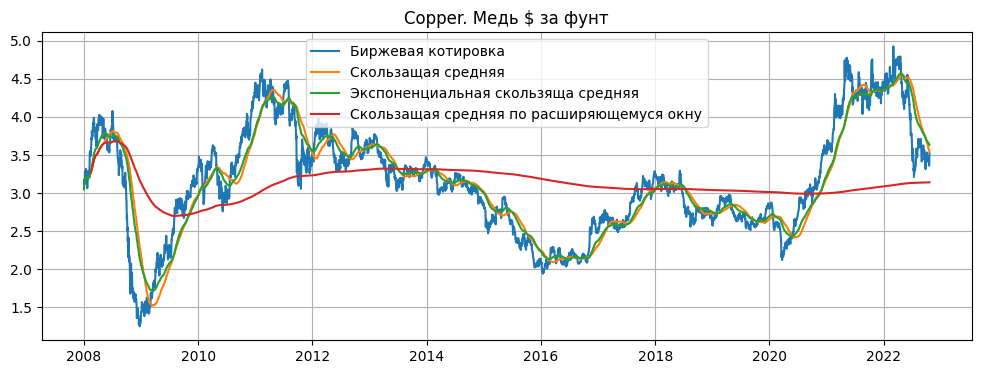

In [48]:
# Copper
hgf = pdr.get_data_yahoo('HG=F', start=start)

print(hgf.tail())
print('-----')
print(len(hgf['Close']))

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(hgf['Close'], label='Биржевая котировка')
plt.plot(hgf['Close'].rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(hgf['Close'].ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(hgf['Close'].expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Copper. Медь $ за фунт')
plt.legend()
plt.show()

In [49]:
# беру только цену закрытия
cupper = hgf['Close'].to_frame(name='Cupper')

cupper

Cupper
Date              
2008-01-02  3.0505
2008-01-03  3.1730
2008-01-04  3.1415
2008-01-07  3.1250
2008-01-08  3.2735
...            ...
2022-10-17  3.4555
2022-10-18  3.4065
2022-10-19  3.3605
2022-10-20  3.4510
2022-10-21  3.5230

[3728 rows x 1 columns]

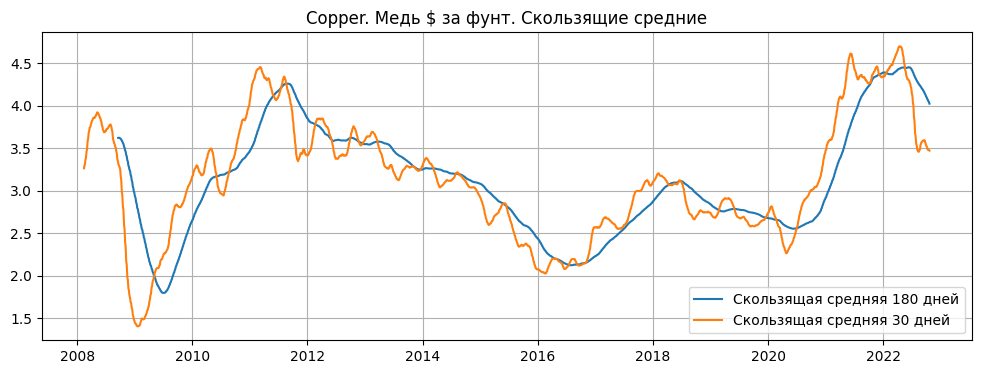

In [50]:
# скользящие средние разных периодов 

cupper_rol180 = cupper.rolling(180).mean()
cupper_rol90 = cupper.rolling(90).mean()
cupper_rol30 = cupper.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(cupper_rol180, label='Скользящая средняя 180 дней')
# plt.plot(cupper_rol90, label='Скользащая средняя 90 дней')
plt.plot(cupper_rol30, label='Скользящая средняя 30 дней')
plt.title('Copper. Медь $ за фунт. Скользящие средние')
plt.legend()
plt.show()

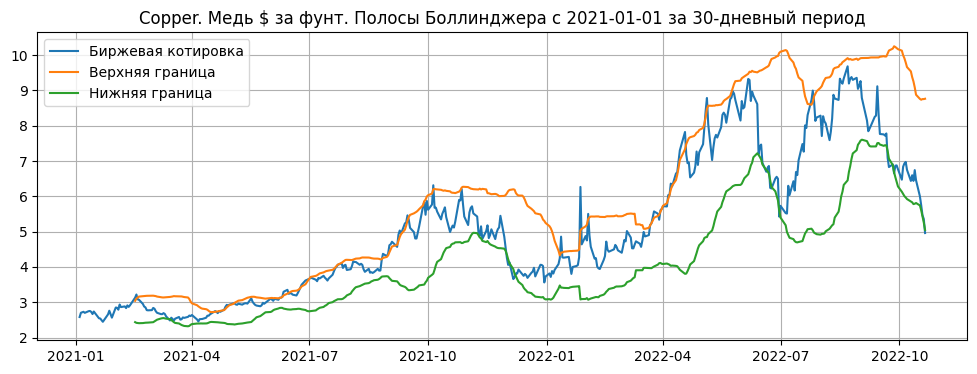

In [51]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

cupper_d = gaz[date:]
cupper_ma = cupper_d.rolling(window=n).mean()
cupper_sd = cupper_d.rolling(window=n).std()

cupper_line1 = cupper_ma + (2 * cupper_sd)
cupper_line2 = cupper_ma - (2 * cupper_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(cupper_d, label='Биржевая котировка')
plt.plot(cupper_line1, label='Верхняя граница')
plt.plot(cupper_line2, label='Нижняя граница')
plt.title(f'Copper. Медь $ за фунт. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

### S&P-GSCI Commodity Index Future - сводный показатель динамики сырьевых товаров
###### GD=F

<a href="https://finance.yahoo.com/quote/GD%3DF?p=GD%3DF" target="_blank">https://finance.yahoo.com/quote/GD%3DF?p=GD%3DF</a>

[Ссылка на оглавление](######Start)

                 High        Low       Open      Close  Volume  Adj Close
Date                                                                     
2022-10-17  640.71997  640.71997  640.71997  640.71997     1.0  640.71997
2022-10-18  630.00000  620.20001  630.00000  627.79999    61.0  627.79999
2022-10-19  623.59998  619.20001  619.84998  622.84998    15.0  622.84998
2022-10-20  623.40002  623.40002  623.40002  623.40002     0.0  623.40002
2022-10-21  626.34998  620.90002  621.09998  626.04999     0.0  626.04999
-----
3545


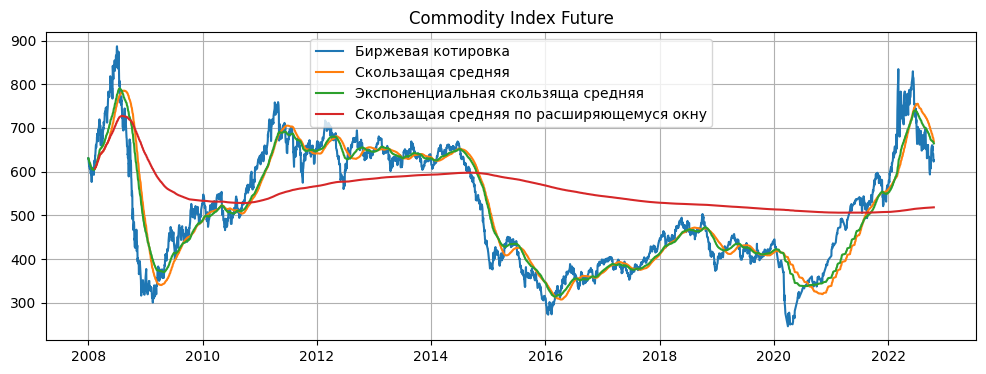

In [52]:
# Commodity Index Future
gdf = pdr.get_data_yahoo('GD=F', start=start)

print(gdf.tail())
print('-----')
print(len(gdf['Close']))

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(gdf['Close'], label='Биржевая котировка')
plt.plot(gdf['Close'].rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(gdf['Close'].ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(gdf['Close'].expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Commodity Index Future')
plt.legend()
plt.show()

In [53]:
# беру только цену закрытия
CIF = gdf['Close'].to_frame(name='CIF')

CIF

CIF
Date                 
2008-01-02  630.50000
2008-01-03  630.50000
2008-01-04  624.79999
2008-01-07  612.00000
2008-01-08  621.25000
...               ...
2022-10-17  640.71997
2022-10-18  627.79999
2022-10-19  622.84998
2022-10-20  623.40002
2022-10-21  626.04999

[3545 rows x 1 columns]

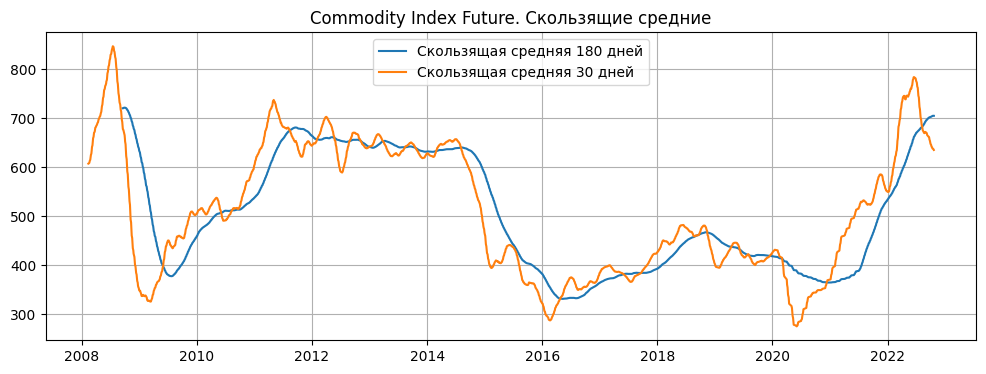

In [54]:
# скользящие средние разных периодов 

CIF_rol180 = CIF.rolling(180).mean()
CIF_rol90 = CIF.rolling(90).mean()
CIF_rol30 = CIF.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(CIF_rol180, label='Скользящая средняя 180 дней')
# plt.plot(CIF_rol90, label='Скользащая средняя 90 дней')
plt.plot(CIF_rol30, label='Скользящая средняя 30 дней')
plt.title('Commodity Index Future. Скользящие средние')
plt.legend()
plt.show()

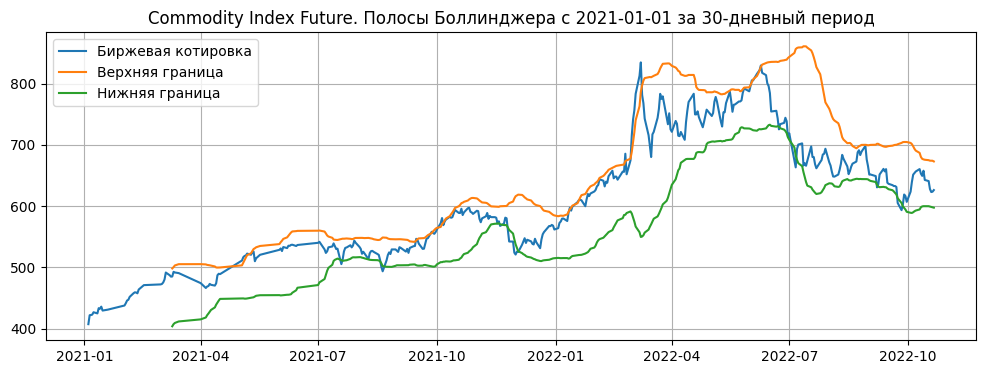

In [55]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

CIF_d = CIF[date:]
CIF_ma = CIF_d.rolling(window=n).mean()
CIF_sd = CIF_d.rolling(window=n).std()

CIF_line1 = CIF_ma + (2 * CIF_sd)
CIF_line2 = CIF_ma - (2 * CIF_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(CIF_d, label='Биржевая котировка')
plt.plot(CIF_line1, label='Верхняя граница')
plt.plot(CIF_line2, label='Нижняя граница')
plt.title(f'Commodity Index Future. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

### Зерно $ за 1 тонну
###### ZC=F

<a href="https://finance.yahoo.com/quote/ZC=F?p=ZC=F" target="_blank">https://finance.yahoo.com/quote/ZC=F?p=ZC=F</a>

[Ссылка на оглавление](######Start)

              High     Low   Open   Close    Volume  Adj Close
Date                                                          
2022-10-17  692.25  681.25  689.0  683.50  106164.0     683.50
2022-10-18  683.75  674.50  683.0  681.00  147455.0     681.00
2022-10-19  684.50  674.00  681.0  678.25  112233.0     678.25
2022-10-20  687.00  676.75  678.0  684.00  134819.0     684.00
2022-10-21  688.00  677.75  683.5  684.25  134819.0     684.25
-----
3725


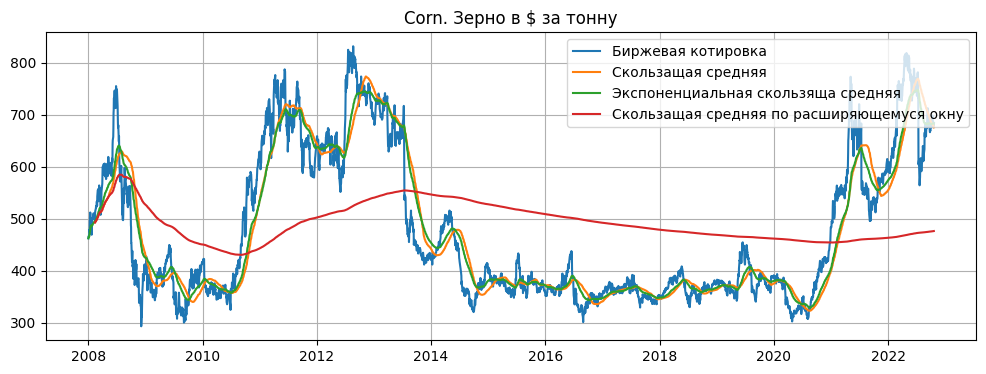

In [56]:
# Corn
zcf = pdr.get_data_yahoo('ZC=F', start=start)

print(zcf.tail())
print('-----')
print(len(zcf['Close']))

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(zcf['Close'], label='Биржевая котировка')
plt.plot(zcf['Close'].rolling(90, min_periods=30).mean(), label='Скользащая средняя')
plt.plot(zcf['Close'].ewm(span=90).mean(), label='Экспоненциальная скользяща средняя')
plt.plot(zcf['Close'].expanding(30).mean(), label='Скользащая средняя по расширяющемуся окну')
plt.title('Corn. Зерно в $ за тонну')
plt.legend()
plt.show()

In [58]:
# беру только цену закрытия
corn = zcf['Close'].to_frame(name='Corn')

corn

Corn
Date              
2008-01-02  462.50
2008-01-03  466.00
2008-01-04  466.75
2008-01-07  466.25
2008-01-08  478.75
...            ...
2022-10-17  683.50
2022-10-18  681.00
2022-10-19  678.25
2022-10-20  684.00
2022-10-21  684.25

[3725 rows x 1 columns]

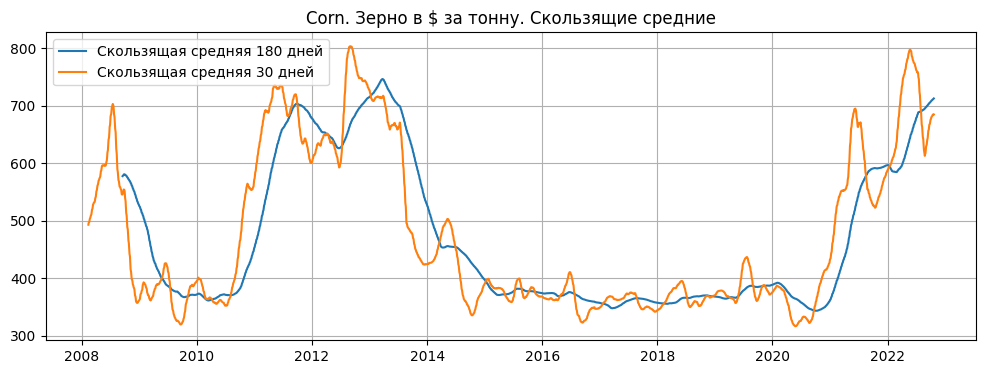

In [60]:
#  скользящие средние разных периодов 

corn_rol180 = corn.rolling(180).mean()
corn_rol90 = corn.rolling(90).mean()
corn_rol30 = corn.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(corn_rol180, label='Скользящая средняя 180 дней')
# plt.plot(corn_rol90, label='Скользащая средняя 90 дней')
plt.plot(corn_rol30, label='Скользящая средняя 30 дней')
plt.title('Corn. Зерно в $ за тонну. Скользящие средние')
plt.legend()
plt.show()

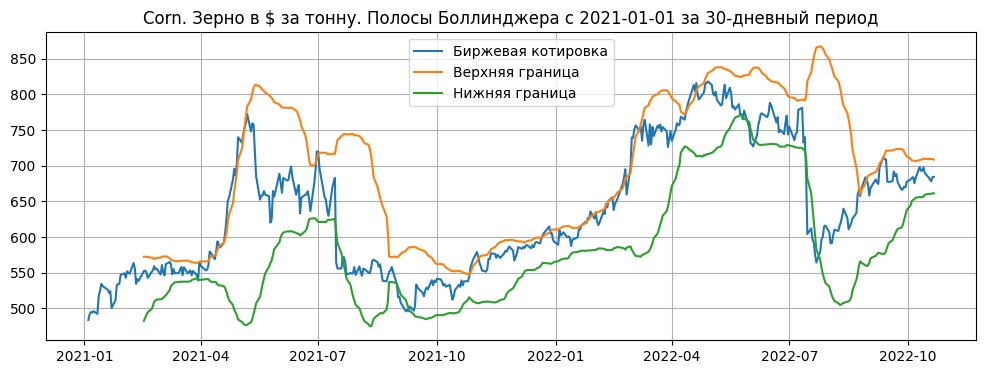

In [61]:
# полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

corn_d = corn[date:]
corn_ma = corn_d.rolling(window=n).mean()
corn_sd = corn_d.rolling(window=n).std()

corn_line1 = corn_ma + (2 * corn_sd)
corn_line2 = corn_ma - (2 * corn_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(corn_d, label='Биржевая котировка')
plt.plot(corn_line1, label='Верхняя граница')
plt.plot(corn_line2, label='Нижняя граница')
plt.title(f'Corn. Зерно в $ за тонну. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

### 03. Соединение все представленных временных рядов в один dateframe
###### df

[Ссылка на оглавление](######Start)

In [62]:
# соединение всех данных в один df

df = pd.concat([coal, brent, gaz, CIF, cupper, aluminum, corn, gold, silver, platinum], axis=1)

# удаление nan
df = df.dropna(how='any')

# перечень столбцов
col = df.columns

# вывод сомого df
df

Coal   Brent    Gaz        CIF  Cupper  Aluminum    Corn  \
Date                                                                        
2014-05-06   75.15000  107.06  4.799  649.00000  3.0750   2172.75  513.00   
2014-05-07   74.85000  108.13  4.740  652.20001  3.0505   2149.00  510.25   
2014-05-08   75.15000  108.04  4.572  650.75000  3.0825   2141.75  513.25   
2014-05-09   75.15000  107.89  4.531  648.50000  3.1005   2107.25  505.00   
2014-05-12   75.10000  108.41  4.434  650.00000  3.1665   2088.25  497.50   
...               ...     ...    ...        ...     ...       ...     ...   
2022-10-17  269.50000   91.62  5.999  640.71997  3.4555   2259.75  683.50   
2022-10-18  266.64999   90.03  5.745  627.79999  3.4065   2204.50  681.00   
2022-10-19  267.00000   92.41  5.462  622.84998  3.3605   2187.00  678.25   
2022-10-20  270.00000   92.38  5.358  623.40002  3.4510   2228.25  684.00   
2022-10-21  269.75000   93.50  4.959  626.04999  3.5230   2223.50  684.25   

                  Gold  Silver    Platinum  
Date                                        
2014-05-06  1308.30005  19.598  1457.09998  
2014-05-07  1288.59998  19.298  1433.80005  
2014-05-08  1287.40002  19.094  1437.09998  
2014-05-09  1287.30005  19.077  1428.90002  
2014-05-12  1295.59998  19.500  1440.90002  
...                ...     ...         ...  
2022-10-17  1657.00000  18.674   924.00000  
2022-10-18  1649.00000  18.571   917.70001  
2022-10-19  1627.50000  18.336   891.50000  
2022-10-20  1630.80005  18.666   930.09998  
2022-10-21  1651.00000  19.043   954.59998  

[1841 rows x 10 columns]

In [63]:
# сохранил в excel что бы было.
# df.to_excel('ts_base_coal_2.xlsx')

In [64]:
# сводные статистики

df.describe()

Coal       Brent         Gaz         CIF      Cupper    Aluminum  \
count  1841.00000  1841.00000  1841.00000  1841.00000  1841.00000  1841.00000   
mean    102.03252    66.52607     3.37730   457.70369     3.02051  2148.05187   
std      80.79815    20.30716     1.48102   114.96943     0.69496   408.53098   
min      38.58000    22.76000     1.55200   245.89999     1.93950  1452.00000   
25%      57.90000    51.66000     2.59500   381.54999     2.59850  1809.00000   
50%      75.09000    63.29000     2.89200   423.85001     2.81900  2210.25000   
75%      95.20000    75.95000     3.76600   520.45001     3.19350  2328.25000   
max     438.35001   127.98000     9.68000   834.50000     4.92900  3873.00000   

             Corn        Gold      Silver    Platinum  
count  1841.00000  1841.00000  1841.00000  1841.00000  
mean    428.84900  1415.94215    18.22732   986.96426  
std     120.57087   257.74452     3.48781   154.34352  
min     301.50000  1050.80005    12.77200   656.70001  
25%     358.75000  1226.50000    15.82300   888.29999  
50%     375.00000  1296.30005    17.05000   953.29999  
75%     429.00000  1678.69995    19.61500  1032.30005  
max     818.25000  2051.50000    29.39800  1516.00000

In [65]:
# Графики (но не совсем наглядно и приемлемо)
# df.plot(kind='line', subplots=True, figsize=(10, 16));


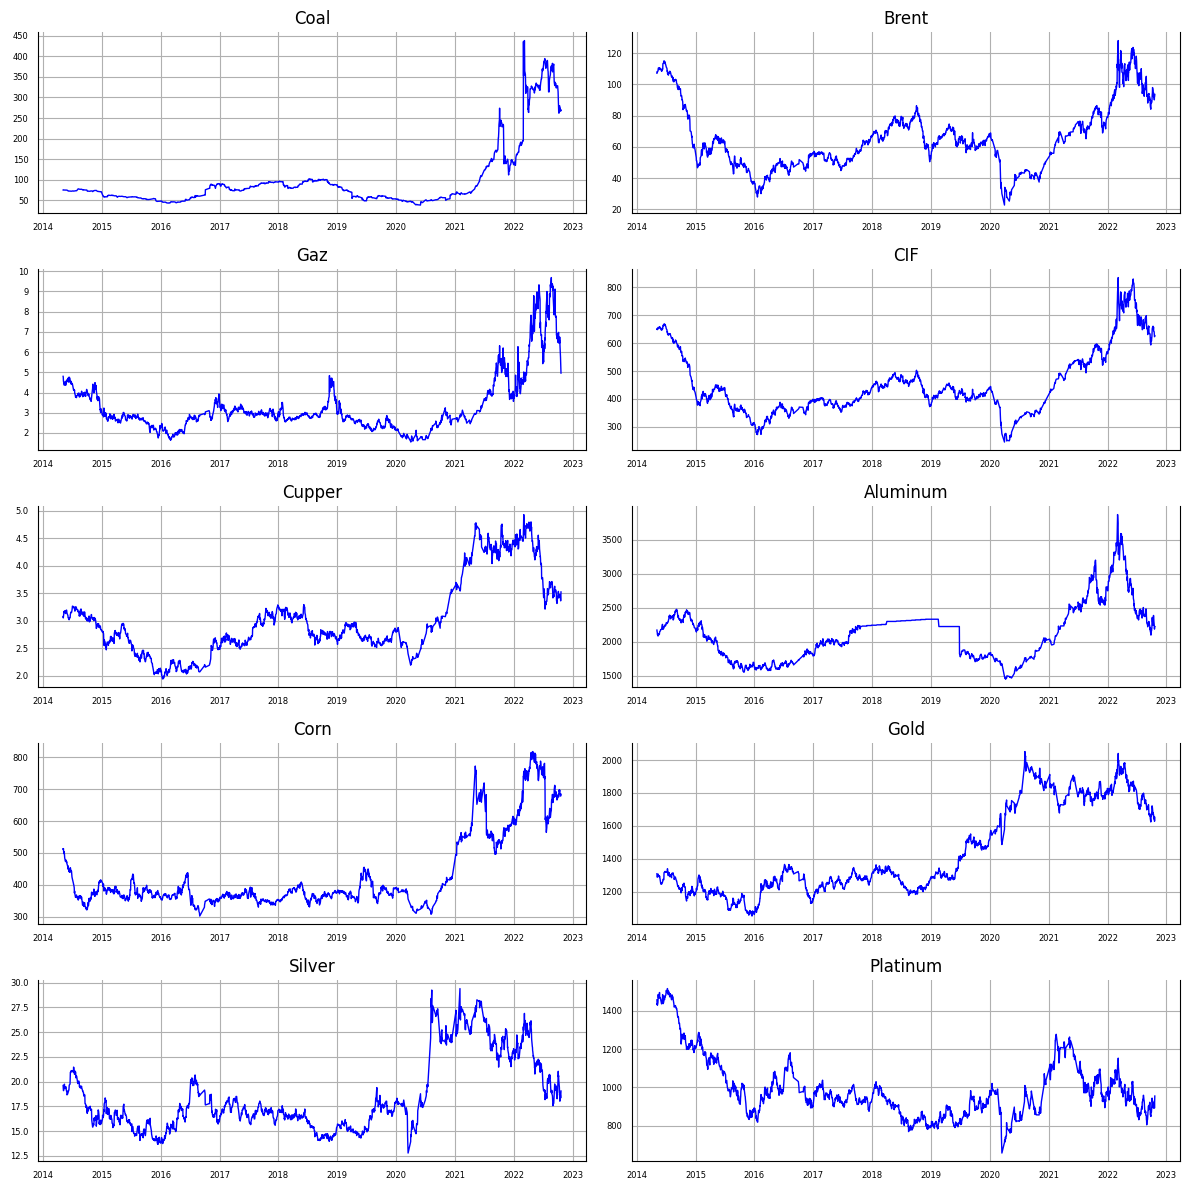

In [66]:
# графики для общего представления временных рядов
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=100, figsize=(12,12)) 
for i, ax in enumerate(axes.flatten()):
    data_temp = df[df.columns[i]]
    ax.plot(data_temp, color='blue', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.grid(1)

plt.tight_layout();

#### 03.1 Корреляция временных рядов
###### corr

[Ссылка на оглавление](######Start)

In [67]:
# Корреляция 
corr = df.corr()
corr

Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Coal      1.00000  0.69323  0.89990  0.80126  0.65451   0.66238  0.82718   
Brent     0.69323  1.00000  0.75085  0.96857  0.67231   0.75682  0.64464   
Gaz       0.89990  0.75085  1.00000  0.83923  0.62356   0.63139  0.75450   
CIF       0.80126  0.96857  0.83923  1.00000  0.78061   0.80230  0.79451   
Cupper    0.65451  0.67231  0.62356  0.78061  1.00000   0.86044  0.80981   
Aluminum  0.66238  0.75682  0.63139  0.80230  0.86044   1.00000  0.67136   
Corn      0.82718  0.64464  0.75450  0.79451  0.80981   0.67136  1.00000   
Gold      0.57423  0.36665  0.47077  0.51509  0.76672   0.49486  0.73581   
Silver    0.41493  0.36860  0.39276  0.51111  0.78565   0.50697  0.66291   
Platinum -0.09118  0.34541  0.10450  0.32853  0.20184   0.14899  0.07689   

             Gold   Silver  Platinum  
Coal      0.57423  0.41493  -0.09118  
Brent     0.36665  0.36860   0.34541  
Gaz       0.47077  0.39276   0.10450  
CIF       0.51509  0.51111   0.32853  
Cupper    0.76672  0.78565   0.20184  
Aluminum  0.49486  0.50697   0.14899  
Corn      0.73581  0.66291   0.07689  
Gold      1.00000  0.84860  -0.03320  
Silver    0.84860  1.00000   0.35566  
Platinum -0.03320  0.35566   1.00000

Text(0.5, 1.0, 'Корреляция ежедневных значений в $')

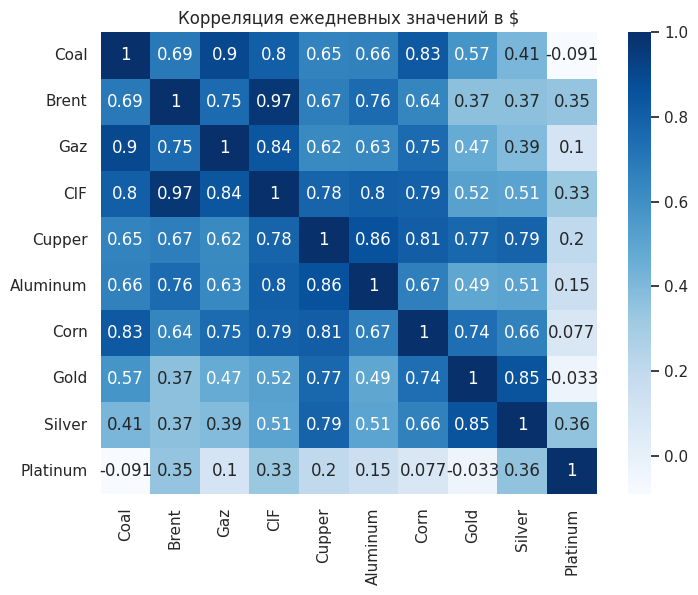

In [68]:
# Корреляция график heatmap

sns.set(rc = {'figure.figsize':(8, 6)})


sns.heatmap(corr, cmap='Blues', annot=True).set_title('Корреляция ежедневных значений в $')

Обратите внимание на пары товаров с высокой корреляцией (выше 0,75) такие как: 

Уголь - Газ         0,90 

Золото - Серебро    0,85

Уголь - Зерно       0,83 

Медь - Серебро      0,79 

Нефть - Алюминий    0,76 

Газ - Нефть         0,75 

Газ - Зерно         0,75 

Также следует заметить показатели корреляции платины, которые ведут себя практически независимо от других биржевых товаров и особенно на показатель

Платина - Серебро   0,36 - это пригодиться для последующего сравнения



In [72]:
# Определяем корреляцию Пирсона
# Коэффициент корреляции Пирсона применяется для исследования взаимосвязи двух переменных, 
# измеренных в метрических шкалах на одной и той же выборке. 
# Он позволяет определить, насколько пропорциональная изменчивость двух переменных.


# pearsonr(df['Coal'], df['Gold'])

# pearsonr(df['Brent'], df['CIF'])

# Коэфт корреляциии Спирмена
# Коэффициент корреляции Спирмена определяется как коэффициент корреляции Пирсона между ранговыми переменными.

# spearmanr(df['Brent'], df['Coal'])

# spearmanr(df['Brent'], df['CIF'])

          Coal    Brent      Gaz     Gold
Coal   1.00000  0.69323  0.89990  0.57423
Brent  0.69323  1.00000  0.75085  0.36665
Gaz    0.89990  0.75085  1.00000  0.47077
Gold   0.57423  0.36665  0.47077  1.00000


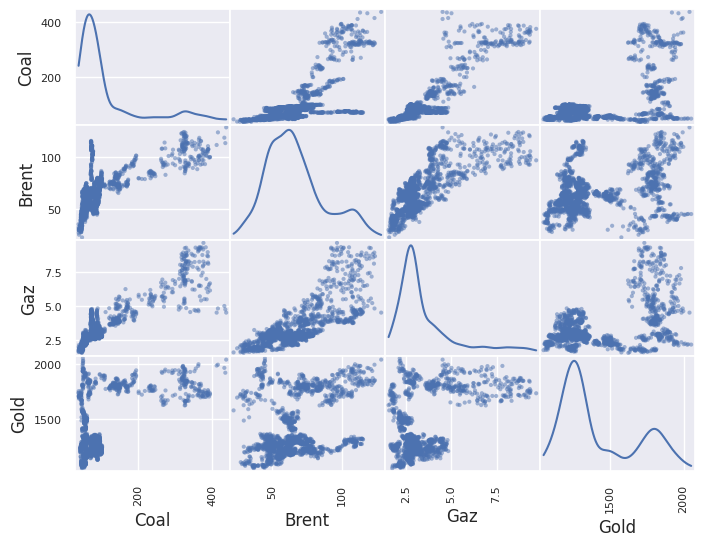

In [73]:
# Корреляция график scatter_matrix по отдельным временным рядам

df1 = df[["Coal", 'Brent', "Gaz", 'Gold']]

print(df1.corr())
pd.plotting.scatter_matrix(df1, diagonal='kde'); # , diagonal='kde'

#### 03.2 Ежедневная волотильность временных рядов
###### df_corr

[Ссылка на оглавление](######Start)

In [74]:
#  Ежедн изм

df_diff = df - df.shift(1)

df_diff.dropna(inplace=True)

df_diff

Coal    Brent    Gaz       CIF  Cupper  Aluminum  Corn  \
Date                                                                    
2014-05-07 -0.30000  1.07000 -0.059   3.20001 -0.0245    -23.75 -2.75   
2014-05-08  0.30000 -0.09000 -0.168  -1.45001  0.0320     -7.25  3.00   
2014-05-09  0.00000 -0.15000 -0.041  -2.25000  0.0180    -34.50 -8.25   
2014-05-12 -0.05000  0.52000 -0.097   1.50000  0.0660    -19.00 -7.50   
2014-05-13  0.00000  0.82999 -0.076   4.40002 -0.0170     -3.00  5.75   
...             ...      ...    ...       ...     ...       ...   ...   
2022-10-17 -5.00000 -0.00999 -0.454  -1.88000  0.0050    -78.00 -6.25   
2022-10-18 -2.85001 -1.59000 -0.254 -12.91998 -0.0490    -55.25 -2.50   
2022-10-19  0.35001  2.38000 -0.283  -4.95001 -0.0460    -17.50 -2.75   
2022-10-20  3.00000 -0.03001 -0.104   0.55005  0.0905     41.25  5.75   
2022-10-21 -0.25000  1.12000 -0.399   2.64996  0.0720     -4.75  0.25   

                Gold  Silver  Platinum  
Date                                    
2014-05-07 -19.70007  -0.300 -23.29993  
2014-05-08  -1.19995  -0.204   3.29993  
2014-05-09  -0.09998  -0.017  -8.19995  
2014-05-12   8.29993   0.423  12.00000  
2014-05-13  -1.00000   0.004  13.79993  
...              ...     ...       ...  
2022-10-17  15.30005   0.659  18.70001  
2022-10-18  -8.00000  -0.103  -6.29999  
2022-10-19 -21.50000  -0.235 -26.20001  
2022-10-20   3.30005   0.330  38.59998  
2022-10-21  20.19995   0.377  24.50000  

[1840 rows x 10 columns]

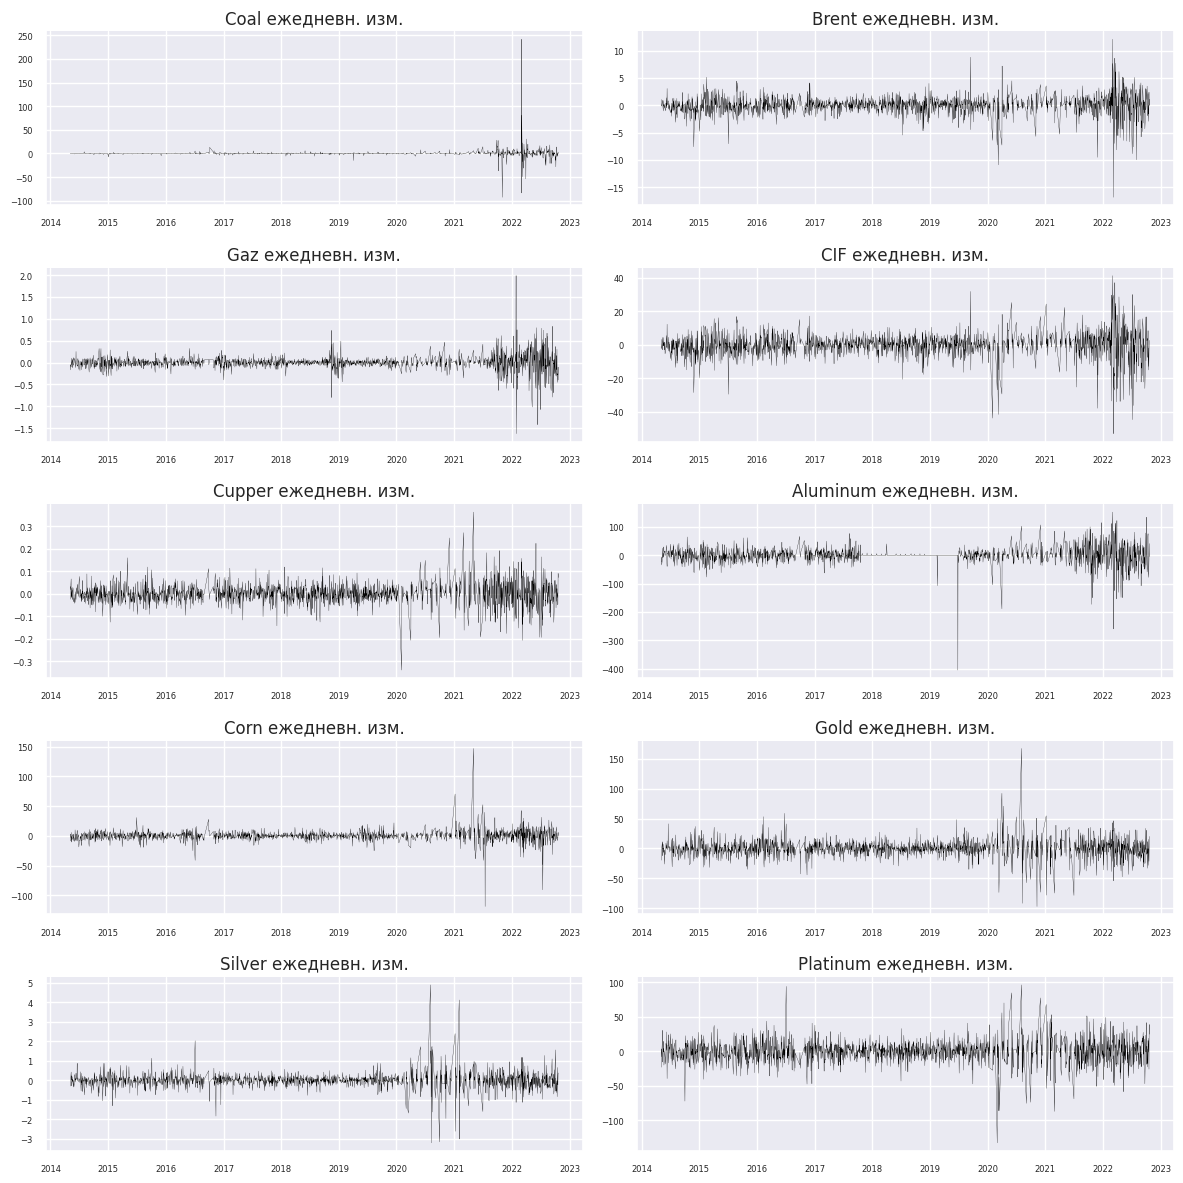

In [75]:
# графики ежедн изм
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=100, figsize=(12,12)) 
for i, ax in enumerate(axes.flatten()):
    data_temp = df_diff[df_diff.columns[i]]
    ax.plot(data_temp, color='black', linewidth=0.2)
    # Decorations
    ax.set_title(df_diff.columns[i] + ' ежедневн. изм.')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.grid(1)

plt.tight_layout();

In [76]:
# Логарифмическое изм.
# стр. 276 "Python для финансовых расчетов" для шкалиованных значений см ниже

# rets = np.log(df / df.shift(1))

# rets.dropna(inplace=True)

# rets

# отключил т.к. дублирует обычную волатильность

In [77]:
# графики логарифмического изм
# fig, axes = plt.subplots(nrows=5, ncols=2, dpi=100, figsize=(12,12)) 
# for i, ax in enumerate(axes.flatten()):
#     data_temp = rets[rets.columns[i]]
#     ax.plot(data_temp, color='black', linewidth=0.2)
#     # Decorations
#     ax.set_title(rets.columns[i] + ' логаримм. изм.')
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)
#     ax.grid(1)

# plt.tight_layout();

# отключил т.к. дублирует обычную волатильность

In [78]:
# Регрессионный анализ по методу наименьших квадратов

# reg = np.polyfit(rets['Coal'], rets['Brent'], deg=1)

# ax = rets.plot(kind='scatter', x = 'Coal', y = 'Brent', figsize=(6, 4))
# ax.plot(rets['Coal'], np.polyval(reg, rets['Coal']), 'r', lw=2)

In [79]:
# Кореляция логарифм. изм. ежедневных значений в $'

# corr2 = rets.corr()

# corr2

In [80]:
# Корреляция логарифм изм график heatmap

# sns.set(rc = {'figure.figsize':(8, 6)})


# sns.heatmap(corr2, cmap='Blues', annot=True).set_title('Корреляция логарифм. изм. ежедневных значений в $')

# отключил т.к. дублирует обычную волатильность

In [82]:
# Корреляция скользящим окном Уголь - Нефть

# ax = rets['Coal'].rolling(window=180).corr(rets['Brent']).plot(figsize=(8, 4))
# ax.axhline(rets.corr().iloc[0, 1], c='r') # значение за весь период

# отключил

In [83]:
# проверка
# rets.corr().iloc[0, 1]

In [84]:
# наглядности в проверке
# rets.corr()

### 04. Шкалирование временных рядов
###### df1_scaler

В данном случае шкалирование произвожу методом MinMaxScaler в диапазоне (0, 1)


[Ссылка на оглавление](######Start)

In [85]:
# Шкалирование 

scalerMMS = preprocessing.MinMaxScaler()

# scalerSS = preprocessing.StandardScaler()

# scalerN = preprocessing.Normalizer() # так все в единицы переводит

# 
# scalerMMS.inverse_transform(dataScaled)

In [86]:
# Шкалирование получение Series
series_scaler = scalerMMS.fit_transform(df)
series_scaler

array([[0.0914776 , 0.80117843, 0.39948322, ..., 0.25731989, 0.41056172,
        0.93145581],
       [0.09072716, 0.8113476 , 0.39222436, ..., 0.23763359, 0.39251774,
        0.9043408 ],
       [0.0914776 , 0.81049228, 0.3715551 , ..., 0.23643448, 0.38024777,
        0.90818105],
       ...,
       [0.57137853, 0.66194641, 0.48105312, ..., 0.57629657, 0.33465656,
        0.27324565],
       [0.57888285, 0.66166123, 0.46825783, ..., 0.57959431, 0.35450499,
        0.31816591],
       [0.57825749, 0.67230562, 0.4191683 , ..., 0.59978013, 0.37718025,
        0.34667749]])

In [87]:
# DataFrame ежедневных данных из series с нормализованными данными,

df_scaler = pd.DataFrame(series_scaler, index=df.index)

df_scaler.columns = col

df_scaler

Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                         
2014-05-06  0.09148  0.80118  0.39948  0.68485  0.37983   0.29771  0.40929   
2014-05-07  0.09073  0.81135  0.39222  0.69028  0.37163   0.28790  0.40397   
2014-05-08  0.09148  0.81049  0.37156  0.68782  0.38234   0.28490  0.40977   
2014-05-09  0.09148  0.80907  0.36651  0.68400  0.38836   0.27065  0.39381   
2014-05-12  0.09135  0.81401  0.35458  0.68654  0.41044   0.26280  0.37929   
...             ...      ...      ...      ...      ...       ...      ...   
2022-10-17  0.57763  0.65444  0.54712  0.67078  0.50711   0.33364  0.73924   
2022-10-18  0.57050  0.63933  0.51587  0.64883  0.49072   0.31082  0.73440   
2022-10-19  0.57138  0.66195  0.48105  0.64042  0.47533   0.30359  0.72908   
2022-10-20  0.57888  0.66166  0.46826  0.64135  0.50560   0.32063  0.74020   
2022-10-21  0.57826  0.67231  0.41917  0.64585  0.52969   0.31867  0.74069   

               Gold   Silver  Platinum  
Date                                    
2014-05-06  0.25732  0.41056   0.93146  
2014-05-07  0.23763  0.39252   0.90434  
2014-05-08  0.23643  0.38025   0.90818  
2014-05-09  0.23633  0.37923   0.89864  
2014-05-12  0.24463  0.40467   0.91260  
...             ...      ...       ...  
2022-10-17  0.60578  0.35499   0.31107  
2022-10-18  0.59778  0.34879   0.30374  
2022-10-19  0.57630  0.33466   0.27325  
2022-10-20  0.57959  0.35450   0.31817  
2022-10-21  0.59978  0.37718   0.34668  

[1841 rows x 10 columns]

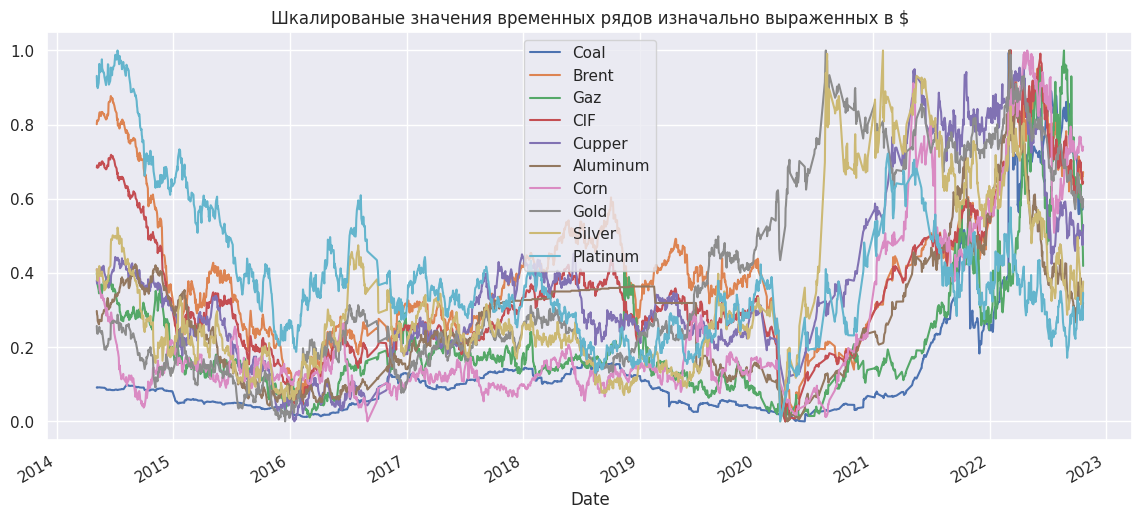

In [88]:
# График шкалированных врем рядов для наглядности
# В целом вид очень зашумленного и переполненного графика

df_scaler.plot(figsize=(14, 6), grid=True, title='Шкалированые значения временных рядов изначально выраженных в $');

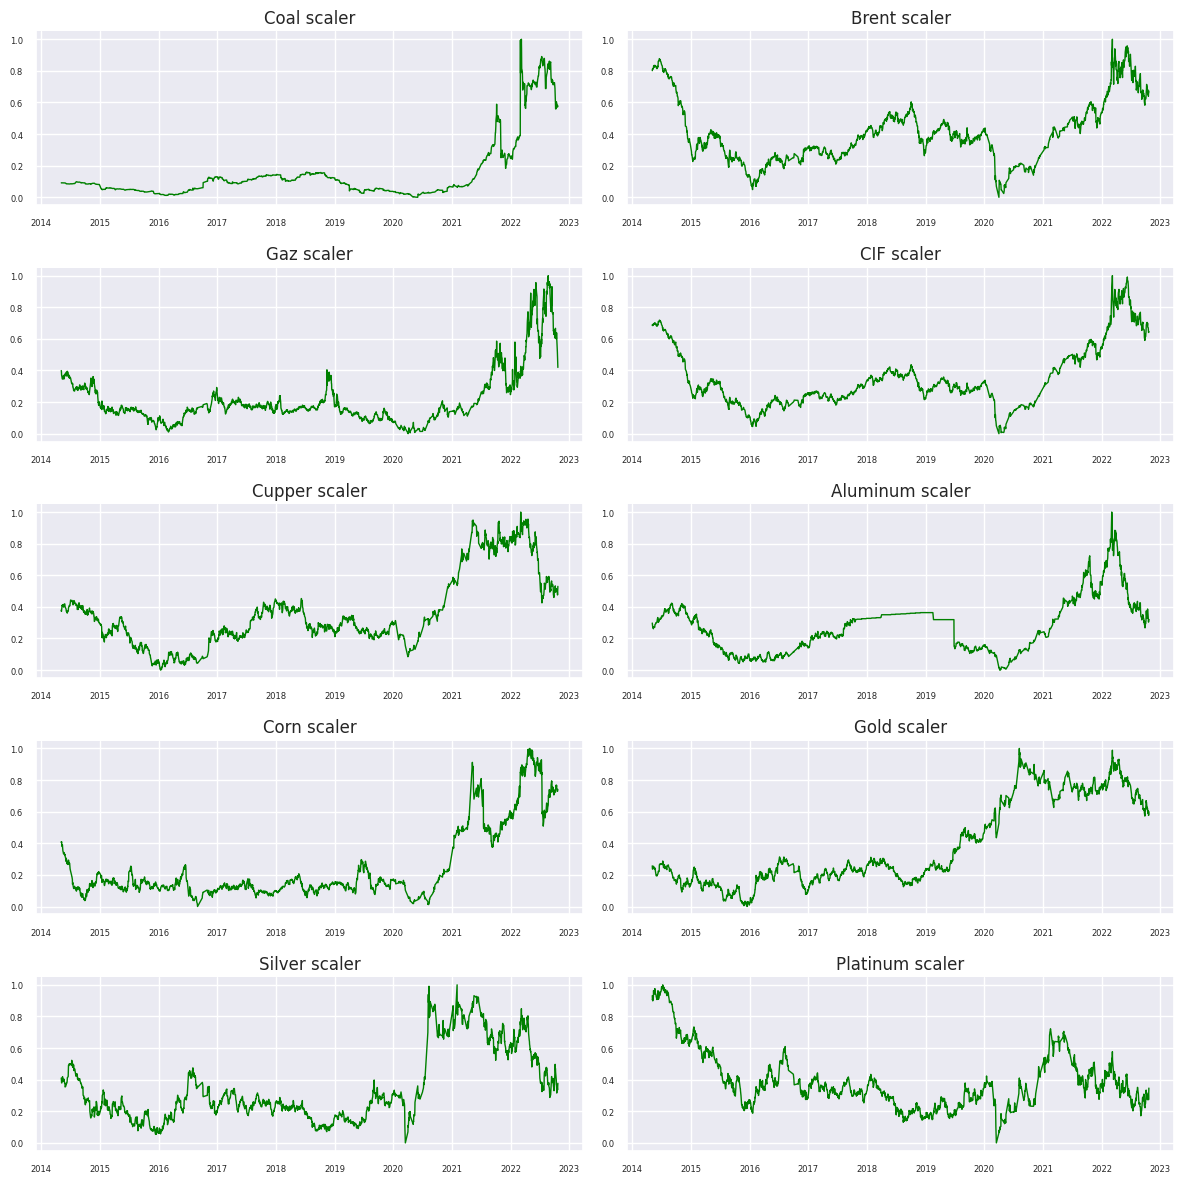

In [89]:
# графики для наглядности. Шкалирование. Preprocessing.MinMaxScaler.  
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=100, figsize=(12,12)) 
for i, ax in enumerate(axes.flatten()):
    data_temp = df_scaler[df_scaler.columns[i]]
    ax.plot(data_temp, color='green', linewidth=1)
    # Decorations
    ax.set_title(df_scaler.columns[i]+' scaler')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.grid(1)

plt.tight_layout();


# пока отключил 

In [90]:
# Добавляю скользящие средние шкалированных значений

df_scaler_roll_mean = df_scaler.rolling(180, min_periods=30).mean()

df_scaler_roll_mean

Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                         
2014-05-06      NaN      NaN      NaN      NaN      NaN       NaN      NaN   
2014-05-07      NaN      NaN      NaN      NaN      NaN       NaN      NaN   
2014-05-08      NaN      NaN      NaN      NaN      NaN       NaN      NaN   
2014-05-09      NaN      NaN      NaN      NaN      NaN       NaN      NaN   
2014-05-12      NaN      NaN      NaN      NaN      NaN       NaN      NaN   
...             ...      ...      ...      ...      ...       ...      ...   
2022-10-17  0.70516  0.76916  0.66376  0.77984  0.70498   0.54588  0.79340   
2022-10-18  0.70654  0.76910  0.66436  0.77988  0.70329   0.54388  0.79399   
2022-10-19  0.70793  0.76916  0.66484  0.77985  0.70130   0.54183  0.79446   
2022-10-20  0.70922  0.76931  0.66474  0.77976  0.69937   0.53999  0.79512   
2022-10-21  0.71050  0.76944  0.66479  0.77968  0.69762   0.53803  0.79584   

               Gold   Silver  Platinum  
Date                                    
2014-05-06      NaN      NaN       NaN  
2014-05-07      NaN      NaN       NaN  
2014-05-08      NaN      NaN       NaN  
2014-05-09      NaN      NaN       NaN  
2014-05-12      NaN      NaN       NaN  
...             ...      ...       ...  
2022-10-17  0.76440  0.53394   0.33785  
2022-10-18  0.76359  0.53266   0.33720  
2022-10-19  0.76263  0.53124   0.33635  
2022-10-20  0.76164  0.52989   0.33563  
2022-10-21  0.76080  0.52877   0.33515  

[1841 rows x 10 columns]

In [91]:
# График скользящих средних шкалированных значений
# df_scaler_roll_mean.plot(figsize=(14, 6), grid=True, title='Скользящие средние шкалированых значений')
# пока отключил т.к. сложно интерпретируемо


In [92]:
# Cumulative Moving Average (CMA)

# df_scaler_cma = df_scaler.expanding().mean()

df_scaler_cma = df_scaler.expanding(180).mean()

df_scaler_cma



Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                         
2014-05-06      NaN      NaN      NaN      NaN      NaN       NaN      NaN   
2014-05-07      NaN      NaN      NaN      NaN      NaN       NaN      NaN   
2014-05-08      NaN      NaN      NaN      NaN      NaN       NaN      NaN   
2014-05-09      NaN      NaN      NaN      NaN      NaN       NaN      NaN   
2014-05-12      NaN      NaN      NaN      NaN      NaN       NaN      NaN   
...             ...      ...      ...      ...      ...       ...      ...   
2022-10-17  0.15782  0.41542  0.22403  0.35922  0.36130   0.28745  0.24538   
2022-10-18  0.15804  0.41554  0.22419  0.35938  0.36137   0.28746  0.24564   
2022-10-19  0.15827  0.41568  0.22433  0.35953  0.36143   0.28747  0.24590   
2022-10-20  0.15849  0.41581  0.22446  0.35969  0.36151   0.28749  0.24617   
2022-10-21  0.15872  0.41595  0.22457  0.35984  0.36160   0.28751  0.24644   

               Gold   Silver  Platinum  
Date                                    
2014-05-06      NaN      NaN       NaN  
2014-05-07      NaN      NaN       NaN  
2014-05-08      NaN      NaN       NaN  
2014-05-09      NaN      NaN       NaN  
2014-05-12      NaN      NaN       NaN  
...             ...      ...       ...  
2022-10-17  0.36440  0.32806   0.38450  
2022-10-18  0.36453  0.32808   0.38446  
2022-10-19  0.36464  0.32808   0.38440  
2022-10-20  0.36476  0.32809   0.38436  
2022-10-21  0.36489  0.32812   0.38434  

[1841 rows x 10 columns]

In [93]:
# График коммулятиыных скользящих средних шкалированных значений
# df_scaler_cma.plot(figsize=(14, 6), grid=True, title='Коммулятивная скользящие средние шкалированых значений')
# пока отключил т.к. сложно интерпретируемо

In [94]:
# The Exponential Moving average (EMA)
# Добавляю экспоненциальная скользящая средняя шкалированных значений

# df_scaler_ema = df_scaler.ewm(alpha=0.1, adjust=False).mean()

# df_scaler_ema = df_scaler.ewm(alpha=0.1).mean()

# df_scaler_ema = df_scaler.ewm(span=90).mean()

df_scaler_ema = df_scaler.ewm(halflife = 30).mean()

df_scaler_ema



Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                         
2014-05-06  0.09148  0.80118  0.39948  0.68485  0.37983   0.29771  0.40929   
2014-05-07  0.09110  0.80632  0.39581  0.68760  0.37568   0.29275  0.40660   
2014-05-08  0.09123  0.80774  0.38754  0.68767  0.37795   0.29007  0.40768   
2014-05-09  0.09129  0.80809  0.38210  0.68672  0.38065   0.28505  0.40409   
2014-05-12  0.09130  0.80933  0.37634  0.68668  0.38688   0.28039  0.39890   
...             ...      ...      ...      ...      ...       ...      ...   
2022-10-17  0.72233  0.70871  0.72958  0.71583  0.56894   0.39499  0.73784   
2022-10-18  0.71886  0.70713  0.72470  0.71429  0.56715   0.39306  0.73776   
2022-10-19  0.71549  0.70610  0.71914  0.71261  0.56506   0.39102  0.73756   
2022-10-20  0.71237  0.70508  0.71341  0.71098  0.56370   0.38941  0.73762   
2022-10-21  0.70931  0.70433  0.70668  0.70949  0.56292   0.38780  0.73769   

               Gold   Silver  Platinum  
Date                                    
2014-05-06  0.25732  0.41056   0.93146  
2014-05-07  0.24736  0.40144   0.91774  
2014-05-08  0.24364  0.39421   0.91448  
2014-05-09  0.24175  0.39033   0.91038  
2014-05-12  0.24235  0.39333   0.91085  
...             ...      ...       ...  
2022-10-17  0.68041  0.42318   0.28717  
2022-10-18  0.67852  0.42148   0.28755  
2022-10-19  0.67619  0.41950   0.28722  
2022-10-20  0.67398  0.41801   0.28793  
2022-10-21  0.67229  0.41708   0.28927  

[1841 rows x 10 columns]

In [95]:
# График экспоненциальная скользящая средняя шкалированых значений
# df_scaler_ema.plot(figsize=(14, 6), grid=True, title='Экспоненциальная скользящая средняя шкалированых значений')

# пока отключил т.к. сложно интерпретируемо

In [96]:
# df по шкалированным значениям стоимости угля
# полностью соотвествует первому графику в данном файле - 

df_scaler_coal = pd.concat([df_scaler['Coal'], df_scaler_roll_mean['Coal'], df_scaler_cma['Coal'], df_scaler_ema['Coal']], axis=1)

df_scaler_coal.columns = ['scaler', 'roll_mean', 'cma', 'ema']

df_scaler_coal

scaler  roll_mean      cma      ema
Date                                            
2014-05-06  0.09148        NaN      NaN  0.09148
2014-05-07  0.09073        NaN      NaN  0.09110
2014-05-08  0.09148        NaN      NaN  0.09123
2014-05-09  0.09148        NaN      NaN  0.09129
2014-05-12  0.09135        NaN      NaN  0.09130
...             ...        ...      ...      ...
2022-10-17  0.57763    0.70516  0.15782  0.72233
2022-10-18  0.57050    0.70654  0.15804  0.71886
2022-10-19  0.57138    0.70793  0.15827  0.71549
2022-10-20  0.57888    0.70922  0.15849  0.71237
2022-10-21  0.57826    0.71050  0.15872  0.70931

[1841 rows x 4 columns]

In [97]:
# скрою данный график т.к. такой же вид как в долл.
# df_scaler_coal.plot(figsize=(14, 4), grid=True, title='График по шкалированным значениям стоимости угля')

### 05. Перход к измерению в унциях золота
###### df_gold

[Ссылка на оглавление](######Start)

In [162]:
# Прересчет в унции золота

df_gold = pd.DataFrame()

for column in df.columns:
    df_gold[column] = df[column] / df['Gold']
    

df_gold

Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                         
2014-05-06  0.05744  0.08183  0.00367  0.49606  0.00235   1.66074  0.39211   
2014-05-07  0.05809  0.08391  0.00368  0.50613  0.00237   1.66770  0.39597   
2014-05-08  0.05837  0.08392  0.00355  0.50548  0.00239   1.66362  0.39867   
2014-05-09  0.05838  0.08381  0.00352  0.50377  0.00241   1.63695  0.39229   
2014-05-12  0.05797  0.08368  0.00342  0.50170  0.00244   1.61180  0.38399   
...             ...      ...      ...      ...      ...       ...      ...   
2022-10-17  0.16264  0.05529  0.00362  0.38667  0.00209   1.36376  0.41249   
2022-10-18  0.16170  0.05460  0.00348  0.38072  0.00207   1.33687  0.41298   
2022-10-19  0.16406  0.05678  0.00336  0.38270  0.00206   1.34378  0.41674   
2022-10-20  0.16556  0.05665  0.00329  0.38227  0.00212   1.36635  0.41943   
2022-10-21  0.16339  0.05663  0.00300  0.37919  0.00213   1.34676  0.41445   

            Gold   Silver  Platinum  
Date                                 
2014-05-06   1.0  0.01498   1.11374  
2014-05-07   1.0  0.01498   1.11268  
2014-05-08   1.0  0.01483   1.11628  
2014-05-09   1.0  0.01482   1.11000  
2014-05-12   1.0  0.01505   1.11215  
...          ...      ...       ...  
2022-10-17   1.0  0.01127   0.55763  
2022-10-18   1.0  0.01126   0.55652  
2022-10-19   1.0  0.01127   0.54777  
2022-10-20   1.0  0.01145   0.57033  
2022-10-21   1.0  0.01153   0.57820  

[1841 rows x 10 columns]

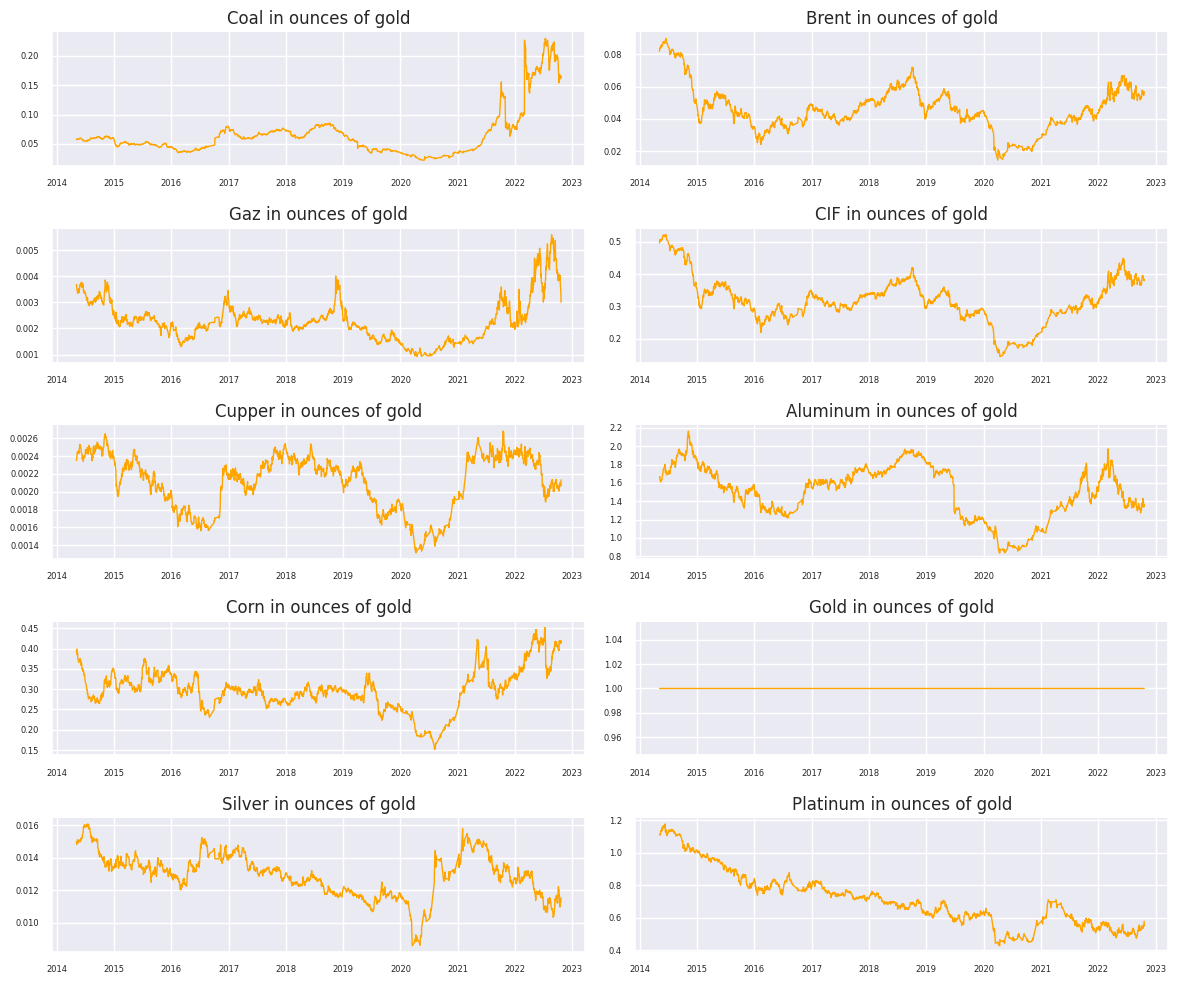

In [99]:
# графики стоимости выраженыех в унциях золота
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=100, figsize=(12,10)) 
for i, ax in enumerate(axes.flatten()):
    data_temp = df_gold[df_gold.columns[i]]
    ax.plot(data_temp, color='orange', linewidth=1)
    # Decorations
    ax.set_title(df_gold.columns[i]+' in ounces of gold')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.grid(1)

plt.tight_layout();

#### 05.1 Корреляция временных рядов выраженная в унциях золота
###### corr_gold

[Ссылка на оглавление](######Start)

In [100]:
# Корреляция в показателях пересчитаных в унции золота.

corr_gold = df_gold.corr()
corr_gold

Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Coal      1.00000  0.39032  0.78733  0.46259  0.34128   0.20948  0.64719   
Brent     0.39032  1.00000  0.63813  0.97630  0.66202   0.69995  0.42471   
Gaz       0.78733  0.63813  1.00000  0.72731  0.48325   0.43907  0.63164   
CIF       0.46259  0.97630  0.72731  1.00000  0.70273   0.72249  0.55666   
Cupper    0.34128  0.66202  0.48325  0.70273  1.00000   0.77872  0.45225   
Aluminum  0.20948  0.69995  0.43907  0.72249  0.77872   1.00000  0.30805   
Corn      0.64719  0.42471  0.63164  0.55666  0.45225   0.30805  1.00000   
Gold          NaN      NaN      NaN      NaN      NaN       NaN      NaN   
Silver   -0.19951  0.21208  0.07819  0.27876  0.36539   0.24172  0.09955   
Platinum -0.34295  0.44347  0.12079  0.49189  0.28674   0.44879  0.05056   

          Gold   Silver  Platinum  
Coal       NaN -0.19951  -0.34295  
Brent      NaN  0.21208   0.44347  
Gaz        NaN  0.07819   0.12079  
CIF        NaN  0.27876   0.49189  
Cupper     NaN  0.36539   0.28674  
Aluminum   NaN  0.24172   0.44879  
Corn       NaN  0.09955   0.05056  
Gold       NaN      NaN       NaN  
Silver     NaN  1.00000   0.66831  
Platinum   NaN  0.66831   1.00000

Text(0.5, 1.0, 'Корреляции показателей, выраженных в унциях золота')

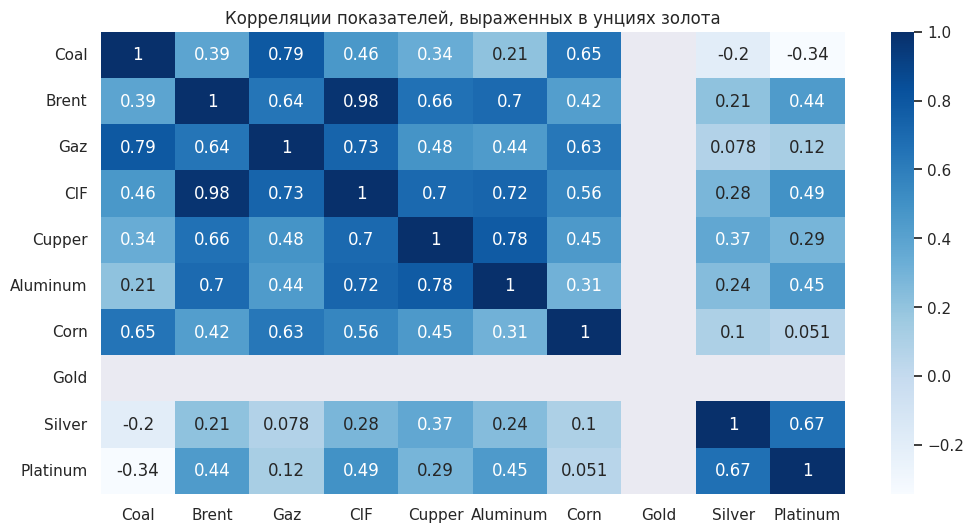

In [101]:
# граф корреляции средн мес знач выраж в унциях золота

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(corr_gold, cmap='Blues', annot=True).set_title('Корреляции показателей, выраженных в унциях золота')

Посмотрим как трасформировалась корреляция при переходы с долл. на унции золота. Заметно снижение:

Уголь - Газ         0,90    --> 0,79 

Золото - Серебро    0,85    --> ---

Уголь - Зерно       0,83    --> 0,65

Медь - Серебро      0,79    --> 0,37

Нефть - Алюминий    0,76    --> 0,70

Газ - Нефть         0,75    --> 0,64

Газ - Зерно         0,75    --> 0,63


А вот, что с платиной идет увеличение:

Платина - Серебро   0,36    --> 0,67

             Coal    Brent      Gaz  Aluminum
Coal      1.00000  0.39032  0.78733   0.20948
Brent     0.39032  1.00000  0.63813   0.69995
Gaz       0.78733  0.63813  1.00000   0.43907
Aluminum  0.20948  0.69995  0.43907   1.00000


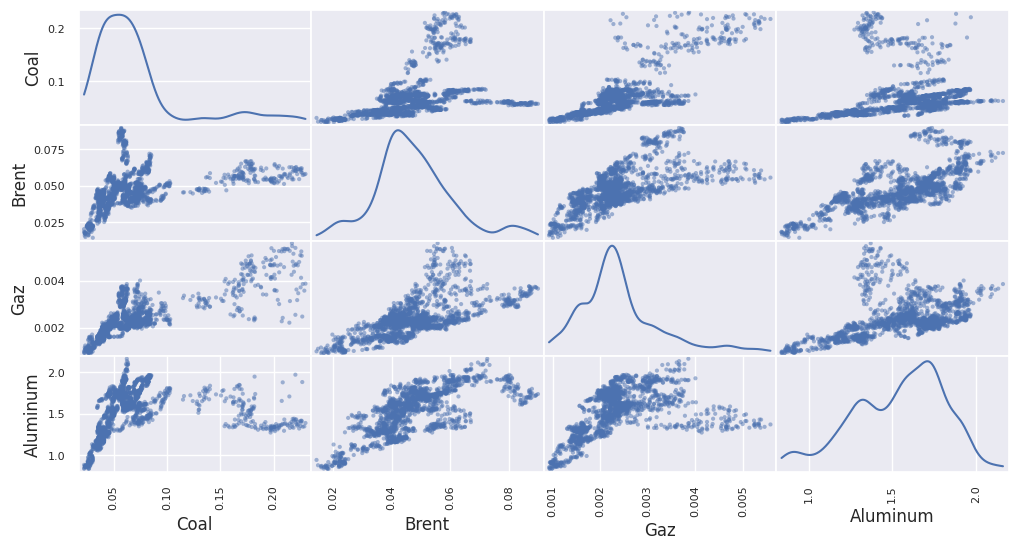

In [102]:
# Корреляция график scatter_matrix по отдельным временным рядам, выраженных в унциях золота

df1_gold = df_gold[["Coal", 'Brent', "Gaz", 'Aluminum']]

print(df1_gold.corr())
pd.plotting.scatter_matrix(df1_gold, diagonal='kde'); # , diagonal='kde'

In [208]:
# Временной ряд стоимости угля в унциях золота
coal_g = df_gold['Coal']

coal_g

Date
2014-05-06    0.05744
2014-05-07    0.05809
2014-05-08    0.05837
2014-05-09    0.05838
2014-05-12    0.05797
               ...   
2022-10-17    0.16264
2022-10-18    0.16170
2022-10-19    0.16406
2022-10-20    0.16556
2022-10-21    0.16339
Name: Coal, Length: 1841, dtype: float64

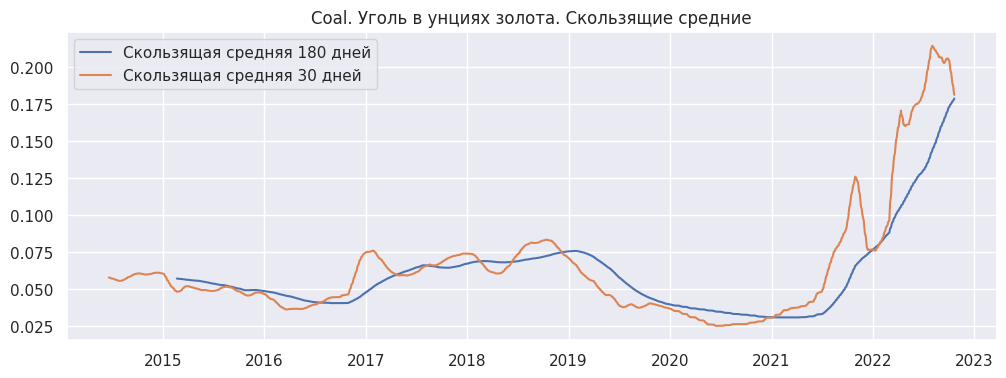

In [209]:
# Уголь в унциях золота
# Скользящие средние разных периодов в унциях золота

coal_g_rol180 = coal_g.rolling(180).mean()
coal_g_rol90 = coal_g.rolling(90).mean()
coal_g_rol30 = coal_g.rolling(30).mean()

# график скользящих средних
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(coal_g_rol180, label='Скользящая средняя 180 дней')
# plt.plot(coal_g_rol90, label='Скользащая средняя 90 дней')
plt.plot(coal_g_rol30, label='Скользящая средняя 30 дней')
plt.title('Coal. Уголь в унциях золота. Скользящие средние')
plt.legend()
plt.show()

In [220]:
# Уголь в унциях золота
# полосы Боллинджера с заданной даты

n = 30
date = '2020-01-01'

coal_g_d = coal_g[date:]
coal_g_ma = coal_g_d.rolling(window=n).mean()
coal_g_sd = coal_g_d.rolling(window=n).std()

coal_g_line1 = coal_g_ma + (2 * coal_g_sd)
coal_g_line2 = coal_g_ma - (2 * coal_g_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(coal_g_d, label='Биржевая котировка')
plt.plot(coal_g_line1, label='Верхняя полоса')
plt.plot(coal_g_line2, label='Нижняя полоса')
plt.title(f'Coal. Уголь в унциях золота. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

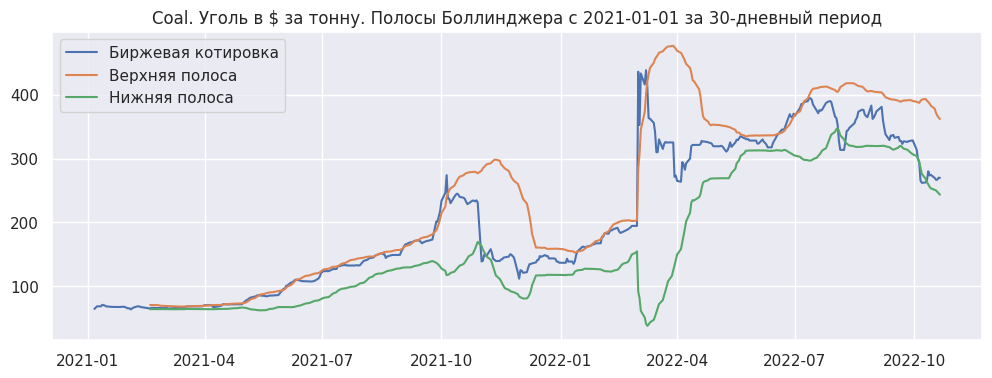

In [218]:
# Еще раз привожу для наглядности
# Уголь в $. Полосы Боллинджера с заданной даты

n = 30
date = '2021-01-01'

coal_d = coal[date:]
coal_ma = coal_d.rolling(window=n).mean()
coal_sd = coal_d.rolling(window=n).std()

coal_line1 = coal_ma + (2 * coal_sd)
coal_line2 = coal_ma - (2 * coal_sd)

# График
plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(coal_d, label='Биржевая котировка')
plt.plot(coal_line1, label='Верхняя полоса')
plt.plot(coal_line2, label='Нижняя полоса')
plt.title(f'Coal. Уголь в $ за тонну. Полосы Боллинджера c {date} за {n}-дневный период')
plt.legend()
plt.show()

In [103]:
# Нормализовываю знач в унциях золота

# series:
series_scaler_gold = scalerMMS.fit_transform(df_gold)

series_scaler_gold

# DataFrame с нормализованными данными:
df_gold_scaler = pd.DataFrame(series_scaler_gold, index=df_gold.index)

df_gold_scaler.columns = col

df_gold_scaler

Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                         
2014-05-06  0.16961  0.89430  0.58895  0.93262  0.75883   0.62116  0.80166   
2014-05-07  0.17271  0.92191  0.59116  0.95933  0.77119   0.62641  0.81453   
2014-05-08  0.17409  0.92202  0.56388  0.95760  0.79096   0.62334  0.82353   
2014-05-09  0.17412  0.92056  0.55710  0.95306  0.80131   0.60323  0.80226   
2014-05-12  0.17213  0.91876  0.53618  0.94757  0.82726   0.58426  0.77458   
...             ...      ...      ...      ...      ...       ...      ...   
2022-10-17  0.67592  0.54222  0.57871  0.64233  0.56522   0.39724  0.86962   
2022-10-18  0.67140  0.53299  0.54941  0.62651  0.55091   0.37697  0.87124   
2022-10-19  0.68272  0.56196  0.52195  0.63179  0.55019   0.38217  0.88380   
2022-10-20  0.68998  0.56019  0.50680  0.63063  0.58769   0.39920  0.89274   
2022-10-21  0.67950  0.55999  0.44628  0.62248  0.60063   0.38442  0.87613   

            Gold   Silver  Platinum  
Date                                 
2014-05-06   0.0  0.85407   0.91423  
2014-05-07   0.0  0.85356   0.91282  
2014-05-08   0.0  0.83423   0.91762  
2014-05-09   0.0  0.83261   0.90925  
2014-05-12   0.0  0.86359   0.91211  
...          ...      ...       ...  
2022-10-17   0.0  0.35776   0.17343  
2022-10-18   0.0  0.35672   0.17195  
2022-10-19   0.0  0.35730   0.16030  
2022-10-20   0.0  0.38132   0.19035  
2022-10-21   0.0  0.39314   0.20082  

[1841 rows x 10 columns]

In [104]:
# График шкалированных значения временных рядов изначально выраженных в унциях золота
df_gold_scaler.plot(figsize=(12, 6), grid=True, title='Шкалирование значения в унцииях золота');

На вышепредставленном графике характерно виднен общее падение до маинимальных значений в первой половине 2020 года - начало COVID-19.
Напоминю, что стоимость одной унции золота взлетела тогда до 1750$.

### 06. Перход к измерению в баррелях нефти
###### df_brent

[Ссылка на оглавление](######Start)

In [105]:
# Прересчет в баррели нефти

df_brent = pd.DataFrame()

for column in df.columns:
    df_brent[column] = df[column] / df['Brent']
    

df_brent

Coal  Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                       
2014-05-06  0.70194    1.0  0.04483  6.06202  0.02872  20.29470  4.79171   
2014-05-07  0.69222    1.0  0.04384  6.03163  0.02821  19.87423  4.71886   
2014-05-08  0.69558    1.0  0.04232  6.02323  0.02853  19.82368  4.75056   
2014-05-09  0.69654    1.0  0.04200  6.01075  0.02874  19.53147  4.68069   
2014-05-12  0.69274    1.0  0.04090  5.99576  0.02921  19.26252  4.58906   
...             ...    ...      ...      ...      ...       ...      ...   
2022-10-17  2.94150    1.0  0.06548  6.99323  0.03772  24.66437  7.46016   
2022-10-18  2.96179    1.0  0.06381  6.97323  0.03784  24.48628  7.56415   
2022-10-19  2.88930    1.0  0.05911  6.74007  0.03637  23.66627  7.33957   
2022-10-20  2.92271    1.0  0.05800  6.74821  0.03736  24.12048  7.40420   
2022-10-21  2.88503    1.0  0.05304  6.69572  0.03768  23.78075  7.31818   

                Gold   Silver  Platinum  
Date                                     
2014-05-06  12.22025  0.18306  13.61013  
2014-05-07  11.91714  0.17847  13.25997  
2014-05-08  11.91596  0.17673  13.30155  
2014-05-09  11.93160  0.17682  13.24405  
2014-05-12  11.95093  0.17987  13.29121  
...              ...      ...       ...  
2022-10-17  18.08557  0.20382  10.08513  
2022-10-18  18.31612  0.20628  10.19327  
2022-10-19  17.61173  0.19842   9.64722  
2022-10-20  17.65317  0.20206  10.06820  
2022-10-21  17.65775  0.20367  10.20963  

[1841 rows x 10 columns]

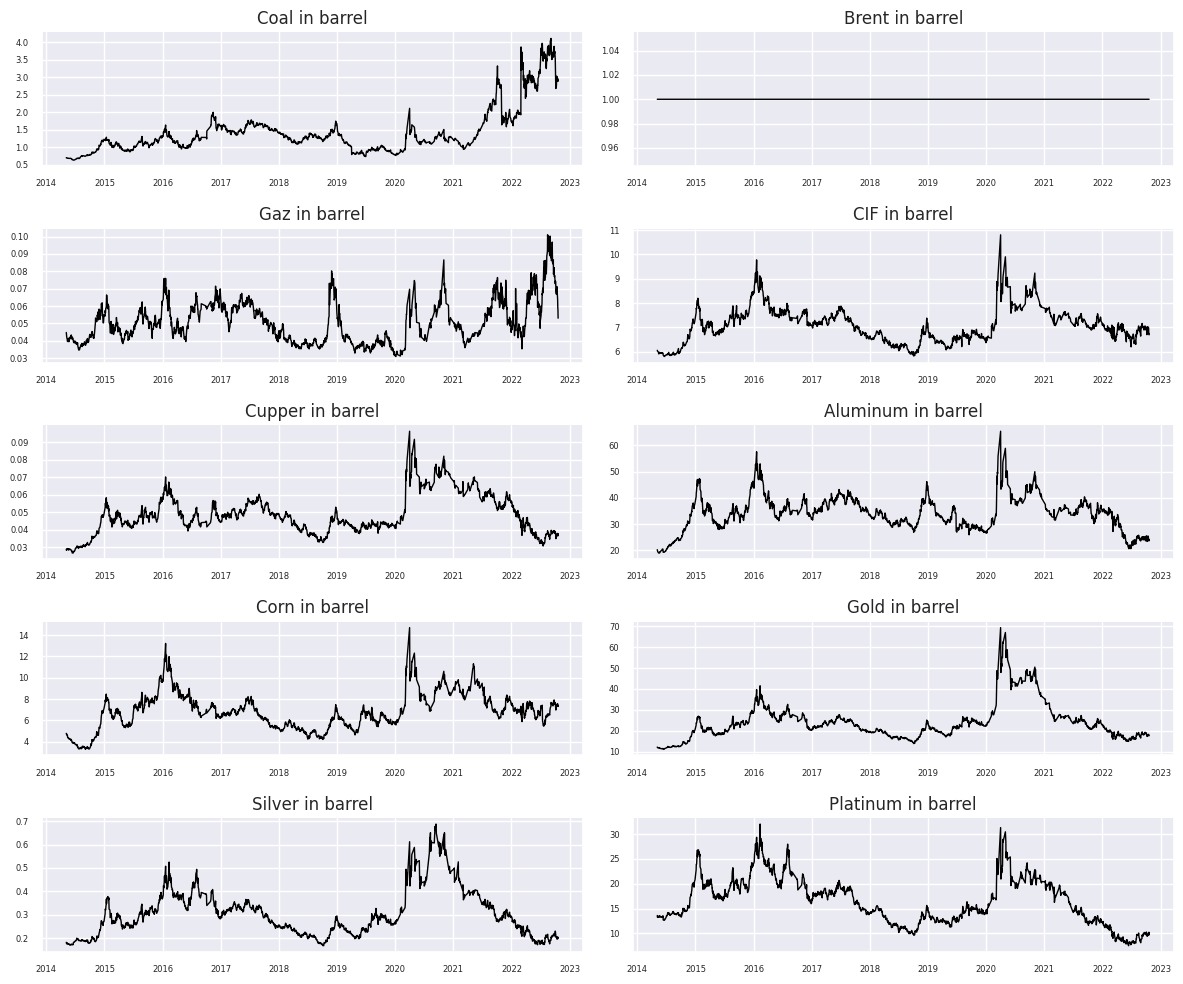

In [106]:
# графики стоимости выраженыех в баррелях нефти
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=100, figsize=(12,10)) 
for i, ax in enumerate(axes.flatten()):
    data_temp = df_brent[df_brent.columns[i]]
    ax.plot(data_temp, color='black', linewidth=1)
    # Decorations
    ax.set_title(df_brent.columns[i] + ' in barrel')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.grid(1)

plt.tight_layout();

#### 06.1 Корреляция временных рядов выраженная в баррелях нефти
###### corr_brent

[Ссылка на оглавление](######Start)

In [107]:
# Корреляция в показателях пересчитаных в баррели нефти.

corr_brent = df_brent.corr()
corr_brent

Coal  Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Coal      1.00000    NaN  0.70202  0.08970  0.00652  -0.09134  0.18155   
Brent         NaN    NaN      NaN      NaN      NaN       NaN      NaN   
Gaz       0.70202    NaN  1.00000  0.45804  0.25171   0.25329  0.40160   
CIF       0.08970    NaN  0.45804  1.00000  0.83898   0.81126  0.92093   
Cupper    0.00652    NaN  0.25171  0.83898  1.00000   0.83168  0.79040   
Aluminum -0.09134    NaN  0.25329  0.81126  0.83168   1.00000  0.69541   
Corn      0.18155    NaN  0.40160  0.92093  0.79040   0.69541  1.00000   
Gold     -0.08472    NaN  0.19859  0.85281  0.86059   0.74518  0.77882   
Silver   -0.13611    NaN  0.21605  0.87372  0.87082   0.74994  0.77440   
Platinum -0.40295    NaN  0.09028  0.79826  0.61963   0.71614  0.62529   

             Gold   Silver  Platinum  
Coal     -0.08472 -0.13611  -0.40295  
Brent         NaN      NaN       NaN  
Gaz       0.19859  0.21605   0.09028  
CIF       0.85281  0.87372   0.79826  
Cupper    0.86059  0.87082   0.61963  
Aluminum  0.74518  0.74994   0.71614  
Corn      0.77882  0.77440   0.62529  
Gold      1.00000  0.92644   0.70497  
Silver    0.92644  1.00000   0.79555  
Platinum  0.70497  0.79555   1.00000

In [108]:
# граф корреляции средн мес знач выраж в баррелях нефти.

sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(corr_brent, cmap='Blues', annot=True).set_title('Корреляции показателей, выраженных в баррелях нефти')

Text(0.5, 1.0, 'Корреляции показателей, выраженных в баррелях нефти')

К корреляции в долл., затем в золоте добавляем корреляцию в барелях:


Уголь - Газ         0,90    --> 0,79    --> 0,70 

Золото - Серебро    0,85    --> ---     --> 0,93

Уголь - Зерно       0,83    --> 0,65    --> 0,18

Медь - Серебро      0,79    --> 0,37    --> 0,78

Нефть - Алюминий    0,76    --> 0,70    --> ---

Газ - Нефть         0,75    --> 0,64    --> ---

Газ - Зерно         0,75    --> 0,63    --> 0,4


А вот, что с платиной:

Платина - Серебро   0,36    --> 0,67    --> 0,80

Интерпритацию данных значений оставлю на последующий анализ и осмысление, что бы не попасть в ловушку "ложных корреляций" и поверхностного подхода.

             Coal     Gold      Gaz  Aluminum
Coal      1.00000 -0.08472  0.70202  -0.09134
Gold     -0.08472  1.00000  0.19859   0.74518
Gaz       0.70202  0.19859  1.00000   0.25329
Aluminum -0.09134  0.74518  0.25329   1.00000


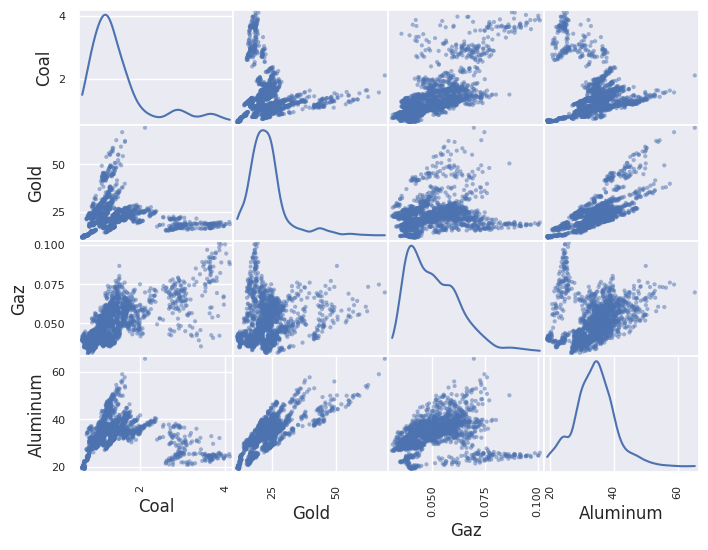

In [109]:
# Корреляция график scatter_matrix по отдельным временным рядам, выраженных в баррелях неефти.

df1_brent = df_brent[["Coal", 'Gold', "Gaz", 'Aluminum']]

print(df1_brent.corr())
pd.plotting.scatter_matrix(df1_brent, diagonal='kde'); # , diagonal='kde'

In [110]:
# Нормализовываю знач в баррелях неефти.

# series:
series_scaler_brent = scalerMMS.fit_transform(df_brent)

series_scaler_brent

# DataFrame с нормализованными данными:
df_brent_scaler = pd.DataFrame(series_scaler_brent, index=df_brent.index)

df_brent_scaler.columns = col

df_brent_scaler

Coal  Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                       
2014-05-06  0.02043    0.0  0.19762  0.05129  0.02913   0.02670  0.13098   
2014-05-07  0.01763    0.0  0.18350  0.04521  0.02179   0.01763  0.12459   
2014-05-08  0.01860    0.0  0.16182  0.04353  0.02638   0.01654  0.12737   
2014-05-09  0.01888    0.0  0.15724  0.04103  0.02935   0.01024  0.12125   
2014-05-12  0.01778    0.0  0.14159  0.03803  0.03612   0.00443  0.11322   
...             ...    ...      ...      ...      ...       ...      ...   
2022-10-17  0.66522    0.0  0.49245  0.23759  0.15832   0.12097  0.36483   
2022-10-18  0.67107    0.0  0.46868  0.23359  0.16007   0.11713  0.37395   
2022-10-19  0.65019    0.0  0.40150  0.18694  0.13892   0.09944  0.35427   
2022-10-20  0.65981    0.0  0.38570  0.18857  0.15316   0.10924  0.35993   
2022-10-21  0.64897    0.0  0.31486  0.17807  0.15779   0.10191  0.35239   

               Gold   Silver  Platinum  
Date                                    
2014-05-06  0.01863  0.02791   0.24854  
2014-05-07  0.01342  0.01907   0.23425  
2014-05-08  0.01340  0.01572   0.23594  
2014-05-09  0.01367  0.01589   0.23360  
2014-05-12  0.01400  0.02177   0.23552  
...             ...      ...       ...  
2022-10-17  0.11940  0.06793   0.10463  
2022-10-18  0.12336  0.07266   0.10904  
2022-10-19  0.11126  0.05752   0.08675  
2022-10-20  0.11197  0.06453   0.10393  
2022-10-21  0.11205  0.06763   0.10971  

[1841 rows x 10 columns]

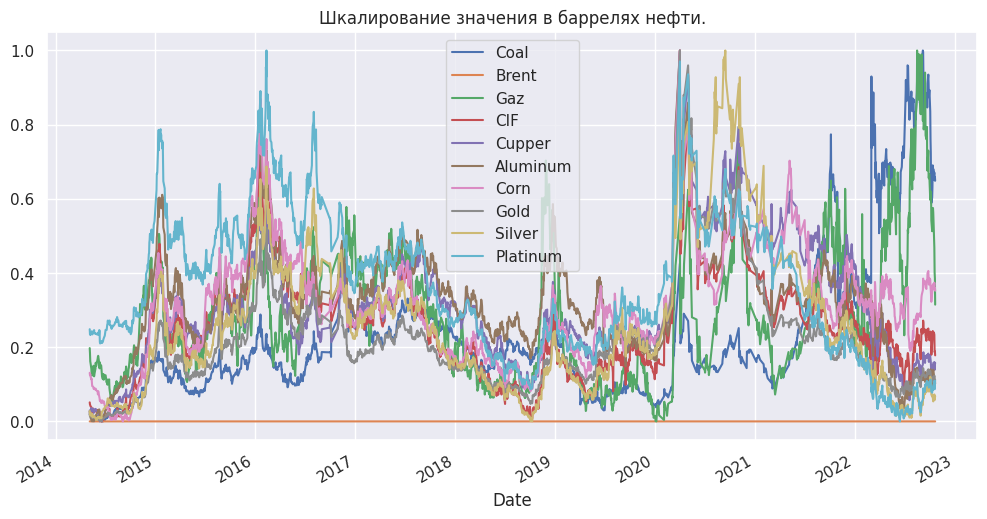

In [111]:
# График шкалированных значения временных рядов изначально выраженных в баррелях нефти.
df_brent_scaler.plot(figsize=(12, 6), grid=True, title='Шкалирование значения в баррелях нефти.');

В расчете на беррель нефти график выглядит противоположно в сравнении с графиком в унции золота. Как мы помним одномоментнтно с началом COVID-19 стоимсоть барреля нефти снижалась практически до нуля и, следовательно, стоимость биржевых товаров взлетает до максимальных значений.

### 07. Представление шкалированной стоимости угля в разных ед.измерения
###### df2

[Ссылка на оглавление](######Start)

Ниже представленный график шкалированнаной стоимость угля в разных ед.измерения необходимо интерпретировать.

На обсуждение: м.б. стоит это использовать для последующего прогнозирования.

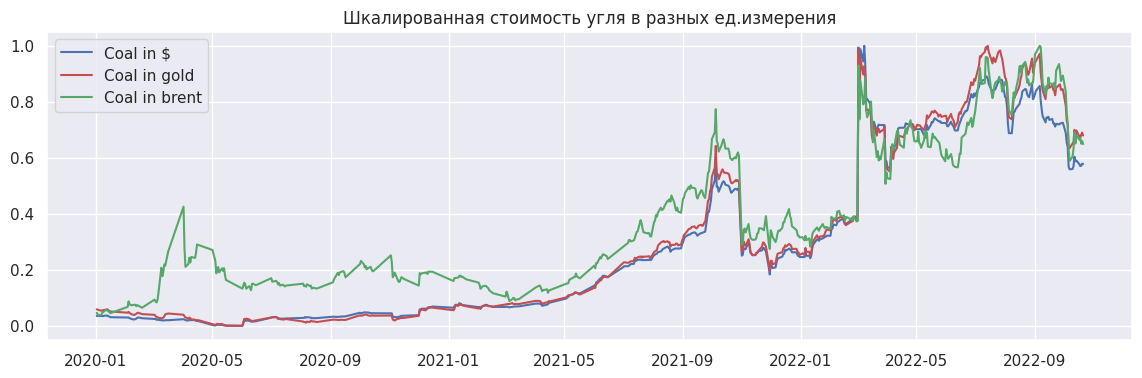

In [112]:
# График Шкалированнаной стоимость угля в разных ед.измерения
plt.figure(figsize=(14,4))
plt.plot(df_scaler['Coal']['2020-01-01':], label='Coal in $', color='b')
plt.plot(df_gold_scaler['Coal']['2020-01-01':], label='Coal in gold', color='r')
plt.plot(df_brent_scaler['Coal']['2020-01-01':], label='Coal in brent', color='g')
plt.title('Шкалированная стоимость угля в разных ед.измерения')
plt.legend()
plt.show()

Обратите внимание на два "всплеска": начало COVID-19, и февраль-март 2022 - начало СВО России. Скоордиированный "всплеск" в октябре 2021 пока не проанализирован.  

In [114]:
# Шкалированные графики
plt.figure(figsize=(10, 14))

plt.subplot(511)
df_gold_scaler['Coal'].plot(title='Coal in gold', c = 'y')

plt.subplot(512)
df_brent_scaler['Coal'].plot(title='Coal in brent', c = 'black')

plt.subplot(513)
df_scaler['Coal'].plot(title='Coal in $')

plt.subplot(514)
df_scaler['Gold'].plot(title='Gold in $')

plt.subplot(515)
df_scaler['Brent'].plot(title='Brent in $')


plt.show()

In [115]:
# dataframe со шкалированной стоимостью угля при разных ед изм.
df2 = pd.concat([df_scaler['Coal'], df_gold_scaler['Coal'], df_brent_scaler['Coal']], axis=1)

df2.columns = ['in_doll', 'in_gold', 'in_brent']

df2

in_doll  in_gold  in_brent
Date                                  
2014-05-06  0.09148  0.16961   0.02043
2014-05-07  0.09073  0.17271   0.01763
2014-05-08  0.09148  0.17409   0.01860
2014-05-09  0.09148  0.17412   0.01888
2014-05-12  0.09135  0.17213   0.01778
...             ...      ...       ...
2022-10-17  0.57763  0.67592   0.66522
2022-10-18  0.57050  0.67140   0.67107
2022-10-19  0.57138  0.68272   0.65019
2022-10-20  0.57888  0.68998   0.65981
2022-10-21  0.57826  0.67950   0.64897

[1841 rows x 3 columns]

#### 07.1 Корреляция стоимости угля выраженная в разных единицах измеренния
###### corr2

[Ссылка на оглавление](######Start)

In [116]:
# Корреляция стоимости угля выраженная в разных единицах измеренния

corr2 = df2.corr()
corr2

in_doll  in_gold  in_brent
in_doll   1.00000   0.9787   0.93153
in_gold   0.97870   1.0000   0.91800
in_brent  0.93153   0.9180   1.00000

Text(0.5, 1.0, 'Корреляция стоимости угля выраженная в разных единицах измеренния')

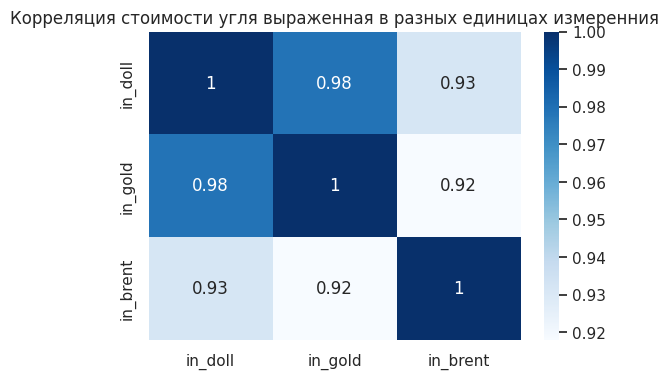

In [117]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.heatmap(corr2, cmap='Blues', annot=True).set_title('Корреляция стоимости угля выраженная в разных единицах измеренния')

In [118]:
# Вычисление логарифмического изменения шкалированных значений при разных ед.измерения стоимости угля
#  тожедумаю что надо убрать это 

rets2 = np.log(df2 / df2.shift(1))

rets2.dropna(inplace=True)

rets2

/home/sm360/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:352: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


in_doll  in_gold  in_brent
Date                                  
2014-05-07 -0.00824  0.01815  -0.14731
2014-05-08  0.00824  0.00797   0.05331
2014-05-09  0.00000  0.00013   0.01486
2014-05-12 -0.00137 -0.01147  -0.05974
2014-05-13  0.00000  0.00125  -0.08907
...             ...      ...       ...
2022-10-17 -0.02142 -0.03196  -0.02321
2022-10-18 -0.01242 -0.00671   0.00874
2022-10-19  0.00153  0.01671  -0.03160
2022-10-20  0.01305  0.01057   0.01469
2022-10-21 -0.00108 -0.01530  -0.01658

[1840 rows x 3 columns]

In [119]:
# Корреляция логарифм. изм. стоимости угля в разн. ед.измерения

print(rets2.corr())

sns.set(rc = {'figure.figsize':(6,3)})
sns.heatmap(rets2.corr(), cmap='Blues', annot=True).set_title('Корреляция логарифм. изм. стоимости угля в разн. ед.измерения')

          in_doll  in_gold  in_brent
in_doll   1.00000  0.74695   0.21160
in_gold   0.74695  1.00000   0.18621
in_brent  0.21160  0.18621   1.00000


Text(0.5, 1.0, 'Корреляция логарифм. изм. стоимости угля в разн. ед.измерения')

In [120]:
# Корреляция логарифм. изм. стоимости угля в разн. ед.измерения, вычисляемую в пределах временного окна
# пока не понимаю как интерпретировать данный график

# ax = rets2['in_doll'].rolling(window=90).corr(rets2['in_gold']).plot(figsize=(8, 4), title='Корр логарифм. изм. стоимости угля в долл и золоте')
# ax.axhline(rets2.corr().iloc[0, 1], c='r') # значение корр за весь период

# сложно интерпретируемый график

In [121]:
# ax = rets2['in_doll'].rolling(window=90).corr(rets2['in_brent']).plot(figsize=(8, 4), title='Корр логарифм. изм. стоимости угля в долл и нефти')
# ax.axhline(rets2.corr().iloc[0, 2], c='r') # значение корр за весь период

# сложно интерпретируемый график

In [122]:
# ax = rets2['in_gold'].rolling(window=90).corr(rets2['in_brent']).plot(figsize=(8, 4), title='Корр логарифм. изм. стоимости угля в золоте и нефти')
# ax.axhline(rets2.corr().iloc[1, 2], c='r') # значение корр за весь период

# сложно интерпретируемый график

In [123]:
# Для наглядности логаримм. изм. шкалиров.знач. стоимости угля в разн. ед.измер.
# rets2.plot(figsize=(8, 4), grid=True, title='логаримм. изм. шкалиров.знач. стоимости угля в разн. ед.измер.');

# пока отключил

In [124]:
# графики логарифмического изм шкалир знач
# fig, axes = plt.subplots(nrows=3, ncols=1, dpi=100, figsize=(8,6)) 
# for i, ax in enumerate(axes.flatten()):
#     data_temp = rets2[rets2.columns[i]]
#     ax.plot(data_temp, color='black', linewidth=0.2)
#     # Decorations
#     ax.set_title(rets2.columns[i] + ' логарим. изм. шкалиров.знач.')
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)
#     ax.grid(1)

# plt.tight_layout();

# пока отключил

## <b>Часть вторая</b>

### 08. Прогноз стоимости угля на основе statsmodels ARIMA
###### df3

На примере временого ряда стоимости угля в разн ед изм.



[Ссылка на оглавление](######Start)

In [125]:
# Для напоминания: Стоимость угля в $
df['Coal']

Date
2014-05-06     75.15000
2014-05-07     74.85000
2014-05-08     75.15000
2014-05-09     75.15000
2014-05-12     75.10000
                ...    
2022-10-17    269.50000
2022-10-18    266.64999
2022-10-19    267.00000
2022-10-20    270.00000
2022-10-21    269.75000
Name: Coal, Length: 1841, dtype: float64

In [144]:
# делаю прореживание данных на среднемесячные значения
# Считаю, что нужно работать не с дневными значениями, т.к. корреляция с предыдущим днем почти равна ед.

df_month = df.resample('M').mean()

# и сразу делаю для дня
df_day = df.resample('D').mean()

df_month




In [127]:
# Графики автокорреляции и частичной автокорреляции стоимости угля в $

plt.figure(figsize=(8, 4))
plt.subplot(211)
plot_acf(df_month['Coal'], lags=20, ax=plt.gca())

plt.subplot(212)
plot_pacf(df_month['Coal'], method='ywmle', lags=20, ax=plt.gca())

plt.show()

In [128]:
# dataframe со шкалированной стоимостью угля при разных ед изм.

df2

in_doll  in_gold  in_brent
Date                                  
2014-05-06  0.09148  0.16961   0.02043
2014-05-07  0.09073  0.17271   0.01763
2014-05-08  0.09148  0.17409   0.01860
2014-05-09  0.09148  0.17412   0.01888
2014-05-12  0.09135  0.17213   0.01778
...             ...      ...       ...
2022-10-17  0.57763  0.67592   0.66522
2022-10-18  0.57050  0.67140   0.67107
2022-10-19  0.57138  0.68272   0.65019
2022-10-20  0.57888  0.68998   0.65981
2022-10-21  0.57826  0.67950   0.64897

[1841 rows x 3 columns]

In [129]:
# делаю прореживание шкалированных данных и перехожу к среднемесячным значениям

df3 = df2.resample('M').mean()


df3

in_doll  in_gold  in_brent
Date                                  
2014-05-31  0.09119  0.17407   0.01579
2014-06-30  0.08516  0.16494   0.00468
2014-07-31  0.08607  0.16110   0.01338
2014-08-31  0.09649  0.17979   0.03374
2014-09-30  0.09193  0.18708   0.03938
...             ...      ...       ...
2022-06-30  0.74822  0.77944   0.64637
2022-07-31  0.86378  0.96149   0.87538
2022-08-31  0.79203  0.86379   0.86477
2022-09-30  0.75128  0.86469   0.89902
2022-10-31  0.59302  0.68648   0.67254

[102 rows x 3 columns]

### 08.1 Графики автокорреляции и частичной автокорреляции шкалированной стоимости угля
###### acf


[Ссылка на оглавление](######Start)

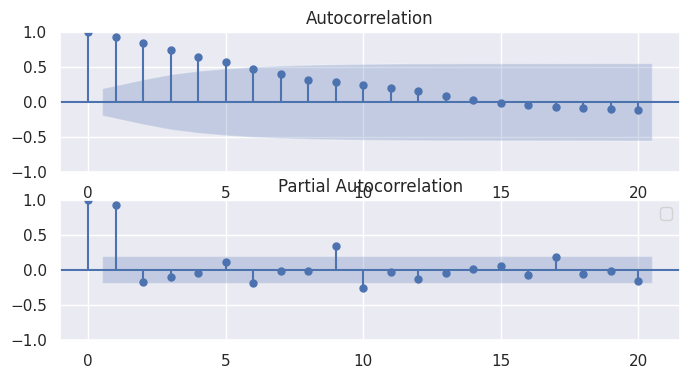

In [130]:
# Графики автокорреляции и частичной автокорреляции шкалированной стоимости угля в $

plt.figure(figsize=(8, 4))
plt.subplot(211)
plot_acf(df3['in_doll'], lags=20, ax=plt.gca())

plt.subplot(212)
plot_pacf(df3['in_doll'], method='ywmle', lags=20, ax=plt.gca())
plt.legend('')
plt.show()

In [131]:
# Графики автокорреляции и частичной автокорреляции шкалированной стоимости угля в золоте

plt.figure(figsize=(8, 4))
plt.subplot(211)
plot_acf(df3['in_gold'], lags=20, ax=plt.gca())

plt.subplot(212)
plot_pacf(df3['in_gold'], method='ywmle', lags=20, ax=plt.gca())

plt.show()

In [132]:
# Графики автокорреляции и частичной автокорреляции шкалированной стоимости угля в нефти

plt.figure(figsize=(8, 4))
plt.subplot(211)
plot_acf(df3['in_brent'], lags=20, ax=plt.gca())

plt.subplot(212)
plot_pacf(df3['in_brent'], method='ywmle', lags=20, ax=plt.gca())

plt.show()

In [133]:
# df_month

In [134]:
# df только по мес знач стоимости угля

df_month_coal = df_month['Coal']

df_month_coal

Date
2014-05-31     75.03611
2014-06-30     72.62333
2014-07-31     72.98722
2014-08-31     77.15263
2014-09-30     75.33150
                ...    
2022-06-30    337.69714
2022-07-31    383.89250
2022-08-31    355.21087
2022-09-30    338.91905
2022-10-31    275.65333
Freq: M, Name: Coal, Length: 102, dtype: float64

### 08.2 Графики компоненты: тренд, сезонность и шум
###### sm.tsa.seasonal_decompose

Данные графики представлены только для информации, но, на мой взляд, не несут существенного влияния на анализ временного ряда стоимости угля.

[Ссылка на оглавление](######Start)

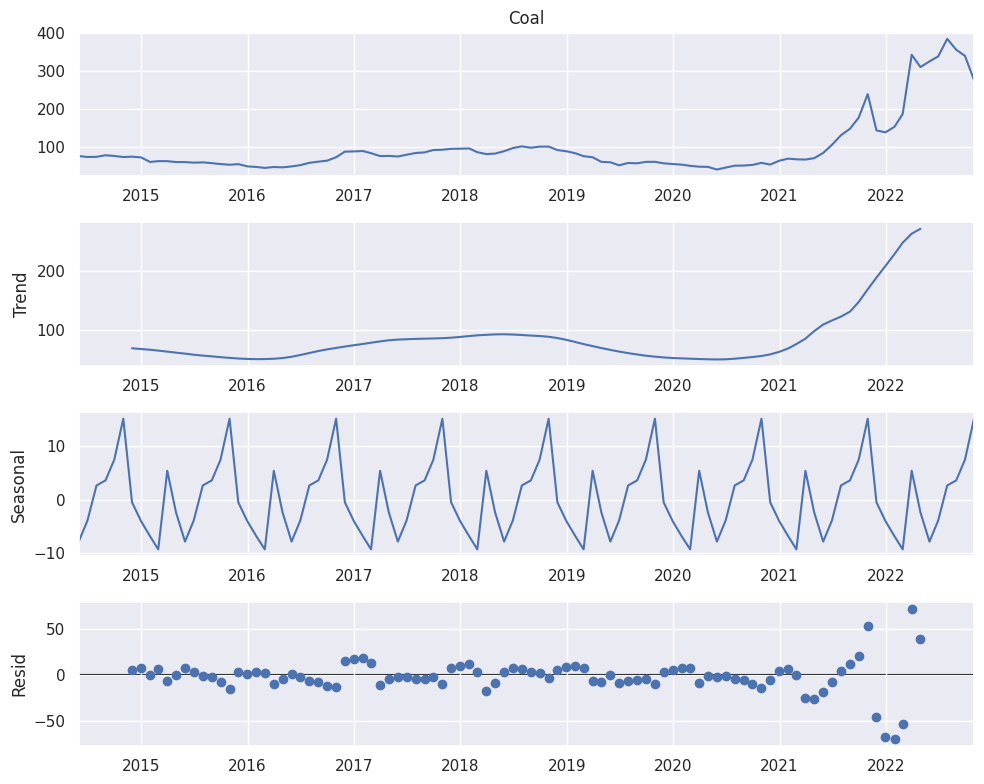

In [135]:
# Вычисляю компоненты: тренд, сезонность и шум

rcParams['figure.figsize'] = 10, 8
# decomposition = sm.tsa.seasonal_decompose(df_month_coal, model='additive')
decomposition = sm.tsa.seasonal_decompose(df_month['Coal'], model='additive')

fig = decomposition.plot()
plt.show()

### 08.3 Подбор параметров для модели временных рядов ARIMA (sm) для прогнозирования стоимости угля в $
###### sm.tsa.statespace.SARIMAX

Пока отключил.


[Ссылка на оглавление](######Start)

In [127]:


# p = d = q = range(0, 2)
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# print('Examples of parameter combinations for Seasonal ARIMA...')
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
# print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
# print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
# ###
# print('SARIMAX: {} x {}'.format(pdq[4], seasonal_pdq[4]))

In [128]:
# анализ вышепредст формул

# print('p :', p)
# print('d :', d)
# print('q :', q)
# print('pdq :', pdq)
# print('-----')
# print('seasonal_pdq :', seasonal_pdq)
# print('--------')

In [129]:
# Этот шаг - выбор параметров для модели временных рядов ARIMA для стоимости угля. 
# Наша цель здесь - использовать “поиск по сетке”, чтобы найти оптимальный набор параметров, 
# который обеспечивает наилучшую производительность для нашей модели.

# warnings.filterwarnings("ignore") # specify to ignore warning messages

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(df_month_coal,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
            
#             results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
#         except:
#             continue

In [130]:
# вот что оптимально подобрало:
# CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:645.3988654229423

# 2022-10-18:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:645.5164241222554

# 2022-10-18:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:713.4371806842479

# 2022-10-20:
# ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:713.6904954608558

### 08.4 Обучение модели временных рядов statsmodels ARIMA для стоимости угля в $
###### mod.fit


[Ссылка на оглавление](######Start)

In [136]:
# Fitting the ARIMA model
# order and seasonal_order не подбираются, а указываются ниже

mod = sm.tsa.statespace.SARIMAX(df_month_coal,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
# print(results.summary())
print('--------')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50526D+00    |proj g|=  1.62489D-01

At iterate    5    f=  3.45541D+00    |proj g|=  1.92436D-02

At iterate   10    f=  3.45313D+00    |proj g|=  7.00927D-03

At iterate   15    f=  3.45218D+00    |proj g|=  5.30993D-03

At iterate   20    f=  3.45035D+00    |proj g|=  9.94983D-03


 This problem is unconstrained.



At iterate   25    f=  3.45009D+00    |proj g|=  1.44080D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     34      1     0     0   2.198D-06   3.450D+00
  F =   3.4500948959711311     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7571      0.744      1.018      0.309      -0.701       2.215
ma.L1         -0.6971      0.809     -0.862      0.389      -2.283       0.889
ar.S.L12      -1.0743      0.910     -1.180  

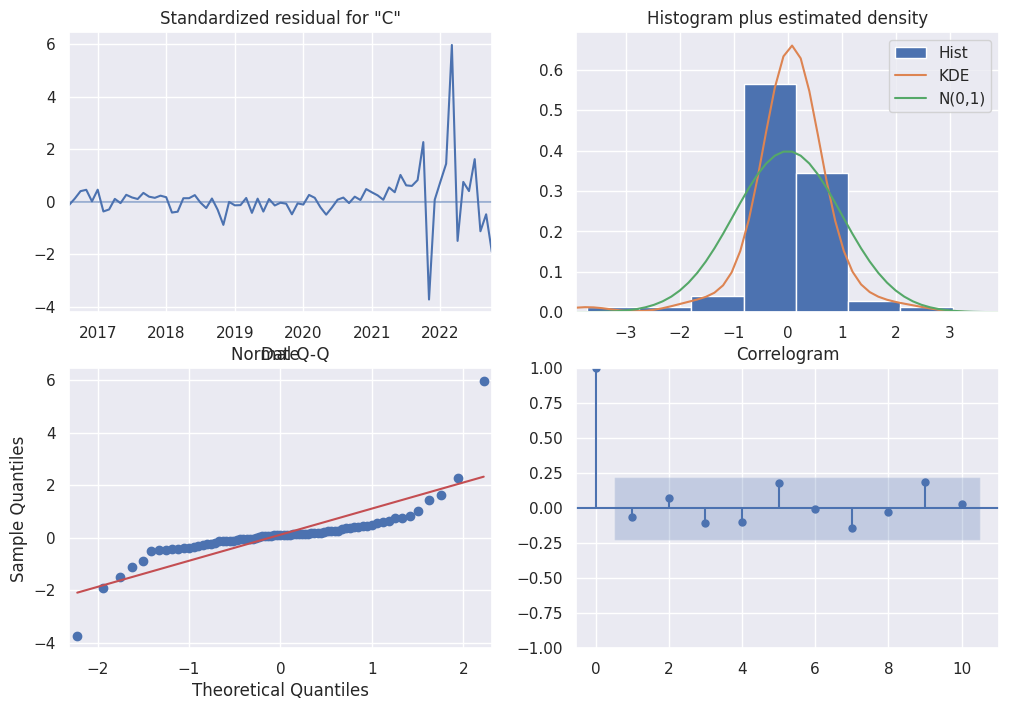

In [137]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

In [138]:
# последние фактические значения

df_month_coal.tail(10)

Date
2022-01-31    152.33200
2022-02-28    185.79210
2022-03-31    341.98478
2022-04-30    309.64250
2022-05-31    324.42953
2022-06-30    337.69714
2022-07-31    383.89250
2022-08-31    355.21087
2022-09-30    338.91905
2022-10-31    275.65333
Freq: M, Name: Coal, dtype: float64

In [139]:
# прогноз на steps наблюдений вперед с доверительным интервалом 95%
df_coal_forecast = results.forecast(steps=10, alpha=0.05)

df_coal_forecast

2022-11-30    299.09362
2022-12-31    308.84336
2023-01-31    307.75103
2023-02-28    292.71095
2023-03-31    239.63384
2023-04-30    252.55358
2023-05-31    259.27064
2023-06-30    276.83520
2023-07-31    288.32200
2023-08-31    314.58542
Freq: M, Name: predicted_mean, dtype: float64

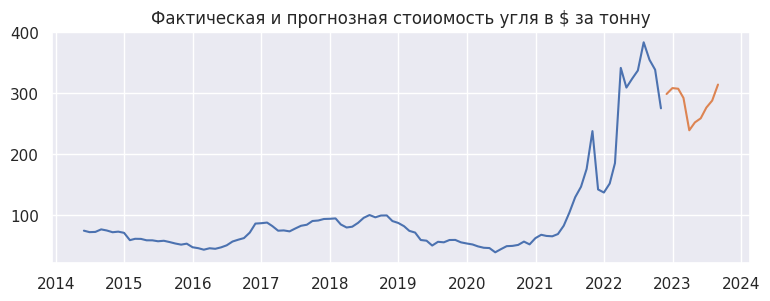

In [140]:
### соед графики

plt.figure(figsize=(9, 3))
plt.plot(df_month_coal, label='Факт')
plt.plot(df_coal_forecast, label='Прогноз')
plt.title('Фактическая и прогнозная стоиомость угля в $ за тонну')
plt.show()

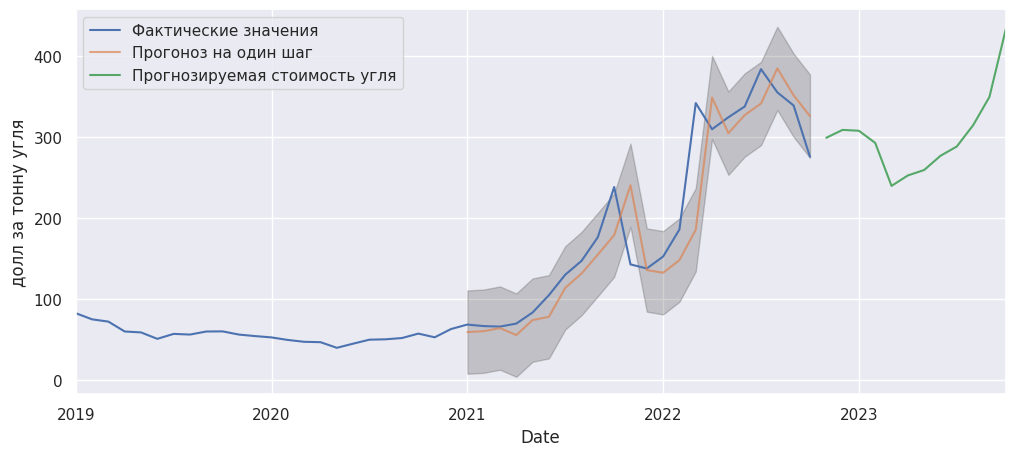

In [141]:
forecast = results.forecast(steps=12, alpha=0.05)

pred = results.get_prediction(start=pd.to_datetime('2021-01-31'), dynamic=False)
pred_ci = pred.conf_int()

plt.figure(figsize=(12, 4))
ax = df_month_coal['2019':].plot(label='Фактические значения')
pred.predicted_mean.plot(ax=ax, label='Прогоноз на один шаг', alpha=.7, figsize=(12, 5)) #  alpha=.7
forecast.plot(ax=ax, label='Прогнозируемая стоимость угля')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('долл за тонну угля')
plt.legend()

plt.show()

### 09 Построение прогнозов стоимости угля на основании использования библиотеки SKTIME
###### sktime


[Ссылка на оглавление](######Start)

#### 09.1 Метод прогнозирования SKTIME ARIMA

###### sktime.arima

In [163]:
# Прогнозирование с использованием sktime ARIMA

In [164]:
# Расчет прогноза по самому временному ряду стоимости угля
y = df_month['Coal'] # месячные данные

# y = df_day['Coal'] # ежедневные данные

y

Date
2014-05-31     75.03611
2014-06-30     72.62333
2014-07-31     72.98722
2014-08-31     77.15263
2014-09-30     75.33150
                ...    
2022-06-30    337.69714
2022-07-31    383.89250
2022-08-31    355.21087
2022-09-30    338.91905
2022-10-31    275.65333
Freq: M, Name: Coal, Length: 102, dtype: float64

In [165]:
# задание периодов прогноза

fh = np.arange(1, 10)

fh

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [166]:

forecaster = ARIMA()

# или так можно задать:
# forecaster.fit(y, fh=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

forecaster.fit(y, fh=fh)

y_pred_ARIMA = forecaster.predict()

y_pred_ARIMA

/home/sm360/.local/lib/python3.10/site-packages/sktime/datatypes/_series/_check.py:148: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/sm360/.local/lib/python3.10/site-packages/sktime/datatypes/_series/_check.py:148: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


2022-11-30    270.82694
2022-12-31    266.15609
2023-01-31    261.63577
2023-02-28    257.26113
2023-03-31    253.02747
2023-04-30    248.93025
2023-05-31    244.96507
2023-06-30    241.12768
2023-07-31    237.41396
dtype: float64

In [167]:
plot_series(y['2021-01-01':], y_pred_ARIMA, labels=["Факт", "Прогноз sktime ARIMA"])

/home/sm360/.local/lib/python3.10/site-packages/sktime/utils/validation/series.py:217: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


(<Figure size 1600x400 with 1 Axes>, <AxesSubplot: ylabel='Coal'>)

In [168]:
# forecaster.forecasters_

In [169]:
# вероятностный прогноз
coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

Coverage           
                  0.9           
                lower      upper
2022-11-30  233.84798  307.80590
2022-12-31  214.69572  317.61646
2023-01-31  199.60613  323.66542
2023-02-28  186.75499  327.76727
2023-03-31  175.41747  330.63746
2023-04-30  165.21179  332.64871
2023-05-31  155.90467  334.02547
2023-06-30  147.33962  334.91573
2023-07-31  139.40466  335.42326

In [170]:
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.plot(y_pred_ARIMA)
plt.plot(y_pred_ints)
plt.show()



In [171]:
# или так:
y_pred_ints_1 = forecaster.predict_interval(coverage=0.95)
y_pred_ints_1

Coverage           
                 0.95           
                lower      upper
2022-11-30  226.76379  314.89009
2022-12-31  204.83728  327.47490
2023-01-31  187.72289  335.54865
2023-02-28  173.24788  341.27438
2023-03-31  160.54945  345.50548
2023-04-30  149.17355  348.68695
2023-05-31  138.84305  351.08709
2023-06-30  129.37232  352.88304
2023-07-31  120.62867  354.19924

predict_quantiles - квантильные прогнозы
sktime предлагает predict_quantiles в качестве унифицированного интерфейса для возврата квантильных значений прогнозов. Аналогично predict_interval.

predict_quantiles имеет аргумент alpha, содержащий запрашиваемые значения квантилей. Подобно случаю с predict_interval, alpha может быть значением с плавающей точкой или списком значений с плавающей точкой.

In [172]:
y_pred_quantiles = forecaster.predict_quantiles(alpha=[0.275, 0.975])
y_pred_quantiles

Quantiles           
                0.275      0.975
2022-11-30  257.38833  314.89009
2022-12-31  247.45476  327.47490
2023-01-31  239.09343  335.54865
2023-02-28  231.63833  341.27438
2023-03-31  224.82304  345.50548
2023-04-30  218.50592  348.68695
2023-05-31  212.59942  351.08709
2023-06-30  207.04394  352.88304
2023-07-31  201.79617  354.19924

In [173]:
# predict_var выдает предсказания дисперсии:
y_pred_var = forecaster.predict_var()
y_pred_var

0
2022-11-30   505.42291
2022-12-31   978.79392
2023-01-31  1422.14563
2023-02-28  1837.38175
2023-03-31  2226.28525
2023-04-30  2590.52606
2023-05-31  2931.66816
2023-06-30  3251.17640
2023-07-31  3550.42271

In [174]:
# predict_proba - прогнозы распределения
y_pred_proba = forecaster.predict_proba()
y_pred_proba

2022-10-22 12:03:32.311998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-22 12:03:32.420119: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-22 12:03:32.420137: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-22 12:03:32.441104: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-22 12:03:33.126930: W tensorflow/stream_executor/platform/de

<tfp.distributions.Normal 'Normal' batch_shape=[9, 1] event_shape=[] dtype=float32>

In [175]:
# ARIMA 
fh = [1, 2, 3]

forecaster = ARIMA()
forecaster.fit(y, fh=fh)
forecaster.predict()

/home/sm360/.local/lib/python3.10/site-packages/sktime/datatypes/_series/_check.py:148: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


2022-11-30    270.82694
2022-12-31    266.15609
2023-01-31    261.63577
dtype: float64

In [176]:
# forecaster.predict().plot()

#### 09.2 Метод прогнозирования VAR

###### sktime.var

In [197]:
# Напоминание:
# df со средн мес знач в долл.
df_month

# df со средн мес знач в золоте.
df_gold_month

# df со средн мес знач в нефти.
df_brent_month

Coal      Gaz      CIF   Cupper  Aluminum     Corn      Gold  \
Date                                                                          
2014-05-31  0.68583  0.04122  5.97106  0.02873  19.48843  4.45037  11.75212   
2014-06-30  0.64722  0.04086  5.87480  0.02756  19.80876  3.96868  11.46300   
2014-07-31  0.67744  0.03717  5.89637  0.02994  21.55977  3.54254  12.16900   
2014-08-31  0.74818  0.03790  5.90287  0.03056  23.14056  3.48884  12.56307   
2014-09-30  0.76777  0.03999  5.99317  0.03149  24.24505  3.40729  12.57128   
...             ...      ...      ...      ...       ...      ...       ...   
2022-06-30  2.87602  0.06441  6.61370  0.03504  21.78944  6.45128  15.60588   
2022-07-31  3.67142  0.06862  6.50910  0.03245  22.94391  6.34383  16.53495   
2022-08-31  3.63458  0.08987  6.85247  0.03701  24.67801  6.46763  18.04975   
2022-09-30  3.75353  0.08576  7.00890  0.03854  24.58549  7.55082  18.59394   
2022-10-31  2.96691  0.06746  6.90070  0.03720  24.52718  7.37701  17.98184   

             Silver  Platinum  
Date                           
2014-05-31  0.17626  13.35791  
2014-06-30  0.17839  13.02748  
2014-07-31  0.19397  13.85626  
2014-08-31  0.19035  14.03430  
2014-09-30  0.18615  13.82978  
...             ...       ...  
2022-06-30  0.18276   8.09732  
2022-07-31  0.18088   8.23807  
2022-08-31  0.20070   9.20980  
2022-09-30  0.20815   9.68983  
2022-10-31  0.20850   9.87838  

[102 rows x 9 columns]

In [198]:
# по части временных рядов средн за месяц
# y = df_month[['Coal', 'Brent', 'Gold']]

# по всем временым рядам средн за месяц
# y = df_month

# по рядам средн ежедн значения при прогнозе выдает ошибку ValueError: Must supply freq for datetime value

###
# Тестирую прогноз. Для этого для теста оставляю три-четыре-пять последних месяцев

y = df_month[:'2022-01-31']


y

Coal      Brent      Gaz        CIF   Cupper    Aluminum  \
Date                                                                        
2014-05-31   75.03611  109.41889  4.50928  653.30944  3.14394  2132.18056   
2014-06-30   72.62333  112.26222  4.58456  659.40000  3.09353  2222.88889   
2014-07-31   72.98722  107.75722  4.00583  635.34612  3.22617  2322.70833   
2014-08-31   77.15263  103.13053  3.90816  608.75631  3.15092  2386.17105   
2014-09-30   75.33150   98.14950  3.92230  588.15700  3.08983  2379.60000   
...               ...        ...      ...        ...      ...         ...   
2021-09-30  176.31905   75.00286  5.11486  538.97714  4.26538  2887.71429   
2021-10-31  238.26905   83.74619  5.57062  584.33001  4.45112  2984.16667   
2021-11-30  142.62619   80.78429  5.12024  573.82238  4.36574  2629.42857   
2021-12-31  137.59545   74.80773  3.86382  545.86864  4.33300  2660.15909   
2022-01-31  152.33200   85.52700  4.25545  597.51601  4.43112  2978.57500   

                 Corn        Gold    Silver    Platinum  
Date                                                     
2014-05-31  486.79167  1285.75556  19.28494  1461.60555  
2014-06-30  445.29167  1286.80555  20.03300  1461.93889  
2014-07-31  381.80556  1311.15000  20.89944  1492.92222  
2014-08-31  359.73684  1295.52106  19.63042  1447.34209  
2014-09-30  334.37500  1233.70000  18.27305  1357.44500  
...               ...         ...       ...         ...  
2021-09-30  518.59524  1775.90000  23.17862   965.89048  
2021-10-31  536.61905  1776.40475  23.40990  1019.30475  
2021-11-30  570.89286  1819.49999  24.18610  1032.67142  
2021-12-31  591.88636  1791.04544  22.48655   942.48636  
2022-01-31  609.37500  1816.64000  23.18350   994.82000  

[93 rows x 10 columns]

In [199]:
# для теста

y_test = df_month['2022-02-28':]
y_test

Coal      Brent      Gaz        CIF   Cupper    Aluminum  \
Date                                                                        
2022-02-28  185.79210   94.14579  4.46300  647.48579  4.50211  3267.15789   
2022-03-31  341.98478  112.28391  4.97930  750.58914  4.68228  3490.17391   
2022-04-30  309.64250  106.08100  6.70460  741.09999  4.63762  3235.48750   
2022-05-31  324.42953  111.58190  8.16348  765.75476  4.24929  2848.00000   
2022-06-30  337.69714  117.66381  7.59790  778.41048  4.12540  2564.14286   
2022-07-31  383.89250  104.70500  7.18695  681.20600  3.39610  2400.58750   
2022-08-31  355.21087   97.74087  8.77948  669.55043  3.61500  2410.64130   
2022-09-30  338.91905   90.32476  7.75752  633.06047  3.48021  2220.14286   
2022-10-31  275.65333   93.02933  6.27600  641.83800  3.45910  2280.96667   

                 Corn        Gold    Silver    Platinum  
Date                                                     
2022-02-28  650.36842  1857.74209  23.53726  1045.27895  
2022-03-31  747.42391  1950.67390  25.43452  1046.90869  
2022-04-30  786.06250  1933.93000  24.63450   959.05500  
2022-05-31  789.01190  1845.93810  21.82786   950.11429  
2022-06-30  758.40476  1834.54762  21.48924   952.54286  
2022-07-31  663.15000  1729.80000  18.92665   862.06000  
2022-08-31  632.07609  1762.47826  19.59222   898.92609  
2022-09-30  681.65476  1678.61429  18.78757   874.64286  
2022-10-31  685.95000  1672.06000  19.38973   918.50667

In [200]:
# Прогноз VAR на основе фактических значений
# горизонт планирования периодов
fh=[1, 2, 3, 4, 5, 6] 


forecaster = VAR()
forecaster.fit(y, fh=fh)

y_pred = forecaster.predict()

/home/sm360/.local/lib/python3.10/site-packages/sktime/datatypes/_series/_check.py:91: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/sm360/.local/lib/python3.10/site-packages/sktime/datatypes/_series/_check.py:91: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


In [201]:
# Прогноз
y_pred

Coal     Brent      Gaz        CIF   Cupper    Aluminum  \
2022-02-28  163.34316  86.72146  4.55173  597.46893  4.39899  3017.34317   
2022-03-31  167.32575  87.99113  4.75576  599.39496  4.39440  3022.42239   
2022-04-30  167.82977  88.92283  4.85981  601.04490  4.40529  3019.20429   
2022-05-31  166.81536  89.53975  4.89441  602.16694  4.42446  3016.82735   
2022-06-30  165.31416  89.96100  4.88986  603.02593  4.44803  3017.67456   
2022-07-31  163.83176  90.29342  4.86747  603.91369  4.47402  3021.63948   

                 Corn        Gold    Silver    Platinum  
2022-02-28  599.13977  1820.64470  22.87895   995.29276  
2022-03-31  586.17244  1830.06534  22.74598   993.58107  
2022-04-30  574.00522  1842.77242  22.73504   993.67482  
2022-05-31  564.29377  1856.96885  22.79742   995.58053  
2022-06-30  557.47137  1871.60050  22.89958   998.47121  
2022-07-31  553.32750  1886.19787  23.02205  1001.62914

In [202]:
# На пямять 
# 2022-10-20. по  трем рядам:
# # 	            Coal	Brent	    Gold
# 2022-11-30	272.69291	92.47655	1657.37476
# 2022-12-31	268.61807	91.83263	1638.34772
# 2023-01-31	264.33294	91.11984	1619.81774
# 2023-02-28	259.85443	90.34627	1601.82585
# 2023-03-31	255.20074	89.51960	1584.40906
# 2023-04-30	250.39104	88.64712	1567.60040

# 2022-10-20. по всем рядам:

#               Coal	    Brent	    Gaz	    CIF	        Cupper	Aluminum	Corn	    Gold	    Silver	    Platinum
# 2022-11-30	278.51078	90.10824	6.40390	624.15856	3.27129	2181.16557	656.45960	1660.02055	19.14351	915.76721
# 2022-12-31	271.28798	86.40798	6.37083	601.70529	3.11549	2066.02885	627.73800	1640.13558	18.86319	913.74078
# 2023-01-31	259.15069	82.21828	6.24090	576.98579	2.97697	1956.76288	599.28537	1617.74671	18.62519	913.76021
# 2023-02-28	243.81680	77.75496	6.02632	550.89029	2.85350	1857.24931	571.35782	1594.08351	18.43345	915.94197
# 2023-03-31	226.42440	73.19799	5.75186	524.34476	2.74478	1769.26398	544.35809	1570.15620	18.28941	919.80213
# 2023-04-30	207.86491	68.69625	5.43931	498.15033	2.65100	1693.74029	518.67043	1546.70298	18.19155	924.87450


# 2022-10-21. по всем рядам без отсечения на тестовую выборку:
#               Coal	    Brent	    Gaz	    CIF	        Cupper	Aluminum	Corn	    Gold	    Silver	    Platinum
# 2022-07-31	307.44137	114.74799	7.82053	758.71164	3.85559	2254.91821	702.50093	1813.47498	20.92268	942.19779
# 2022-08-31	278.81280	110.27231	7.60795	728.33979	3.58198	2009.22623	639.56431	1790.63340	20.49512	957.52200
# 2022-09-30	248.94660	104.57395	7.21645	691.40563	3.31647	1803.88100	576.70388	1765.25897	20.17657	980.85513
# 2022-10-31	218.44355	98.03869	6.73613	650.67459	3.06963	1634.33081	517.41405	1737.72017	19.95271	1006.65095
# 2022-11-30	188.41017	91.03224	6.21265	608.34566	2.84944	1499.16640	463.75300	1708.61837	19.81099	1032.48175
# 2022-12-31	159.82434	83.87881	5.67616	566.22282	2.66125	1396.93392	416.95419	1678.57537	19.73826	1056.92893

In [203]:
# сравниваю прогноз с фактическими данными
coal_fact = y_test['Coal']

coal_pred = y_pred['Coal']
coal_pred

2022-02-28    163.34316
2022-03-31    167.32575
2022-04-30    167.82977
2022-05-31    166.81536
2022-06-30    165.31416
2022-07-31    163.83176
Name: Coal, dtype: float64

In [204]:
# df сравнения
coal_comparision = pd.concat([coal_fact, coal_pred], axis=1)
coal_comparision.columns = ['Coal_f', 'Coal_p']
coal_comparision['diff_a'] = coal_comparision['Coal_f'] - coal_comparision['Coal_p']
coal_comparision['diff_p'] = (coal_comparision['Coal_f'] - coal_comparision['Coal_p']) / coal_comparision['Coal_f'] *100

coal_comparision

Coal_f     Coal_p     diff_a    diff_p
2022-02-28  185.79210  163.34316   22.44894  12.08283
2022-03-31  341.98478  167.32575  174.65904  51.07217
2022-04-30  309.64250  167.82977  141.81273  45.79886
2022-05-31  324.42953  166.81536  157.61417  48.58194
2022-06-30  337.69714  165.31416  172.38298  51.04662
2022-07-31  383.89250  163.83176  220.06074  57.32353
2022-08-31  355.21087        NaN        NaN       NaN
2022-09-30  338.91905        NaN        NaN       NaN
2022-10-31  275.65333        NaN        NaN       NaN

In [206]:
# График сравнения
plt.figure(figsize=(12, 4))
plt.grid(True)
# plt.plot(coal_comparision['Coal_f'], label='Факт')
plt.plot(df_month['Coal'], label='Факт')
plt.plot(coal_comparision['Coal_p'], label='Прогноз')
plt.title('Coal. Уголь в $ за тонну. Факт и прогноз методом VAR (sktime)')
plt.ylabel('$')
plt.legend()
plt.show()

In [163]:
df1_gold = df_gold.drop('Gold', axis=1)
df1_gold

Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                         
2014-05-06  0.05744  0.08183  0.00367  0.49606  0.00235   1.66074  0.39211   
2014-05-07  0.05809  0.08391  0.00368  0.50613  0.00237   1.66770  0.39597   
2014-05-08  0.05837  0.08392  0.00355  0.50548  0.00239   1.66362  0.39867   
2014-05-09  0.05838  0.08381  0.00352  0.50377  0.00241   1.63695  0.39229   
2014-05-12  0.05797  0.08368  0.00342  0.50170  0.00244   1.61180  0.38399   
...             ...      ...      ...      ...      ...       ...      ...   
2022-10-17  0.16264  0.05529  0.00362  0.38667  0.00209   1.36376  0.41249   
2022-10-18  0.16170  0.05460  0.00348  0.38072  0.00207   1.33687  0.41298   
2022-10-19  0.16406  0.05678  0.00336  0.38270  0.00206   1.34378  0.41674   
2022-10-20  0.16556  0.05665  0.00329  0.38227  0.00212   1.36635  0.41943   
2022-10-21  0.16339  0.05663  0.00300  0.37919  0.00213   1.34676  0.41445   

             Silver  Platinum  
Date                           
2014-05-06  0.01498   1.11374  
2014-05-07  0.01498   1.11268  
2014-05-08  0.01483   1.11628  
2014-05-09  0.01482   1.11000  
2014-05-12  0.01505   1.11215  
...             ...       ...  
2022-10-17  0.01127   0.55763  
2022-10-18  0.01126   0.55652  
2022-10-19  0.01127   0.54777  
2022-10-20  0.01145   0.57033  
2022-10-21  0.01153   0.57820  

[1841 rows x 9 columns]

In [160]:
df_gold

Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                         
2014-05-06  0.05744  0.08183  0.00367  0.49606  0.00235   1.66074  0.39211   
2014-05-07  0.05809  0.08391  0.00368  0.50613  0.00237   1.66770  0.39597   
2014-05-08  0.05837  0.08392  0.00355  0.50548  0.00239   1.66362  0.39867   
2014-05-09  0.05838  0.08381  0.00352  0.50377  0.00241   1.63695  0.39229   
2014-05-12  0.05797  0.08368  0.00342  0.50170  0.00244   1.61180  0.38399   
...             ...      ...      ...      ...      ...       ...      ...   
2022-10-17  0.16264  0.05529  0.00362  0.38667  0.00209   1.36376  0.41249   
2022-10-18  0.16170  0.05460  0.00348  0.38072  0.00207   1.33687  0.41298   
2022-10-19  0.16406  0.05678  0.00336  0.38270  0.00206   1.34378  0.41674   
2022-10-20  0.16556  0.05665  0.00329  0.38227  0.00212   1.36635  0.41943   
2022-10-21  0.16339  0.05663  0.00300  0.37919  0.00213   1.34676  0.41445   

             Silver  Platinum  
Date                           
2014-05-06  0.01498   1.11374  
2014-05-07  0.01498   1.11268  
2014-05-08  0.01483   1.11628  
2014-05-09  0.01482   1.11000  
2014-05-12  0.01505   1.11215  
...             ...       ...  
2022-10-17  0.01127   0.55763  
2022-10-18  0.01126   0.55652  
2022-10-19  0.01127   0.54777  
2022-10-20  0.01145   0.57033  
2022-10-21  0.01153   0.57820  

[1841 rows x 9 columns]

In [164]:
# Прогноз VAR по всему df в унциях золота

# удаляю столбцы с постоянными значениями

df1_gold = df_gold.drop('Gold', axis=1)


# делаю прореживание данных на среднемесячные значения
# так же делая для измерения в золоте и нефти
df_gold_month = df1_gold.resample('M').mean()
df_gold_day = df1_gold.resample('D').mean()

df_gold_month

Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                         
2014-05-31  0.05837  0.08512  0.00351  0.50820  0.00245   1.65880  0.37857   
2014-06-30  0.05647  0.08725  0.00357  0.51259  0.00240   1.72817  0.34628   
2014-07-31  0.05567  0.08219  0.00305  0.48459  0.00246   1.77186  0.29113   
2014-08-31  0.05956  0.07961  0.00302  0.46991  0.00243   1.84223  0.27771   
2014-09-30  0.06107  0.07955  0.00318  0.47675  0.00250   1.92862  0.27103   
...             ...      ...      ...      ...      ...       ...      ...   
2022-06-30  0.18415  0.06414  0.00414  0.42422  0.00225   1.39737  0.41344   
2022-07-31  0.22198  0.06053  0.00416  0.39382  0.00196   1.38808  0.38314   
2022-08-31  0.20168  0.05547  0.00499  0.38001  0.00205   1.36790  0.35884   
2022-09-30  0.20187  0.05380  0.00462  0.37707  0.00207   1.32253  0.40613   
2022-10-31  0.16484  0.05565  0.00375  0.38391  0.00207   1.36420  0.41037   

             Silver  Platinum  
Date                           
2014-05-31  0.01500   1.13694  
2014-06-30  0.01556   1.13654  
2014-07-31  0.01594   1.13866  
2014-08-31  0.01515   1.11714  
2014-09-30  0.01481   1.10013  
...             ...       ...  
2022-06-30  0.01171   0.51909  
2022-07-31  0.01094   0.49839  
2022-08-31  0.01111   0.50985  
2022-09-30  0.01120   0.52125  
2022-10-31  0.01159   0.54943  

[102 rows x 9 columns]

In [174]:
# Специально обрезал данные для обучения
# для обучения 
y_gold = df_gold_month[:'2022-05-31']

# для теста
y_gold_test = df_gold_month['2022-06-30':]

# # Прогноз на период
fh=[1, 2, 3, 4, 5, 6, 7, 8, 9] 

# # обявление способа прогнозирования
forecaster_gold = VAR()

# # подгонка модели
forecaster_gold.fit(y_gold, fh=fh)

# # результат прогноза
y_gold_pred = forecaster_gold.predict()

y_gold_pred

/home/sm360/.local/lib/python3.10/site-packages/sktime/datatypes/_series/_check.py:91: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/sm360/.local/lib/python3.10/site-packages/sktime/datatypes/_series/_check.py:91: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
2022-06-30  0.17365  0.05631  0.00461  0.39762  0.00218   1.42691  0.40420   
2022-07-31  0.17031  0.05170  0.00469  0.37832  0.00208   1.32613  0.38307   
2022-08-31  0.16604  0.04702  0.00470  0.35887  0.00200   1.24075  0.36501   
2022-09-30  0.16118  0.04252  0.00467  0.34041  0.00193   1.17071  0.35037   
2022-10-31  0.15607  0.03838  0.00461  0.32360  0.00188   1.11541  0.33918   
2022-11-30  0.15097  0.03467  0.00453  0.30887  0.00185   1.07384  0.33124   
2022-12-31  0.14610  0.03147  0.00444  0.29641  0.00183   1.04469  0.32627   
2023-01-31  0.14163  0.02879  0.00435  0.28631  0.00182   1.02653  0.32390   
2023-02-28  0.13765  0.02662  0.00426  0.27851  0.00182   1.01784  0.32375   

             Silver  Platinum  
2022-06-30  0.01193   0.52083  
2022-07-31  0.01212   0.53308  
2022-08-31  0.01236   0.54962  
2022-09-30  0.01263   0.56918  
2022-10-31  0.01293   0.59076  
2022-11-30  0.01324   0.61353  
2022-12-31  0.01355   0.63679  
2023-01-31  0.01386   0.65999  
2023-02-28  0.01415   0.68271

In [175]:
# вот фактические значения
y_gold_test

Coal    Brent      Gaz      CIF   Cupper  Aluminum     Corn  \
Date                                                                         
2022-06-30  0.18415  0.06414  0.00414  0.42422  0.00225   1.39737  0.41344   
2022-07-31  0.22198  0.06053  0.00416  0.39382  0.00196   1.38808  0.38314   
2022-08-31  0.20168  0.05547  0.00499  0.38001  0.00205   1.36790  0.35884   
2022-09-30  0.20187  0.05380  0.00462  0.37707  0.00207   1.32253  0.40613   
2022-10-31  0.16484  0.05565  0.00375  0.38391  0.00207   1.36420  0.41037   

             Silver  Platinum  
Date                           
2022-06-30  0.01171   0.51909  
2022-07-31  0.01094   0.49839  
2022-08-31  0.01111   0.50985  
2022-09-30  0.01120   0.52125  
2022-10-31  0.01159   0.54943

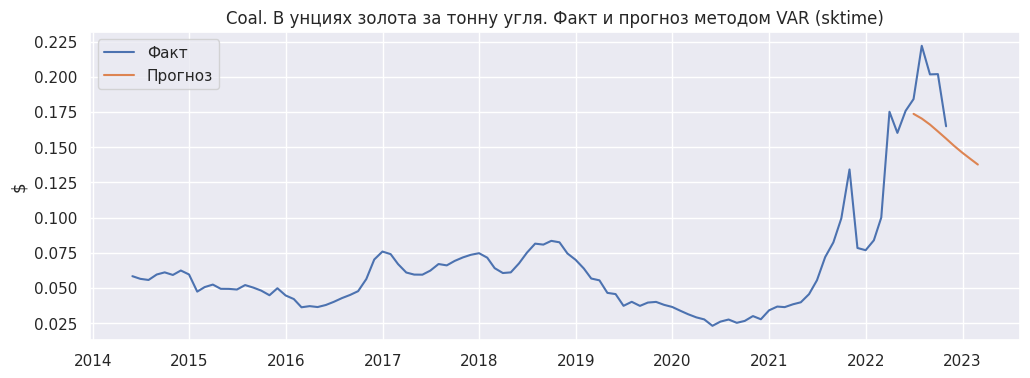

In [192]:
# График стоимости угля в унциях золота
plt.figure(figsize=(12, 4))
plt.grid(True)
# plt.plot(y_gold_test['Coal'], label='Факт')
plt.plot(df_gold_month['Coal'], label='Факт')
plt.plot(y_gold_pred['Coal'], label='Прогноз')
plt.title('Coal. В унциях золота за тонну угля. Факт и прогноз методом VAR (sktime)')
plt.ylabel('$')
plt.legend()
plt.show()

In [177]:
# Прогноз VAR по всему df в баррелях нефти

# удаляю столбцы с постоянными значениями

df1_brent = df_brent.drop('Brent', axis=1)

# делаю прореживание данных на среднемесячные значения
# так же делая для измерения в золоте и нефти

df_brent_month = df1_brent.resample('M').mean()
df_brent_day = df1_brent.resample('D').mean()

df_brent_month

Coal      Gaz      CIF   Cupper  Aluminum     Corn      Gold  \
Date                                                                          
2014-05-31  0.68583  0.04122  5.97106  0.02873  19.48843  4.45037  11.75212   
2014-06-30  0.64722  0.04086  5.87480  0.02756  19.80876  3.96868  11.46300   
2014-07-31  0.67744  0.03717  5.89637  0.02994  21.55977  3.54254  12.16900   
2014-08-31  0.74818  0.03790  5.90287  0.03056  23.14056  3.48884  12.56307   
2014-09-30  0.76777  0.03999  5.99317  0.03149  24.24505  3.40729  12.57128   
...             ...      ...      ...      ...       ...      ...       ...   
2022-06-30  2.87602  0.06441  6.61370  0.03504  21.78944  6.45128  15.60588   
2022-07-31  3.67142  0.06862  6.50910  0.03245  22.94391  6.34383  16.53495   
2022-08-31  3.63458  0.08987  6.85247  0.03701  24.67801  6.46763  18.04975   
2022-09-30  3.75353  0.08576  7.00890  0.03854  24.58549  7.55082  18.59394   
2022-10-31  2.96691  0.06746  6.90070  0.03720  24.52718  7.37701  17.98184   

             Silver  Platinum  
Date                           
2014-05-31  0.17626  13.35791  
2014-06-30  0.17839  13.02748  
2014-07-31  0.19397  13.85626  
2014-08-31  0.19035  14.03430  
2014-09-30  0.18615  13.82978  
...             ...       ...  
2022-06-30  0.18276   8.09732  
2022-07-31  0.18088   8.23807  
2022-08-31  0.20070   9.20980  
2022-09-30  0.20815   9.68983  
2022-10-31  0.20850   9.87838  

[102 rows x 9 columns]

In [188]:
# Специально обрезал данные для обучения
# для обучения 
y_brent = df_brent_month[:'2022-08-31']

# для теста
y_brent_test = df_brent_month['2022-06-30':]

# # Прогноз на период
fh=[1, 2, 3, 4, 5, 6, 7, 8, 9] 

# # обявление способа прогнозирования
forecaster_brent = VAR()

# # подгонка модели
forecaster_brent.fit(y_brent, fh=fh)

# # результат прогноза
y_brent_pred = forecaster_brent.predict()

y_brent_pred

/home/sm360/.local/lib/python3.10/site-packages/sktime/datatypes/_series/_check.py:91: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/sm360/.local/lib/python3.10/site-packages/sktime/datatypes/_series/_check.py:91: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


Coal      Gaz      CIF   Cupper  Aluminum     Corn      Gold  \
2022-09-30  3.64775  0.09110  6.81734  0.03711  24.25115  5.98548  16.79242   
2022-10-31  3.64930  0.09160  6.77039  0.03684  24.06110  5.58425  15.33287   
2022-11-30  3.63993  0.09166  6.71460  0.03629  23.99226  5.25032  13.73177   
2022-12-31  3.62239  0.09141  6.65239  0.03549  23.98681  4.97133  12.05299   
2023-01-31  3.59906  0.09092  6.58578  0.03452  24.00774  4.73599  10.35418   
2023-02-28  3.57163  0.09023  6.51659  0.03340  24.03009  4.53452   8.68490   
2023-03-31  3.54116  0.08940  6.44654  0.03218  24.03841  4.35891   7.08633   
2023-04-30  3.50828  0.08847  6.37725  0.03089  24.02519  4.20297   5.59145   
2023-05-31  3.47327  0.08749  6.31021  0.02957  23.98920  4.06217   4.22536   

             Silver  Platinum  
2022-09-30  0.19280   9.26031  
2022-10-31  0.18414   9.30123  
2022-11-30  0.17398   9.28772  
2022-12-31  0.16223   9.21931  
2023-01-31  0.14907   9.10666  
2023-02-28  0.13485   8.96311  
2023-03-31  0.12001   8.80240  
2023-04-30  0.10498   8.63784  
2023-05-31  0.09020   8.48171

In [191]:
# График стоимости угля в баррелях нефти
plt.figure(figsize=(12, 4))
plt.grid(True)

plt.plot(df_brent_month['Coal'], label='Факт')
plt.plot(y_brent_pred['Coal'], label='Прогноз')
plt.title('Coal. В баррелях нефти за тонну угля. Факт и прогноз методом VAR (sktime)')
plt.ylabel('$')
plt.legend()
plt.show()

In [145]:
# Делаю прогоноз по шкалированным данным в разных ед измерения стоимости одной тонны угля
from sklearn.preprocessing import MinMaxScaler


In [146]:
# dataframe со стоимостью угля при разных ед изм.
df4 = pd.concat([df['Coal'], df_gold['Coal'], df_brent['Coal']], axis=1)

df4.columns = ['in_doll', 'in_gold', 'in_brent']

df4

in_doll  in_gold  in_brent
Date                                    
2014-05-06   75.15000  0.05744   0.70194
2014-05-07   74.85000  0.05809   0.69222
2014-05-08   75.15000  0.05837   0.69558
2014-05-09   75.15000  0.05838   0.69654
2014-05-12   75.10000  0.05797   0.69274
...               ...      ...       ...
2022-10-17  269.50000  0.16264   2.94150
2022-10-18  266.64999  0.16170   2.96179
2022-10-19  267.00000  0.16406   2.88930
2022-10-20  270.00000  0.16556   2.92271
2022-10-21  269.75000  0.16339   2.88503

[1841 rows x 3 columns]

In [147]:
# Шкалирование в диап. 0 - 1
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))



MinMaxScaler()

In [148]:
# series с шкалир значениями
df4_scaled = scaler.fit(df4).transform(df4)

df4_scaled

array([[0.0914776 , 0.16960555, 0.02043235],
       [0.09072716, 0.17271146, 0.01763371],
       [0.0914776 , 0.17409356, 0.01859919],
       ...,
       [0.57137853, 0.68271975, 0.65019478],
       [0.57888285, 0.68997559, 0.65981475],
       [0.57825749, 0.67949771, 0.64896516]])

In [149]:
# Series с востановленными значениями
series_inv = scaler.inverse_transform(df4_scaled)

series_inv

array([[7.51500015e+01, 5.74409529e-02, 7.01942866e-01],
       [7.48499985e+01, 5.80862951e-02, 6.92222328e-01],
       [7.51500015e+01, 5.83734660e-02, 6.95575721e-01],
       ...,
       [2.67000000e+02, 1.64055300e-01, 2.88929758e+00],
       [2.70000000e+02, 1.65562909e-01, 2.92271063e+00],
       [2.69750000e+02, 1.63385827e-01, 2.88502674e+00]])

In [150]:

# Проверка: df с востановленими значениями
df4_inv = pd.DataFrame(series_inv, index=df.index)

df4_inv.columns = ['in_doll', 'in_gold', 'in_brent']

df4_inv

in_doll  in_gold  in_brent
Date                                    
2014-05-06   75.15000  0.05744   0.70194
2014-05-07   74.85000  0.05809   0.69222
2014-05-08   75.15000  0.05837   0.69558
2014-05-09   75.15000  0.05838   0.69654
2014-05-12   75.10000  0.05797   0.69274
...               ...      ...       ...
2022-10-17  269.50000  0.16264   2.94150
2022-10-18  266.64999  0.16170   2.96179
2022-10-19  267.00000  0.16406   2.88930
2022-10-20  270.00000  0.16556   2.92271
2022-10-21  269.75000  0.16339   2.88503

[1841 rows x 3 columns]

In [151]:
# шкалированныe данные стоимости угля в разных ед.измерения

y = df4_scaled

y

array([[0.0914776 , 0.16960555, 0.02043235],
       [0.09072716, 0.17271146, 0.01763371],
       [0.0914776 , 0.17409356, 0.01859919],
       ...,
       [0.57137853, 0.68271975, 0.65019478],
       [0.57888285, 0.68997559, 0.65981475],
       [0.57825749, 0.67949771, 0.64896516]])

In [152]:
# Прогнозирование
forecaster = VAR()
# forecaster = VARMAX()

fh = np.arange(1, 20)
forecaster.fit(y, fh=fh)

y_pred = forecaster.predict()

# прогноз в шкалированных значениях
y_pred

/home/sm360/.local/lib/python3.10/site-packages/sktime/datatypes/_series/_check.py:91: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:
/home/sm360/.local/lib/python3.10/site-packages/sktime/datatypes/_series/_check.py:91: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not index.is_monotonic:


array([[0.57587656, 0.67725594, 0.64634367],
       [0.57350486, 0.67502199, 0.64373955],
       [0.57114232, 0.67279577, 0.64115254],
       [0.56878889, 0.67057724, 0.63858242],
       [0.5664445 , 0.66836633, 0.63602894],
       [0.5641091 , 0.66616297, 0.63349188],
       [0.56178263, 0.66396711, 0.63097102],
       [0.55946502, 0.66177869, 0.62846613],
       [0.55715624, 0.65959766, 0.625977  ],
       [0.55485622, 0.65742395, 0.62350343],
       [0.55256491, 0.65525752, 0.62104521],
       [0.55028227, 0.65309832, 0.61860214],
       [0.54800824, 0.65094629, 0.61617402],
       [0.54574278, 0.64880139, 0.61376066],
       [0.54348584, 0.64666356, 0.61136187],
       [0.54123737, 0.64453277, 0.60897748],
       [0.53899733, 0.64240897, 0.6066073 ],
       [0.53676567, 0.64029212, 0.60425115],
       [0.53454236, 0.63818216, 0.60190887]])

In [153]:
# len(y_pred)
# type(y_pred)

In [154]:
# создаю индексацию по датам прогноза

# rng = pd.date_range('2022-11-30', periods=5, freq='D')

rng = pd.date_range('2022-10-20', periods=len(y_pred), freq='D')

rng

DatetimeIndex(['2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-05', '2022-11-06', '2022-11-07'],
              dtype='datetime64[ns]', freq='D')

In [155]:
# ts = pd.Series(y_pred)

# ts

In [156]:
# Series с востановленными значениями прогноза
series_pred_inv = scaler.inverse_transform(y_pred)

series_pred_inv

array([[2.68798176e+02, 1.62920035e-01, 2.87592153e+00],
       [2.67850042e+02, 1.62455865e-01, 2.86687663e+00],
       [2.66905571e+02, 1.61993305e-01, 2.85789118e+00],
       [2.65964739e+02, 1.61532341e-01, 2.84896437e+00],
       [2.65027523e+02, 1.61072960e-01, 2.84009537e+00],
       [2.64093899e+02, 1.60615148e-01, 2.83128339e+00],
       [2.63163844e+02, 1.60158895e-01, 2.82252767e+00],
       [2.62237336e+02, 1.59704187e-01, 2.81382744e+00],
       [2.61314354e+02, 1.59251014e-01, 2.80518196e+00],
       [2.60394875e+02, 1.58799364e-01, 2.79659050e+00],
       [2.59478880e+02, 1.58349225e-01, 2.78805235e+00],
       [2.58566348e+02, 1.57900588e-01, 2.77956682e+00],
       [2.57657260e+02, 1.57453442e-01, 2.77113322e+00],
       [2.56751596e+02, 1.57007776e-01, 2.76275090e+00],
       [2.55849337e+02, 1.56563581e-01, 2.75441920e+00],
       [2.54950466e+02, 1.56120848e-01, 2.74613748e+00],
       [2.54054965e+02, 1.55679566e-01, 2.73790512e+00],
       [2.53162816e+02, 1.55239

In [157]:
# df прогнозными значениями 
df4_pred_inv = pd.DataFrame(series_pred_inv, index=rng)

df4_pred_inv.columns = ['in_doll', 'in_gold', 'in_brent']

df4_pred_inv

in_doll  in_gold  in_brent
2022-10-20  268.79818  0.16292   2.87592
2022-10-21  267.85004  0.16246   2.86688
2022-10-22  266.90557  0.16199   2.85789
2022-10-23  265.96474  0.16153   2.84896
2022-10-24  265.02752  0.16107   2.84010
2022-10-25  264.09390  0.16062   2.83128
2022-10-26  263.16384  0.16016   2.82253
2022-10-27  262.23734  0.15970   2.81383
2022-10-28  261.31435  0.15925   2.80518
2022-10-29  260.39488  0.15880   2.79659
2022-10-30  259.47888  0.15835   2.78805
2022-10-31  258.56635  0.15790   2.77957
2022-11-01  257.65726  0.15745   2.77113
2022-11-02  256.75160  0.15701   2.76275
2022-11-03  255.84934  0.15656   2.75442
2022-11-04  254.95047  0.15612   2.74614
2022-11-05  254.05496  0.15568   2.73791
2022-11-06  253.16282  0.15524   2.72972
2022-11-07  252.27400  0.15480   2.72159

In [158]:
# Заметка:


2022-10-20    268.79818
2022-10-21    267.85004
2022-10-22    266.90557
2022-10-23    265.96474
2022-10-24    265.02752
2022-10-25    264.09390
2022-10-26    263.16384
2022-10-27    262.23734
2022-10-28    261.31435
2022-10-29    260.39488
Freq: D, Name: in_doll, dtype: float64


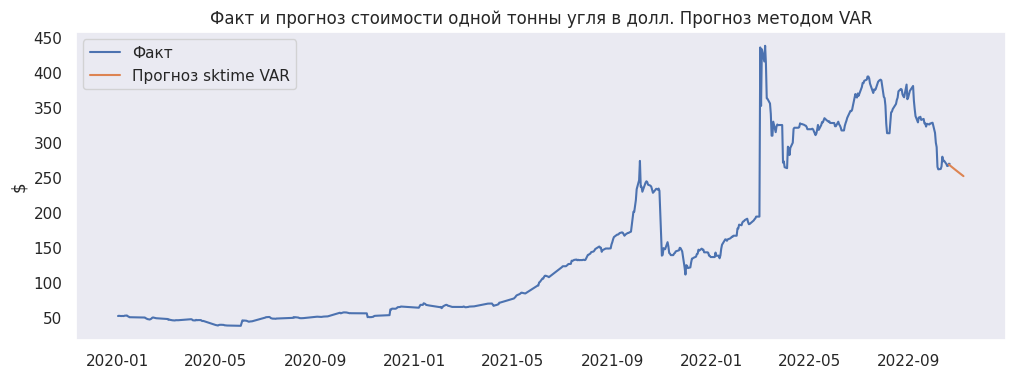

In [159]:
# График факт и прогноза в долл.

print(df4_pred_inv['in_doll'][:10])

plt.figure(figsize=(12, 4))
plt.grid()
plt.plot(df4['in_doll']['2020-01-01':], label='Факт')
plt.plot(df4_pred_inv['in_doll'], label='Прогноз sktime VAR')
plt.title('Факт и прогноз стоимости одной тонны угля в долл. Прогноз методом VAR')
plt.ylabel('$')
plt.legend()
plt.show()

In [160]:
# График факт и прогноза в унциях золота
print(df4_pred_inv['in_gold'][:10])

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(df4['in_gold']['2020-01-01':], label='Факт')
plt.plot(df4_pred_inv['in_gold'], label='Прогноз sktime VAR')
plt.title('Факт и прогноз стоимости одной тонны угля в унциях золота. Прогноз методом VAR')
plt.ylabel('унций золота')
plt.legend()
plt.show()

2022-10-20    0.16292
2022-10-21    0.16246
2022-10-22    0.16199
2022-10-23    0.16153
2022-10-24    0.16107
2022-10-25    0.16062
2022-10-26    0.16016
2022-10-27    0.15970
2022-10-28    0.15925
2022-10-29    0.15880
Freq: D, Name: in_gold, dtype: float64


In [161]:
# График факт и прогноза тоннах нефти

print(df4_pred_inv['in_brent'][:10])

plt.figure(figsize=(12, 4))
plt.grid(1)
plt.plot(df4['in_brent']['2020-01-01':], label='Факт')
plt.plot(df4_pred_inv['in_brent'], label='Прогноз sktime VAR')
plt.title('Факт и прогноз стоимости одной тонны угля в тоннах нефти. Прогноз методом VAR')
plt.ylabel('тонн нефти')
plt.legend()
plt.show()

2022-10-20    2.87592
2022-10-21    2.86688
2022-10-22    2.85789
2022-10-23    2.84896
2022-10-24    2.84010
2022-10-25    2.83128
2022-10-26    2.82253
2022-10-27    2.81383
2022-10-28    2.80518
2022-10-29    2.79659
Freq: D, Name: in_brent, dtype: float64


In [162]:
# полный список многомерных прогнозов

# for forecaster in all_estimators(filter_tags={"scitype:y": ["multivariate", "both"]}):
#     print(forecaster[0])

# Вот так все показывает:
# all_estimators()

In [177]:
# Ниже эксперемент по "ForecastingStocks_4.ipynb"

In [178]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 2014-05-31 to 2022-10-31
Freq: M
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Coal      102 non-null    float64
 1   Brent     102 non-null    float64
 2   Gaz       102 non-null    float64
 3   CIF       102 non-null    float64
 4   Cupper    102 non-null    float64
 5   Aluminum  102 non-null    float64
 6   Corn      102 non-null    float64
 7   Gold      102 non-null    float64
 8   Silver    102 non-null    float64
 9   Platinum  102 non-null    float64
dtypes: float64(10)
memory usage: 12.8 KB


In [179]:
df_month[:80]

Coal      Brent      Gaz        CIF   Cupper    Aluminum  \
Date                                                                       
2014-05-31  75.03611  109.41889  4.50928  653.30944  3.14394  2132.18056   
2014-06-30  72.62333  112.26222  4.58456  659.40000  3.09353  2222.88889   
2014-07-31  72.98722  107.75722  4.00583  635.34612  3.22617  2322.70833   
2014-08-31  77.15263  103.13053  3.90816  608.75631  3.15092  2386.17105   
2014-09-30  75.33150   98.14950  3.92230  588.15700  3.08983  2379.60000   
...              ...        ...      ...        ...      ...         ...   
2020-08-31  50.08818   44.76364  2.20373  348.15637  2.87095  1746.13636   
2020-09-30  51.66667   41.06111  2.37911  342.87333  3.02950  1772.55556   
2020-10-31  57.13636   42.09091  2.65645  352.54727  3.01477  1822.52273   
2020-11-30  52.55364   41.70182  2.97145  358.21545  3.13495  1907.70455   
2020-12-31  62.76727   49.23455  2.59064  389.24455  3.50918  2034.00000   

                 Corn        Gold    Silver    Platinum  
Date                                                     
2014-05-31  486.79167  1285.75556  19.28494  1461.60555  
2014-06-30  445.29167  1286.80555  20.03300  1461.93889  
2014-07-31  381.80556  1311.15000  20.89944  1492.92222  
2014-08-31  359.73684  1295.52106  19.63042  1447.34209  
2014-09-30  334.37500  1233.70000  18.27305  1357.44500  
...               ...         ...       ...         ...  
2020-08-31  315.72727  1984.59090  26.89473   967.85454  
2020-09-30  356.69444  1943.42221  26.99578   933.66666  
2020-10-31  388.93182  1902.67272  24.28718   872.87274  
2020-11-30  409.31818  1893.09091  24.47355   882.35454  
2020-12-31  420.02273  1839.46365  24.21200  1029.01817  

[80 rows x 10 columns]

In [180]:
# разбиваем данные для обучения и тестирования

horizon = 10

train_df = df_month[:80]
test_df = df_month[80:]
X = train_df[:(80 - horizon)].values
Y = train_df[horizon:].values

In [181]:
len(Y)

70

In [182]:
X.shape

(70, 10)

In [183]:
# Нужно добавить третье измерение, ось 1
X = np.expand_dims(X, axis = 1)

X.shape

(70, 1, 10)

In [184]:
# стр 473
# Обратимся к модели которая может наблюдать 10 (или gorizon) временных шагов на 10 дней в прошлое.
# Таким образом нужно обрезать ось 0 так что бы сделать ее длину равной 10.
# Отрежем в доль оси 0 каждые 10 строк и переформатируем результирующий список подматриц так что бы количество выборок
#  (т.е. длина результирущего списка) стала имерением второй оси 
# Таким образом у нас есть временной ряд длиной 10 с тремя паралельными входами для данных в фомате TNC. 
# Для этих трех входов у нас есть 699 примеров. Размер патека будет определять длину эпохи, где эпоха - это один цикл в наших данных.



X = np.split(X, X.shape[0]/10, axis = 0)
X = np.concatenate(X, axis = 1)

X.shape

(10, 7, 10)

In [185]:
train_df[:(80 - horizon)].values[:31]

array([[7.50361112e+01, 1.09418889e+02, 4.50927777e+00, 6.53309445e+02,
        3.14394445e+00, 2.13218056e+03, 4.86791667e+02, 1.28575556e+03,
        1.92849444e+01, 1.46160555e+03],
       [7.26233338e+01, 1.12262222e+02, 4.58455557e+00, 6.59400001e+02,
        3.09352778e+00, 2.22288889e+03, 4.45291667e+02, 1.28680555e+03,
        2.00329999e+01, 1.46193889e+03],
       [7.29872220e+01, 1.07757222e+02, 4.00583332e+00, 6.35346117e+02,
        3.22616670e+00, 2.32270833e+03, 3.81805556e+02, 1.31115000e+03,
        2.08994441e+01, 1.49292222e+03],
       [7.71526317e+01, 1.03130526e+02, 3.90815790e+00, 6.08756312e+02,
        3.15092101e+00, 2.38617105e+03, 3.59736842e+02, 1.29552106e+03,
        1.96304212e+01, 1.44734209e+03],
       [7.53314995e+01, 9.81494995e+01, 3.92229996e+00, 5.88157001e+02,
        3.08982501e+00, 2.37960000e+03, 3.34375000e+02, 1.23370000e+03,
        1.82730499e+01, 1.35744500e+03],
       [7.24690475e+01, 8.74257144e+01, 3.78428569e+00, 5.46664283e+02,
   

In [186]:
Y_test = Y[::10]

In [187]:
Y_test[:3]

array([[6.15494999e+01, 5.66004997e+01, 2.75110002e+00, 4.01061002e+02,
        2.70950000e+00, 2.05292500e+03, 3.83200000e+02, 1.17496000e+03,
        1.61805499e+01, 1.13537000e+03],
       [4.62805555e+01, 3.19338886e+01, 2.22777776e+00, 2.87699999e+02,
        2.00605553e+00, 1.61562500e+03, 3.62416667e+02, 1.09889444e+03,
        1.40867777e+01, 8.53116672e+02],
       [8.66639999e+01, 4.71085009e+01, 2.88555002e+00, 3.59108003e+02,
        2.46437500e+00, 1.83616250e+03, 3.45212500e+02, 1.23596000e+03,
        1.73558998e+01, 9.55094995e+02]])

In [188]:
Y = Y_test

In [ ]:
X.shape

In [ ]:
Y.shape

#### Finish


[Ссылка на оглавление](######Start)